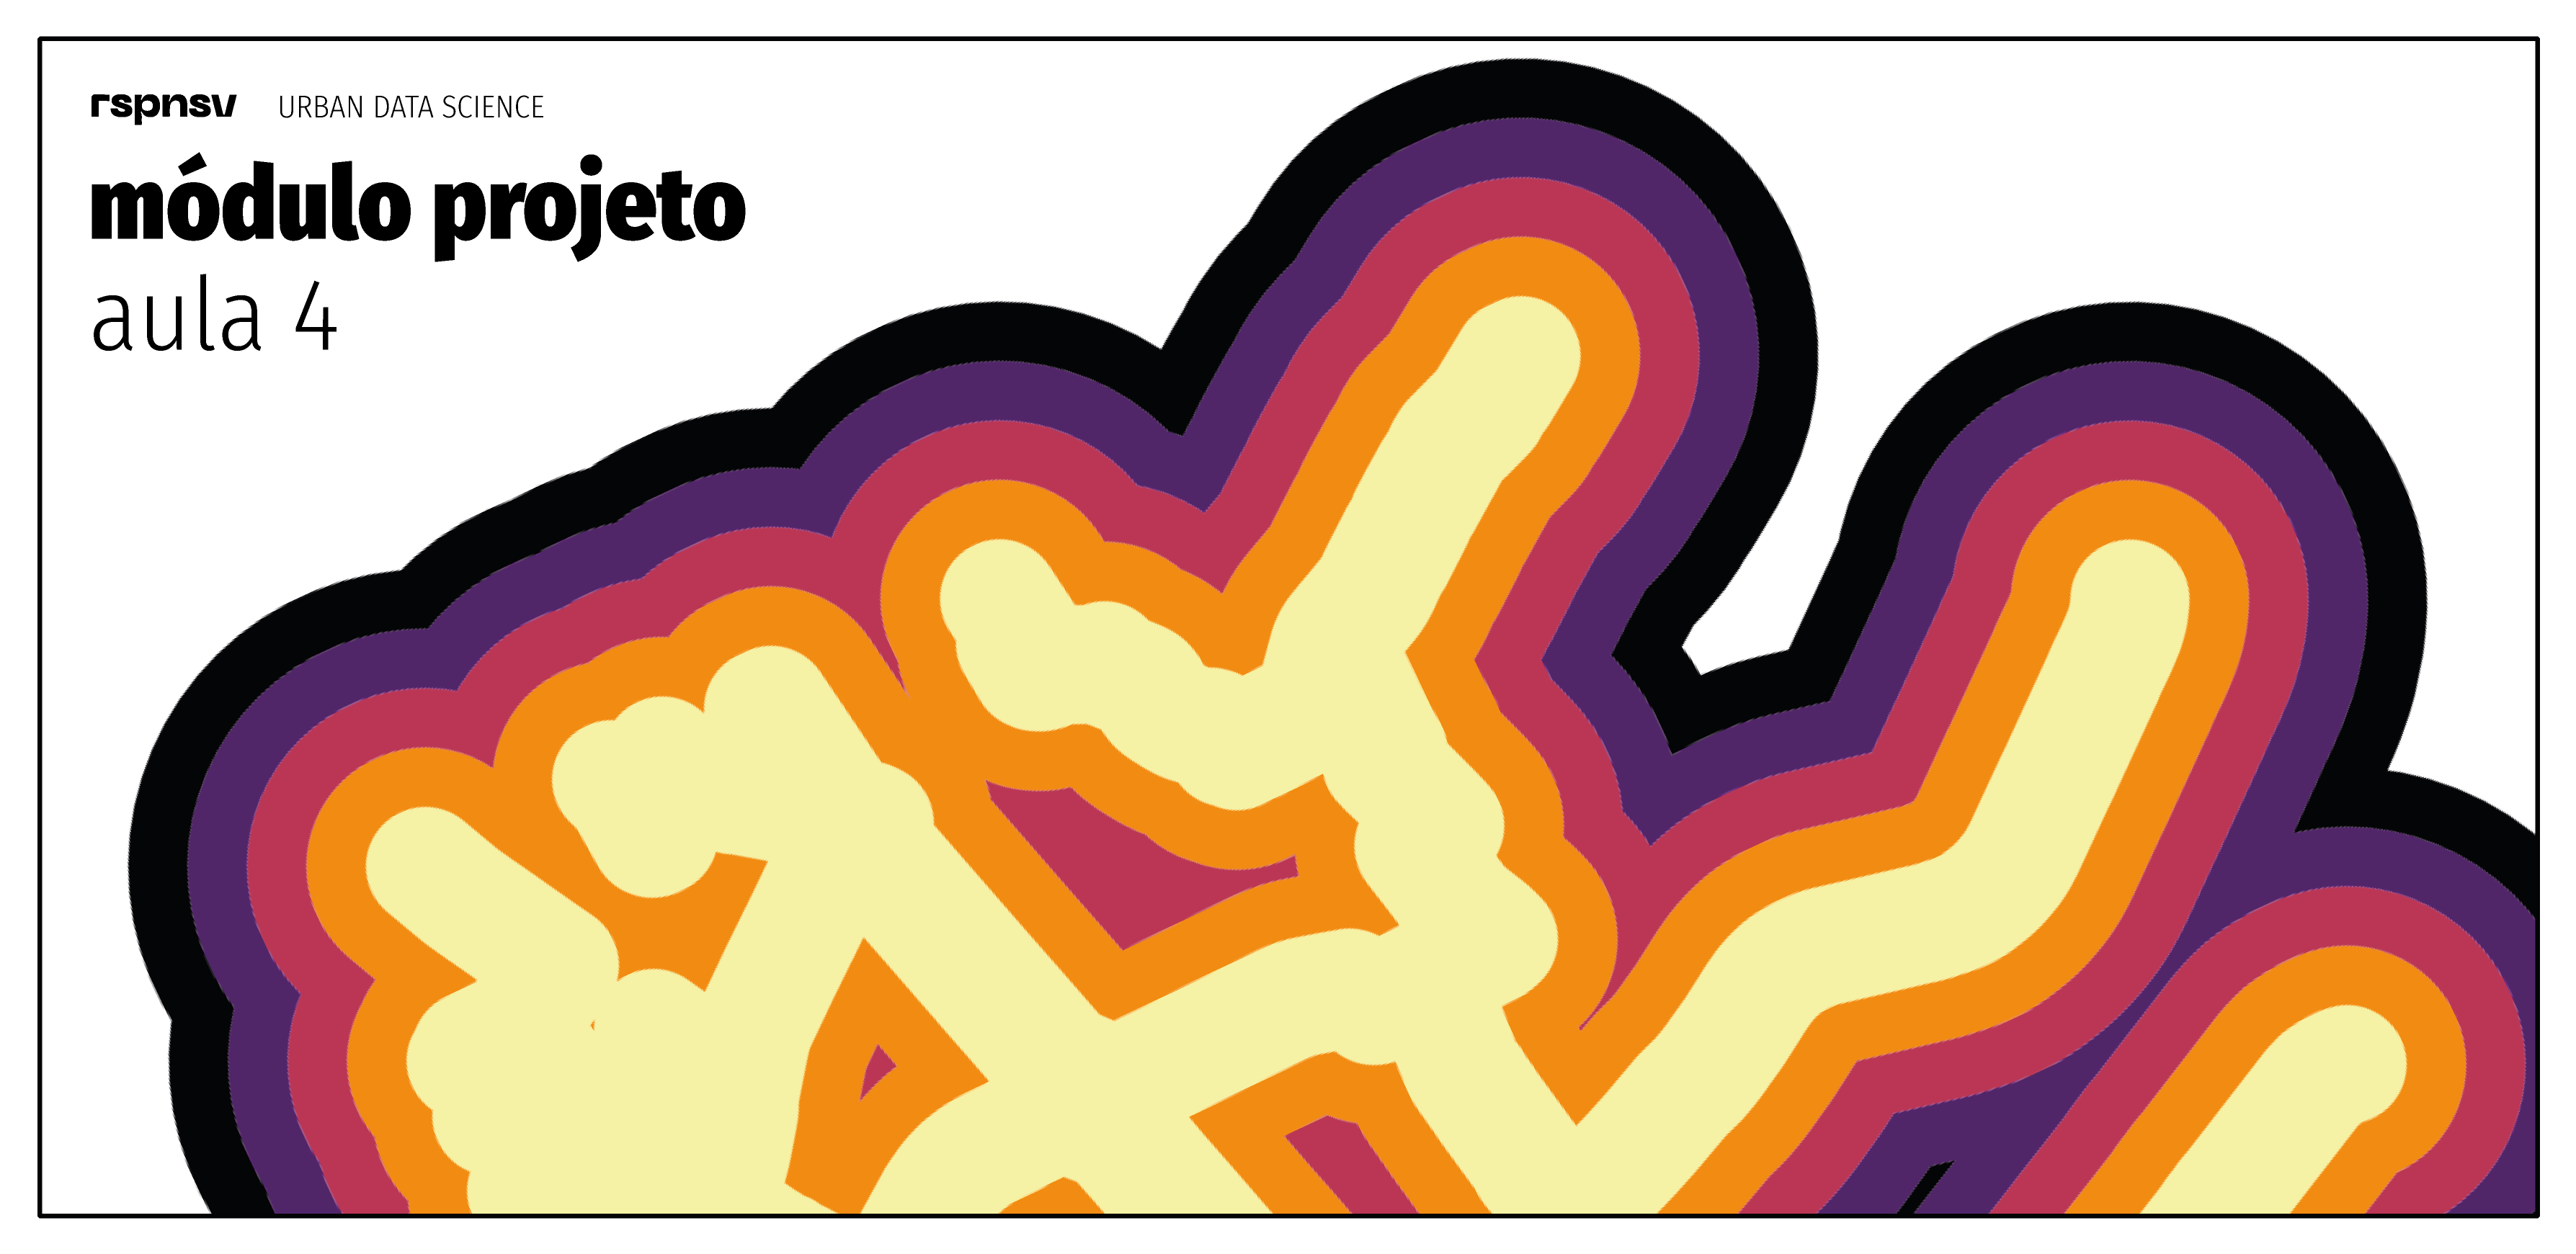

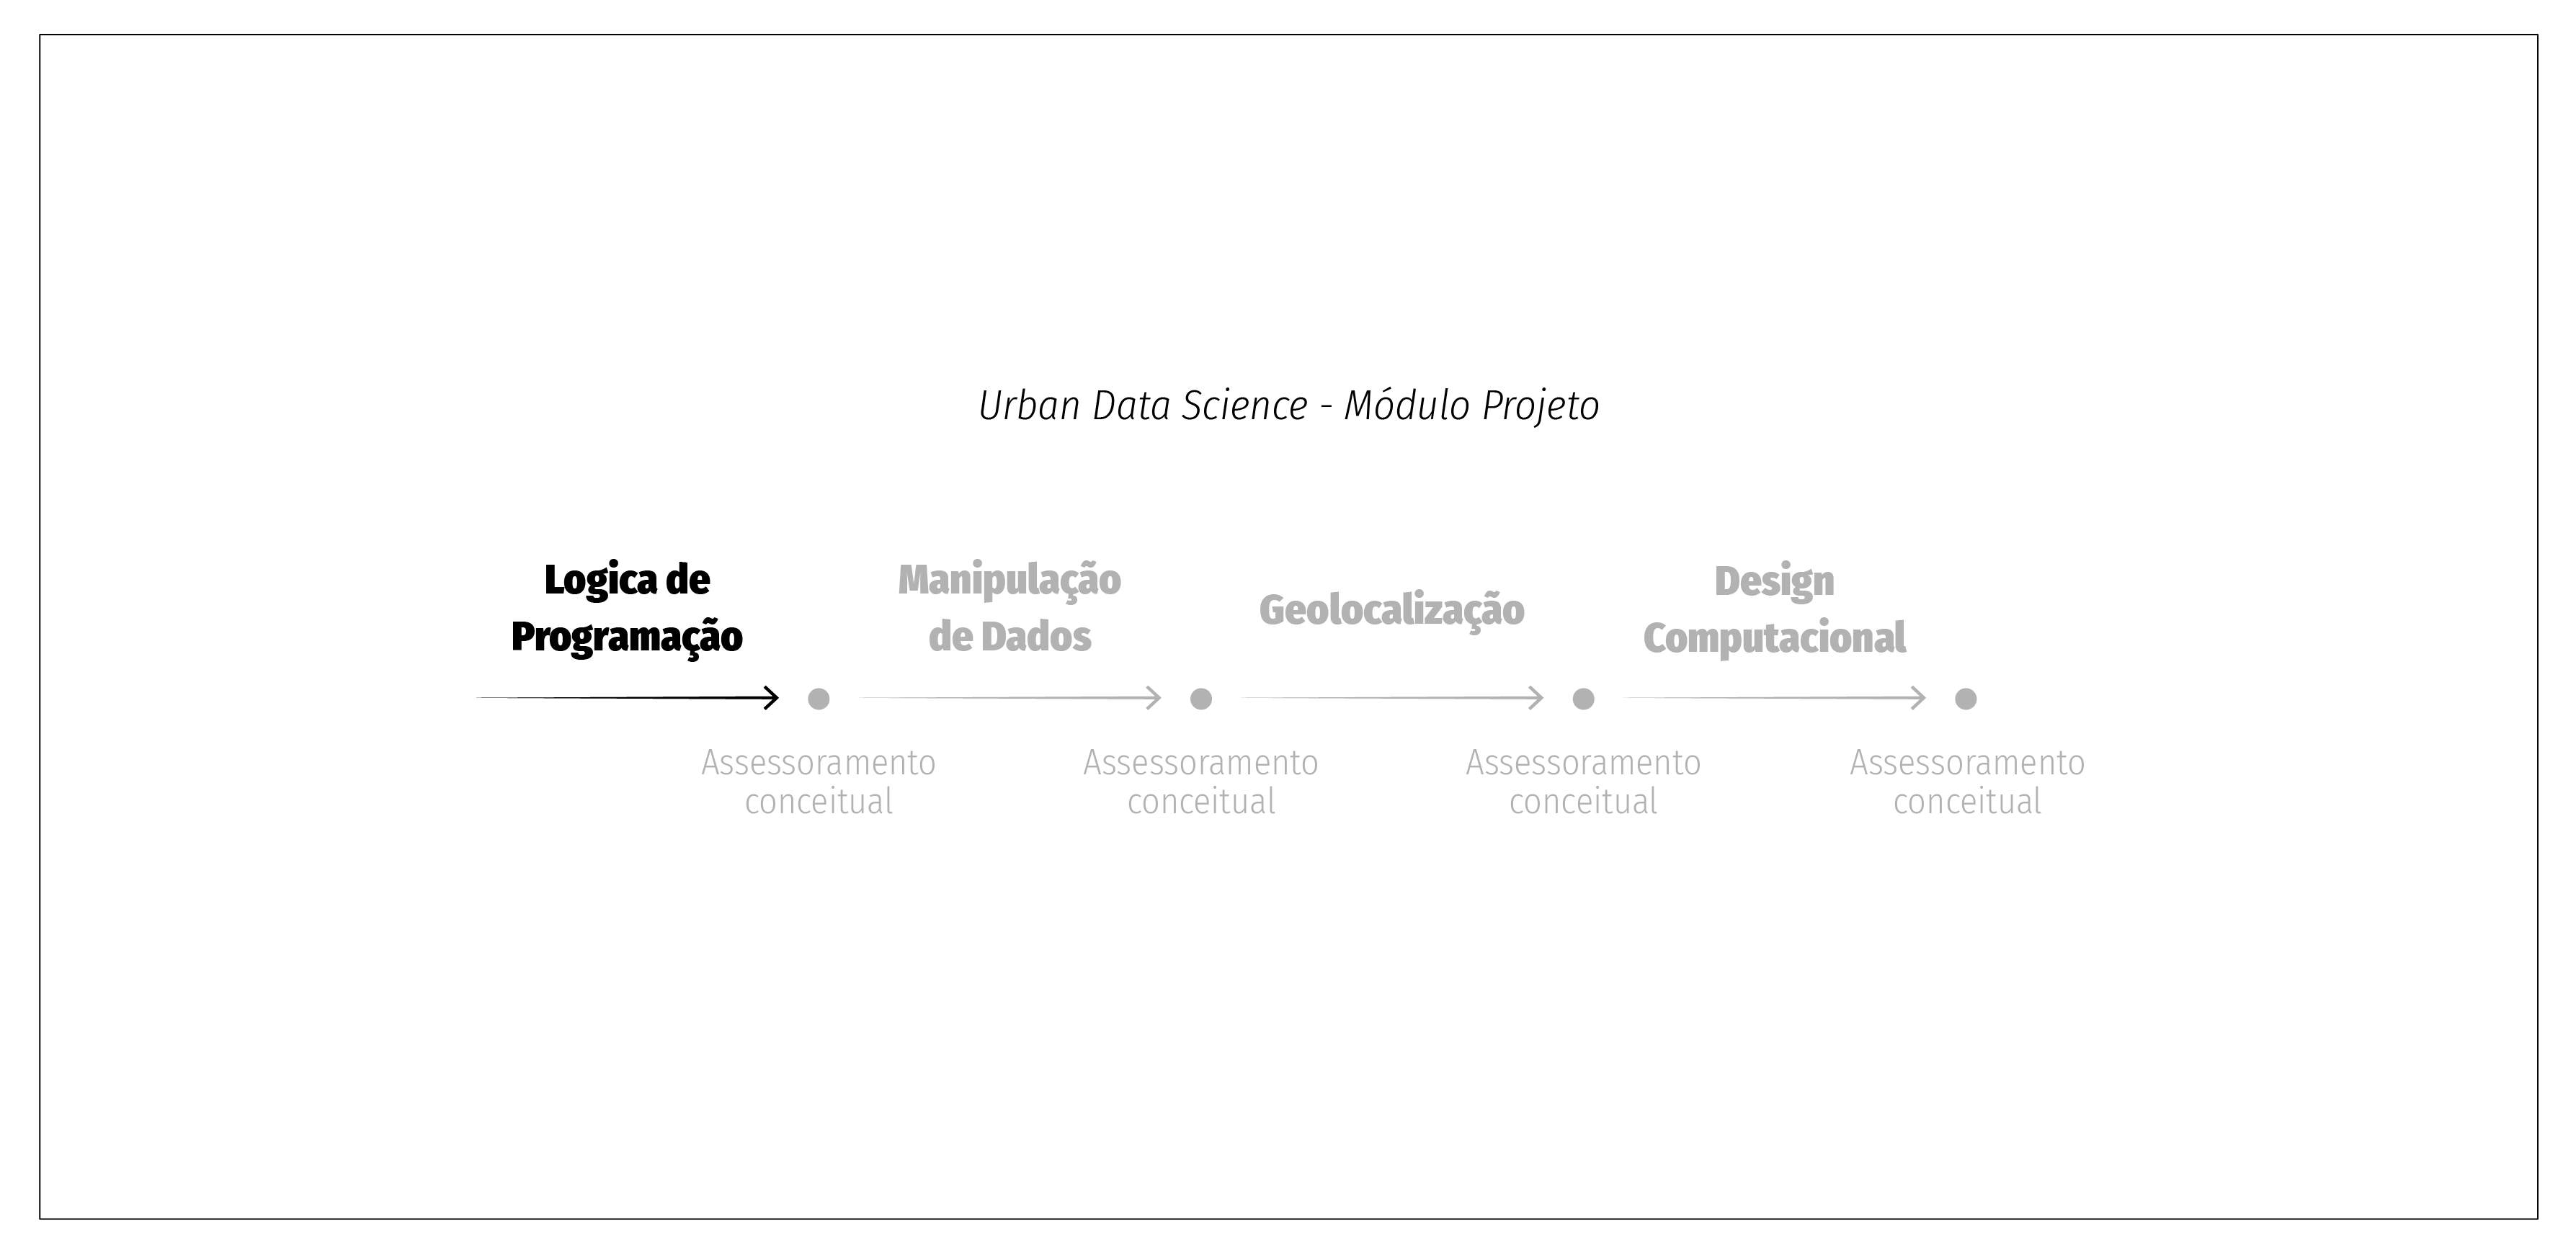

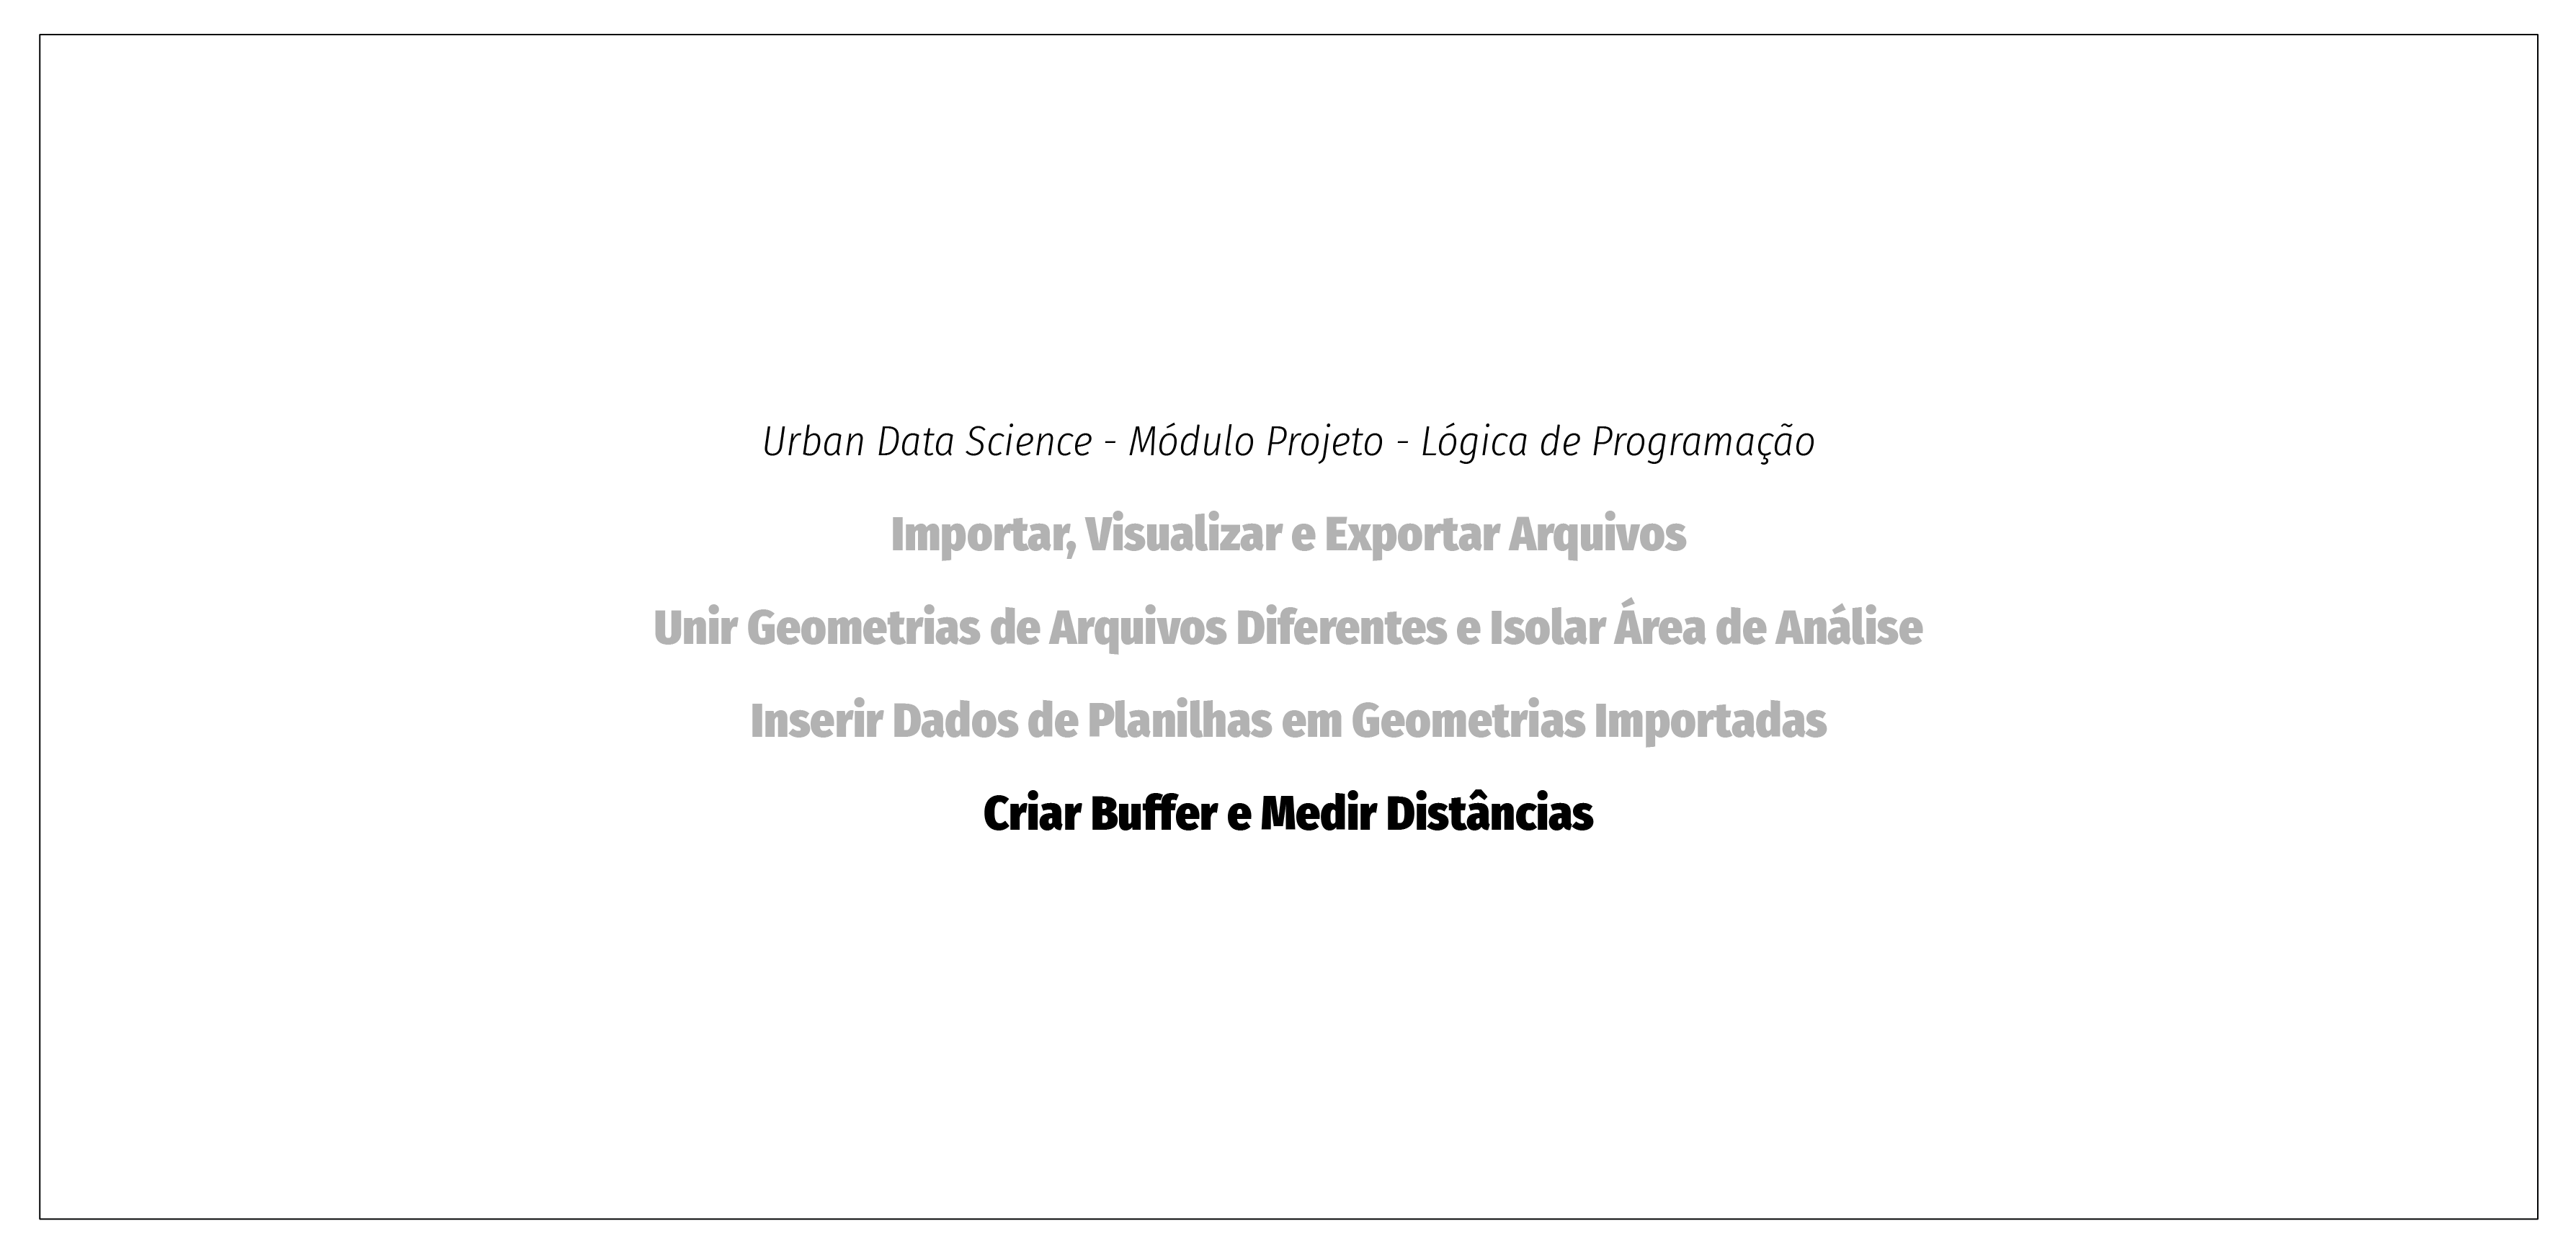

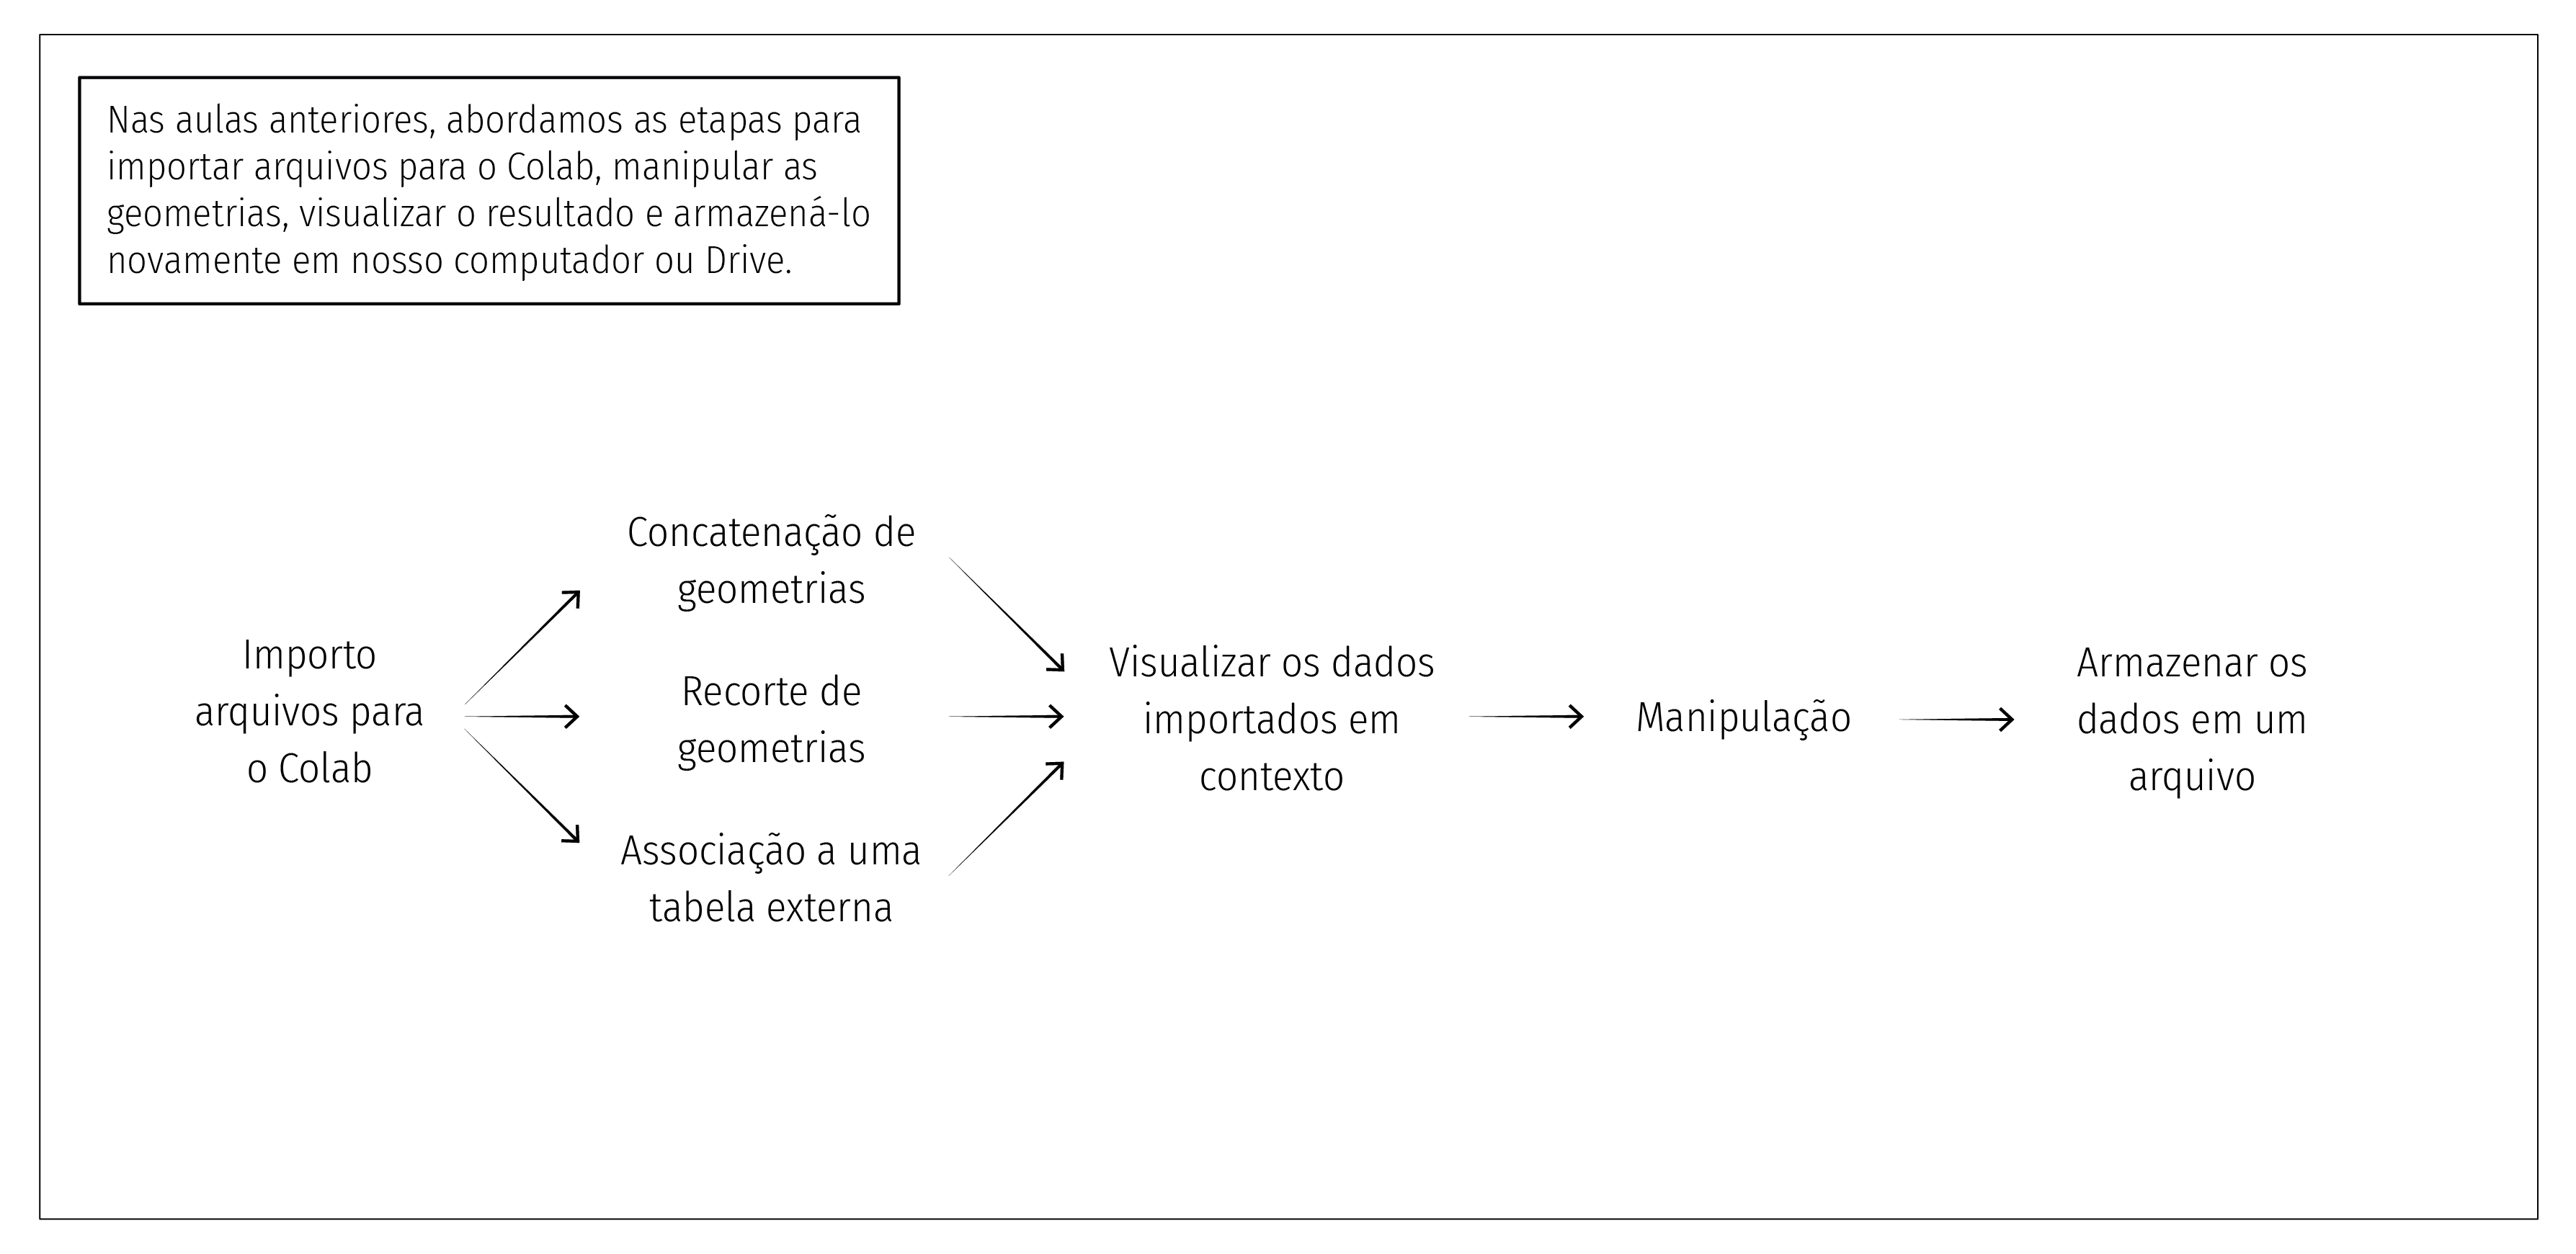

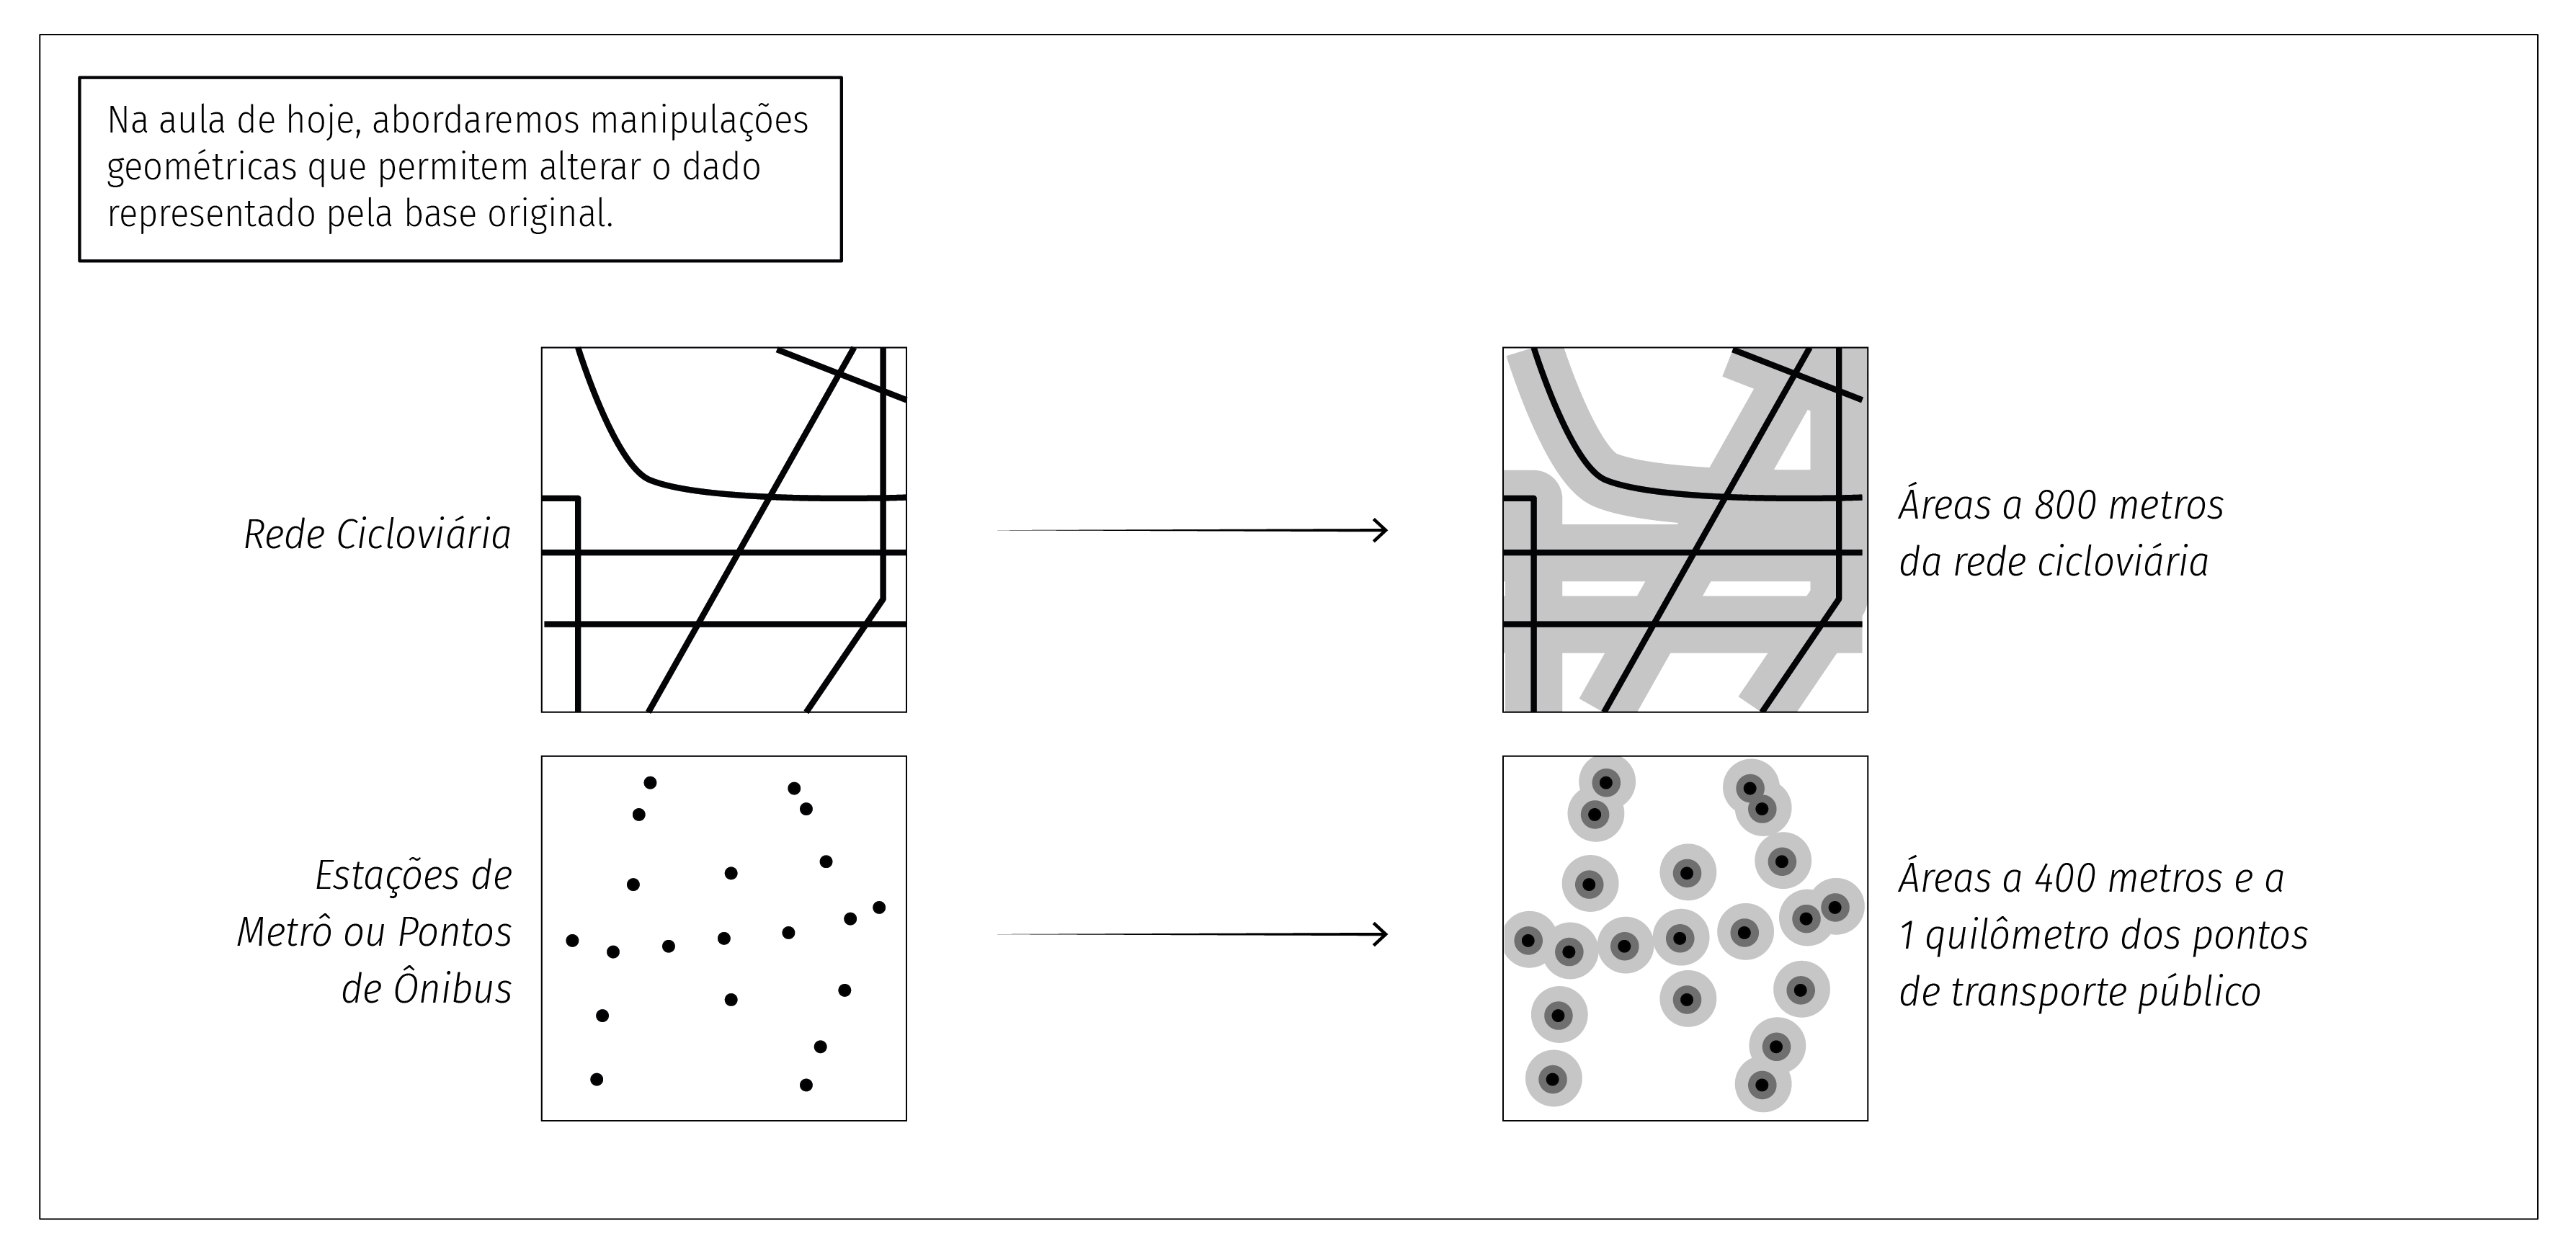

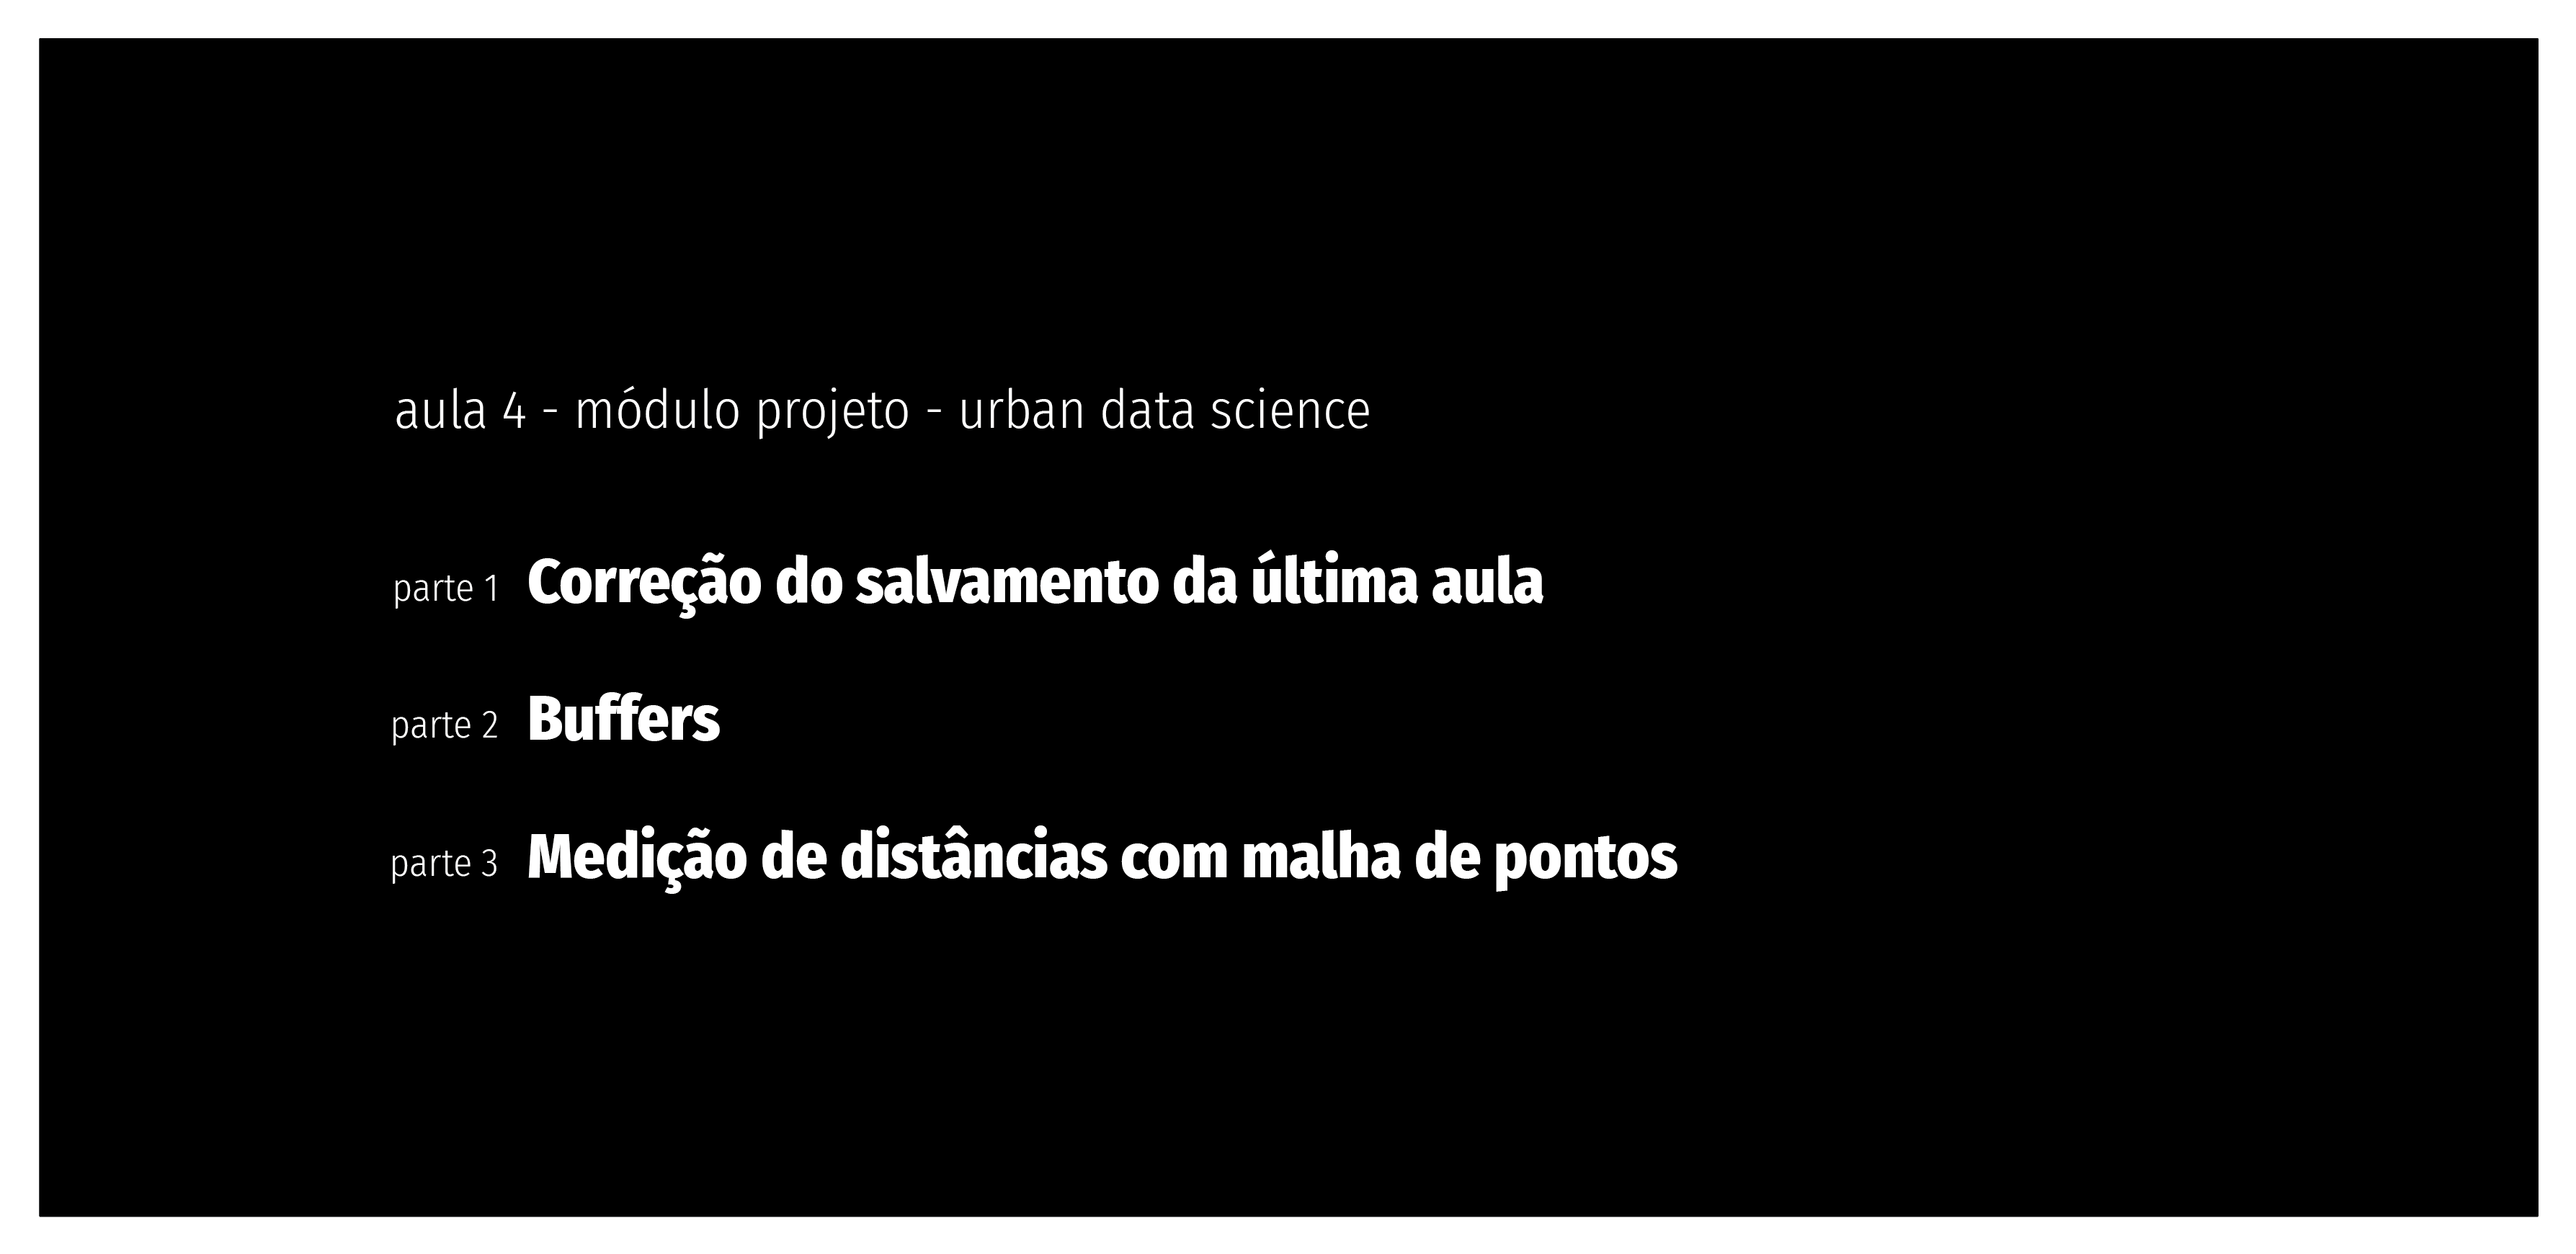

**AJUSTES INICIAIS**

Começamos instalando a biblioteca GeoPandas, que contém os comandos que utilizamos para converter arquivos em GeoDataFrames.

In [144]:
#instalação da biblioteca geopandas
!pip install geopandas --quiet

Em seguida, importamos algumas das bibliotecas que sempre temos utilizado:

In [28]:
#importação das bibliotecas
import geopandas as gpd
import pandas as pd
from google.colab import drive, files
import shapely
import os
import plotly.express as px

Por fim, conectamos o Google Drive ao Colab:

In [3]:
# método para conectarmos nosso google drive ao colab
drive.mount('/content/drive/')

Mounted at /content/drive/


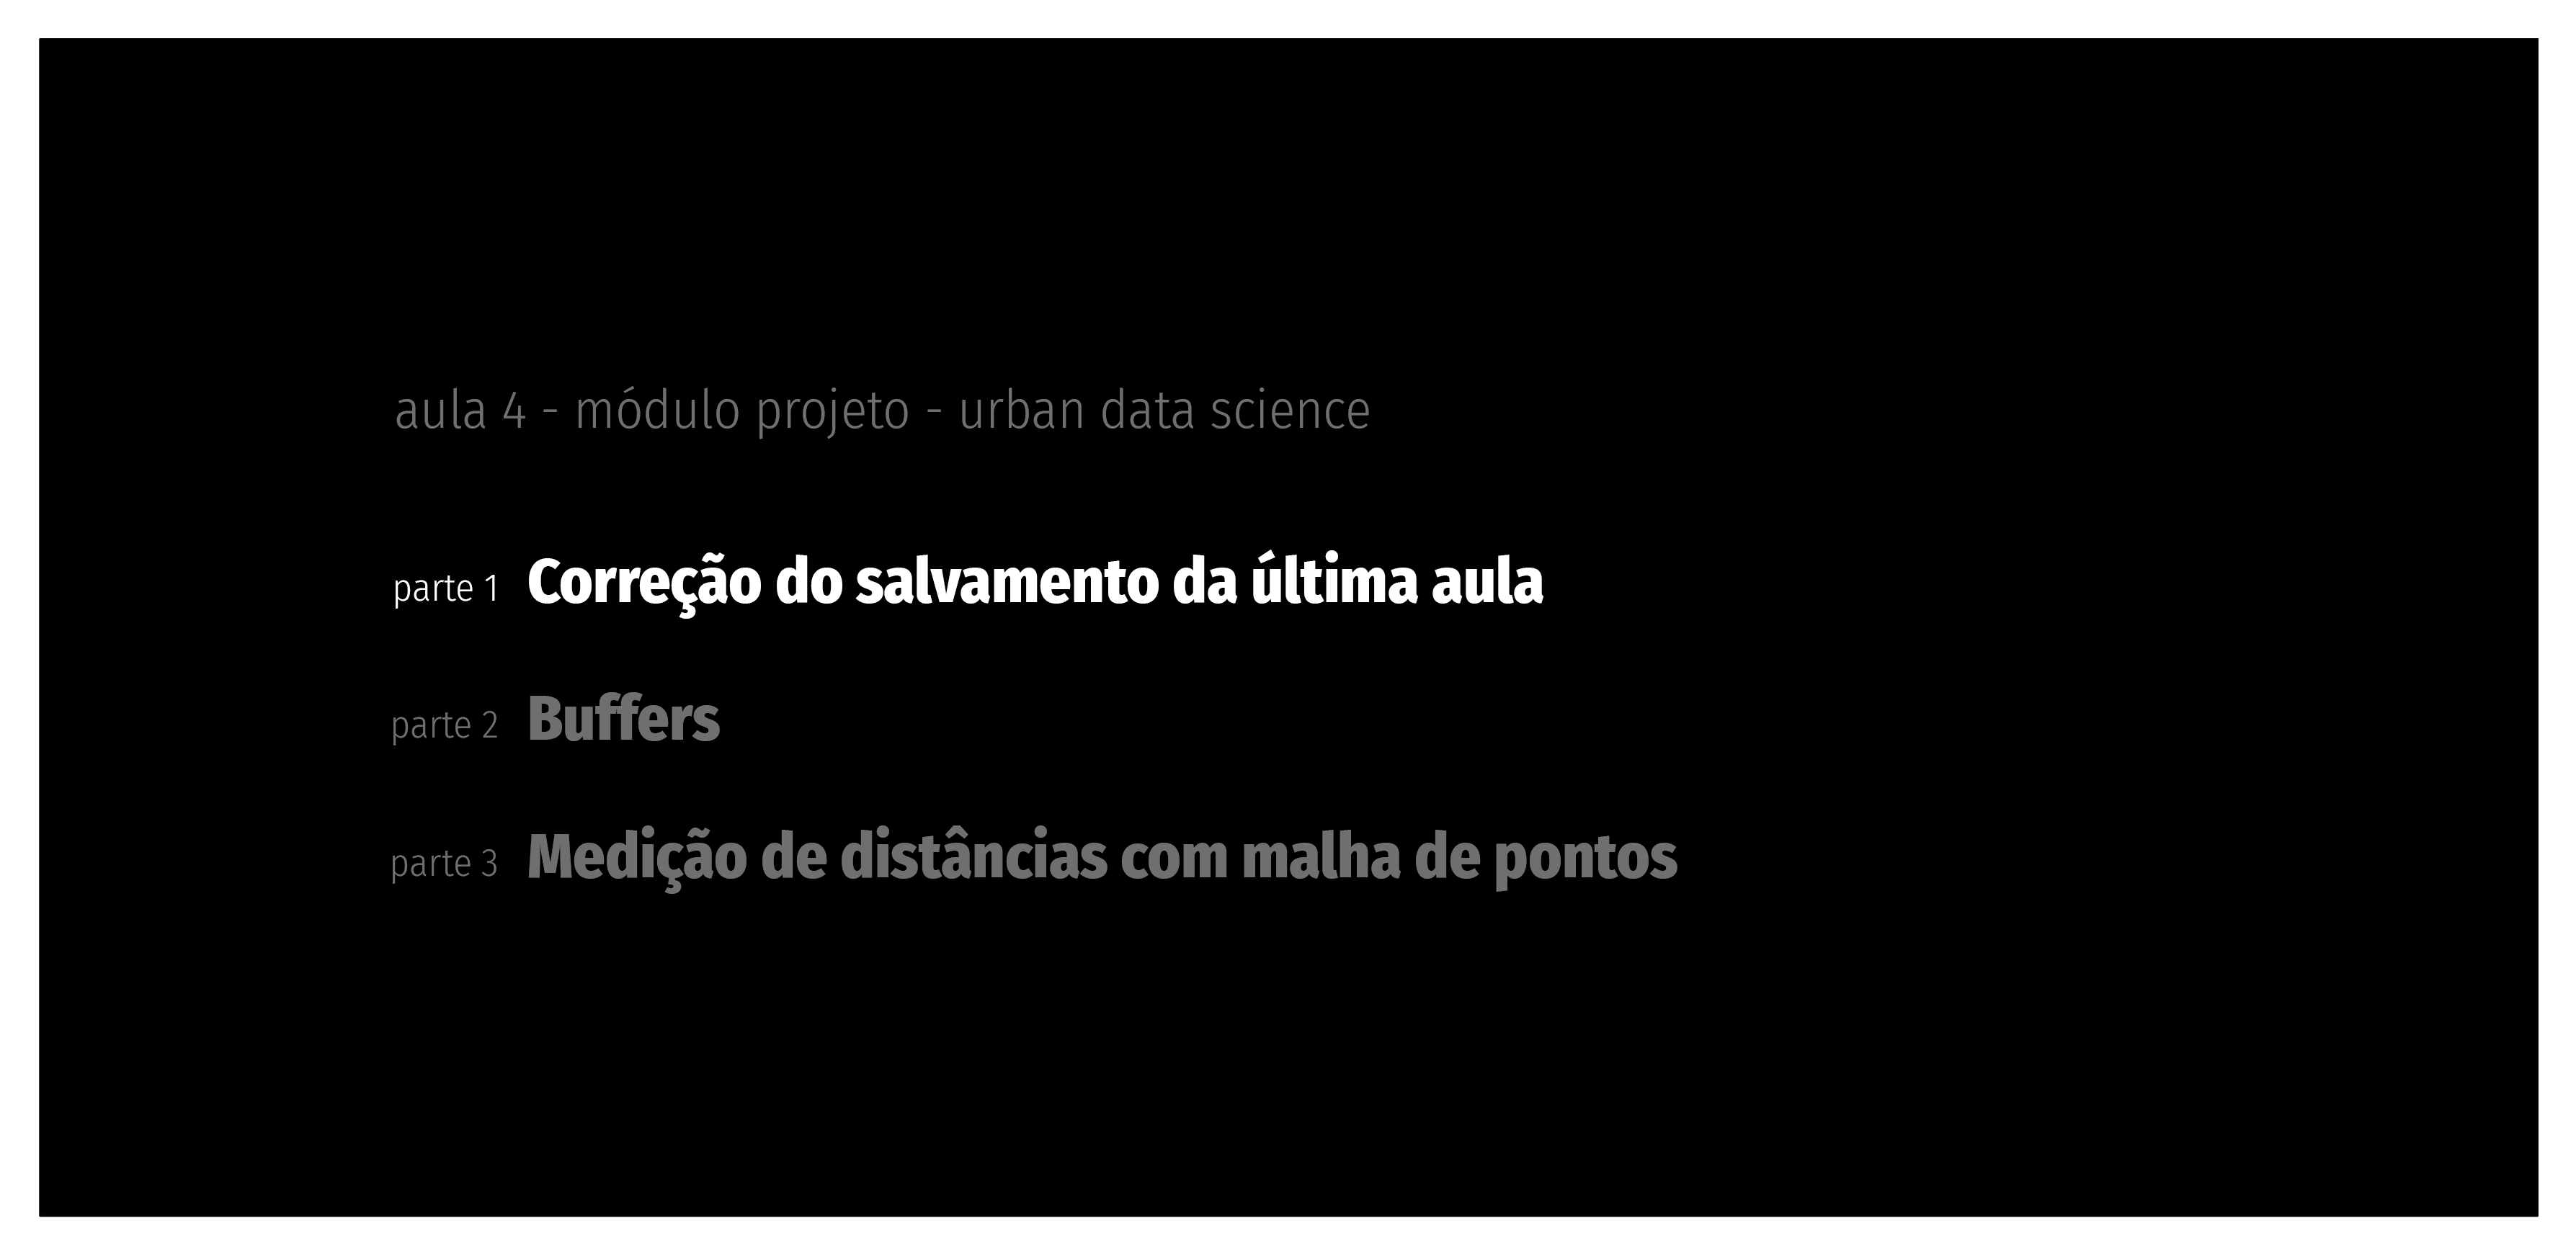

Na aula passada, ao tentarmos salvar a variável contendo a união entre as geometrias do zoneamento urbanístico e a tabela de índices do Plano Diretor, ocorreu um erro que impediu o salvamento.

A razão do erro foi que, para realizar a operação de merge, havíamos criado a coluna "ZONA" na tabela de índices para poder conectá-la à coluna de mesmo nome na base geométrica das zonas. **O problema é que, com essa adição, a tabela ficou com uma coluna chamada "Zona" e outra "ZONA", o que não é aceito pelo comando de enviar arquivos ao Google Drive**, pois ele não diferencia letras maiúsculas de minúsculas.

A solução, portanto, seria deletar uma das colunas antes de salvar a tabela ou modificar o nome da coluna antes de sua importação.

**MERGE DO ARQUIVO DE ZONEAMENTO COM A TABELA DE ÍNDICES**

Iniciamos importando a base do zoneamento do Plano Diretor que produzimos na aula 02:

In [4]:
#indicação da pasta onde está o arquivo no google drive
pasta_arquivos = '/content/drive/MyDrive/Arquivos_UDS_3/arquivos_manipulados/'

#conversão do arquivo em GDF
zoneamento = gpd.read_file(pasta_arquivos + 'zoneamento_plano_diretor.gpkg')

In [ ]:
#verificação da tabela do GDF
zoneamento

Então, importamos a planilha com os índices do Plano Diretor de São Paulo, obtido do site da prefeitura do município: https://gestaourbana.prefeitura.sp.gov.br/marco-regulatorio/zoneamento/arquivos/

In [6]:
#indicação da pasta onde está o arquivo no google drive
pasta_arquivos = '/content/drive/MyDrive/Arquivos_UDS_3/'

#conversão do arquivo em DataFrame
tabela_indices = pd.read_excel(pasta_arquivos + 'indices_plano_diretor.xlsx')

In [ ]:
#verificação da tabela do DF
tabela_indices

Novamente, precisamos criar colunas com o mesmo nome em ambos os arquivos que serão unidos:

In [8]:
#criação de nova coluna no DF tabela_indices
tabela_indices['ZONA'] = tabela_indices['Zona']

Então, realizamos a união das duas variáveis com base no valor da coluna "ZONA":

In [9]:
#união do GDF de zoneamento com o DF contendo a tabela de indices
zoneamento_com_indices = zoneamento.merge(tabela_indices, on="ZONA")

In [ ]:
#tabela do GDF resultantes
zoneamento_com_indices

In [ ]:
#mostra descrição geral do conteúdo do GDF
zoneamento_com_indices.describe(include="all")

Para evitar erros no salvamento da base de dados no Google Drive, utilizamos o comando drop() para remover a coluna "Zona" do GeoDataFrame resultante:

In [12]:
#comando drop exclui coluna "Zona" do GDF
zoneamento_com_indices.drop('Zona', inplace=True, axis=1)

Por fim, salvamos o GDF manipulado em nossa pasta de arquivos do Google Drive:

In [13]:
#geração de um gpkg a partir do GDF da grade estatística
zoneamento_com_indices.to_file('zoneamento_plano_diretor_com_indices.gpkg')

#indicação da pasta onde será salvo o arquivo no google drive
pasta_arquivos = '/content/drive/MyDrive/Arquivos_UDS_3/arquivos_manipulados/'

#envio do gpkg para o google drive
!cp 'zoneamento_plano_diretor_com_indices.gpkg' {pasta_arquivos}

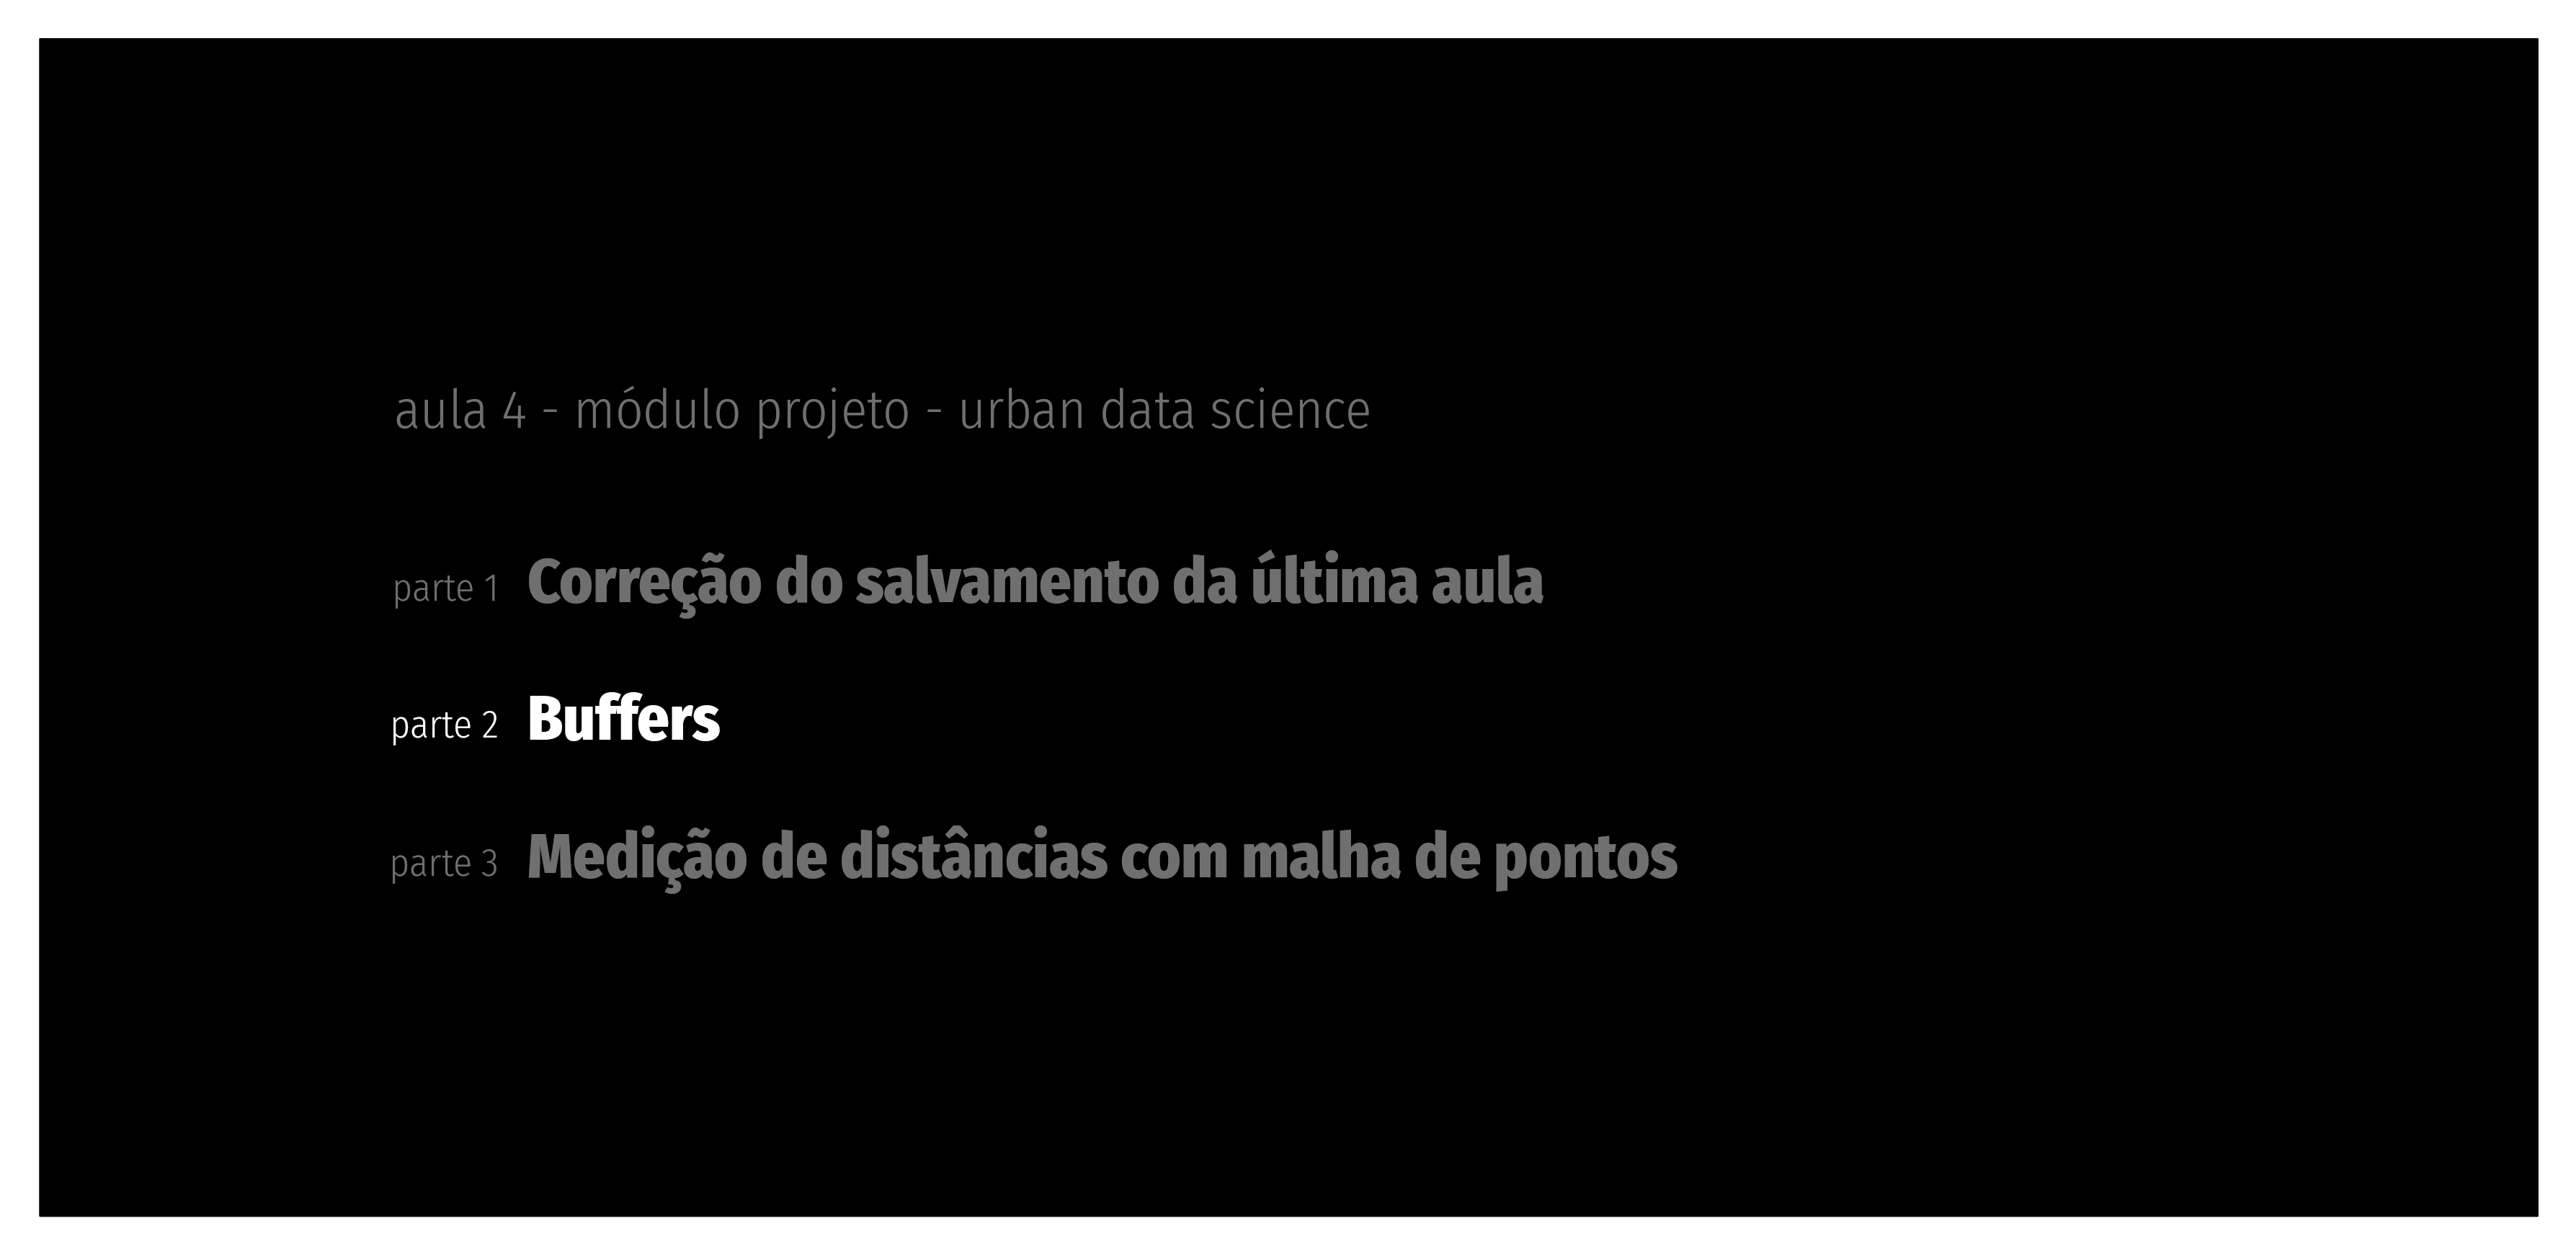

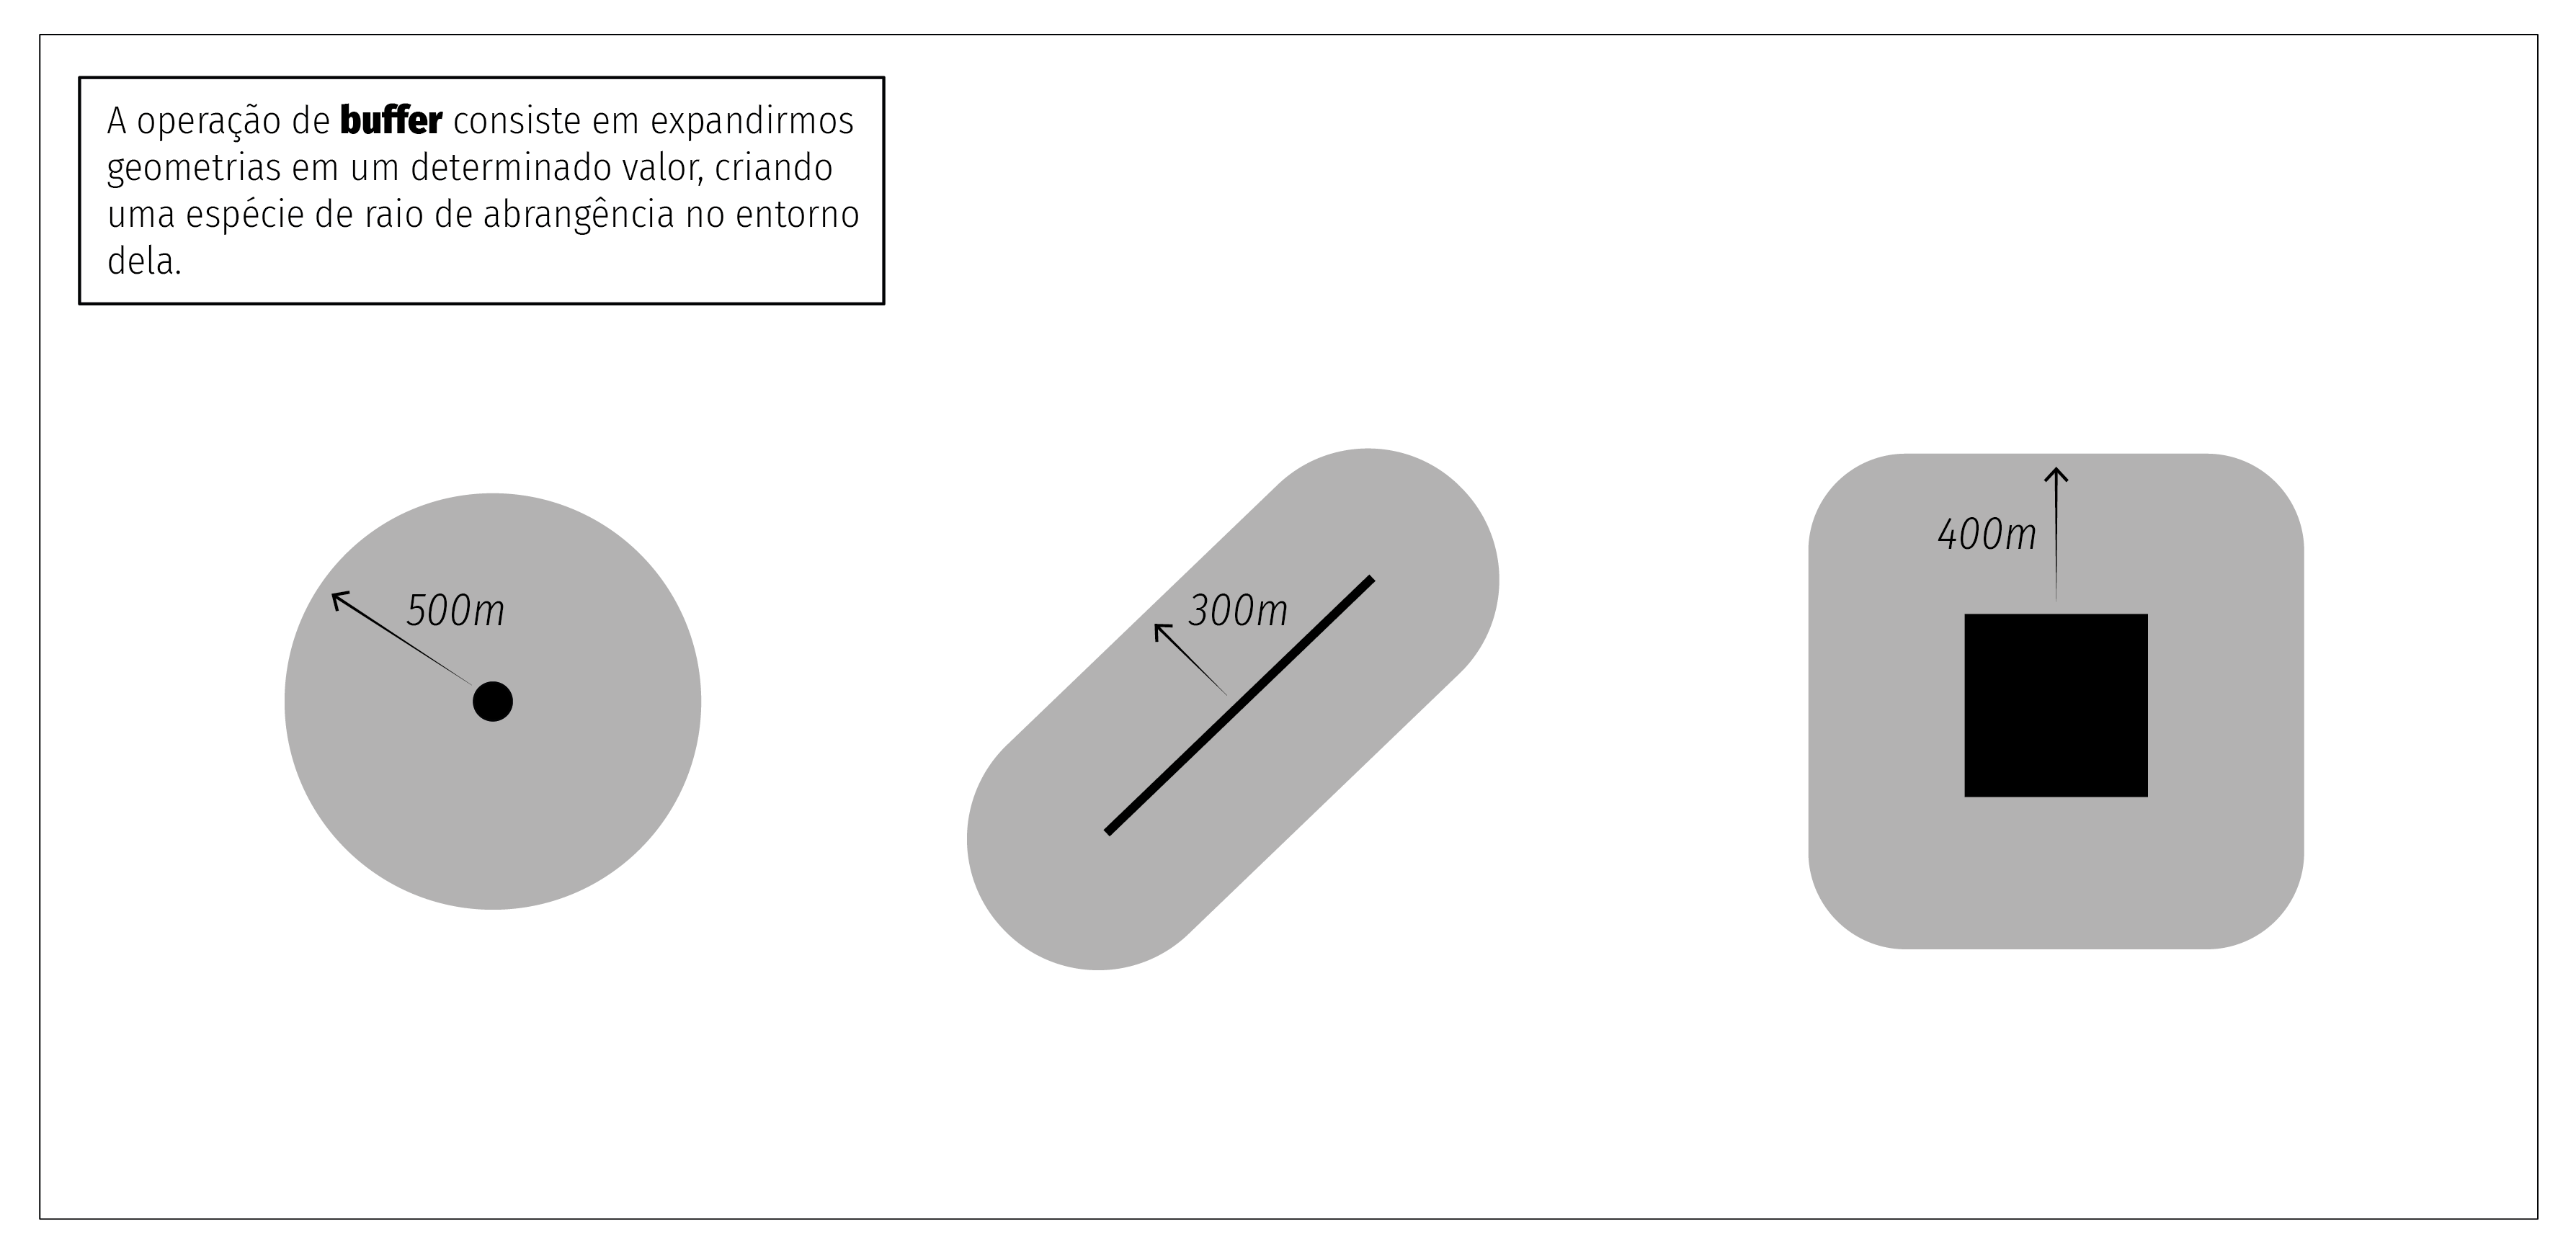

Novamente, utilizaremos os dados disponibilizados pela plataforma GeoSampa: https://geosampa.prefeitura.sp.gov.br/

Mais especificamente, os seguintes dados da aba "Transporte":

- Rede Cicloviária (arquivo GPKG_ZIP)
- Metro Estação (arquivo GPKG_ZIP)

E também os seguintes dados da aba "Verde e Recursos Naturais":

- Parque Estadual (arquivo GPKG_ZIP)
- Parque Outras Secretarias (arquivo GPKG_ZIP)
- Parque Unidades Conservação (arquivo GPKG_ZIP)
- Parques Municipais (arquivo Shapefile)

Esses arquivos também estão na seguinte pasta do Google Drive: https://drive.google.com/drive/folders/1ODwbWiIBLVidme4uDSSZb1sLbZbiPGBn?usp=sharing

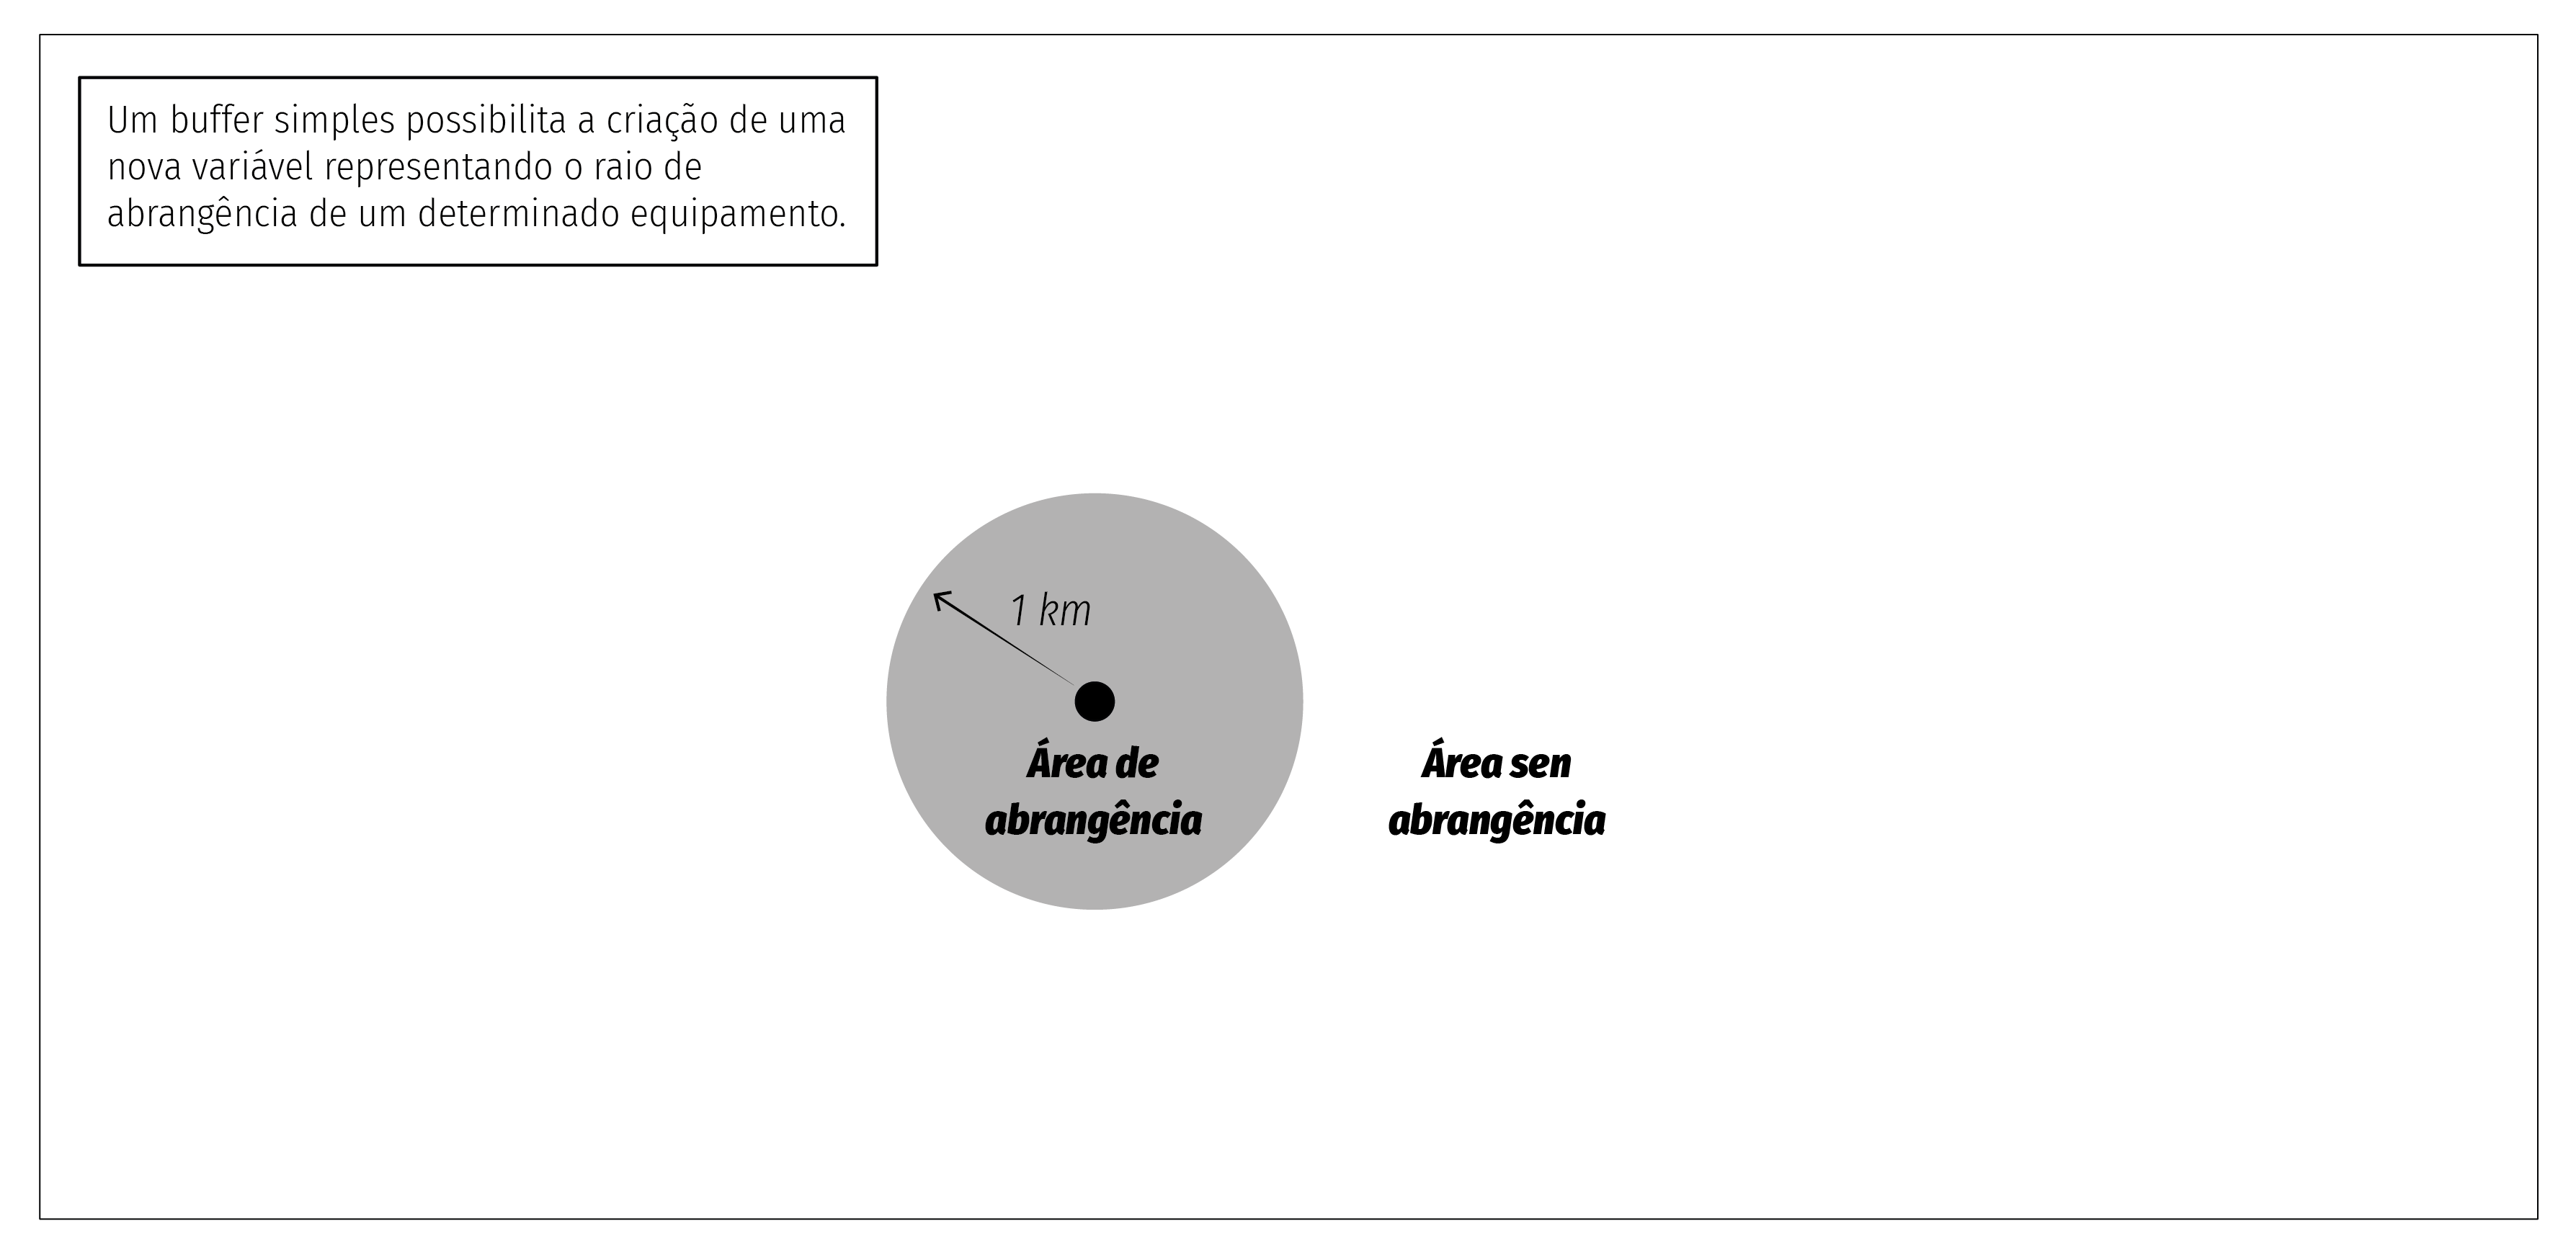

In [ ]:
#indicação da pasta do google drive a ser utilizada
pasta_transporte = '/content/drive/MyDrive/Arquivos_UDS_4/transporte/'

#conversão do arquivo em GDF
estacoes_metro = gpd.read_file(pasta_transporte + 'SIRGAS_GPKG_estacaometro.zip')

#visualização da geometria do GDF resultante
estacoes_metro.plot()

In [ ]:
#visualização da tabela do GDF criado
estacoes_metro

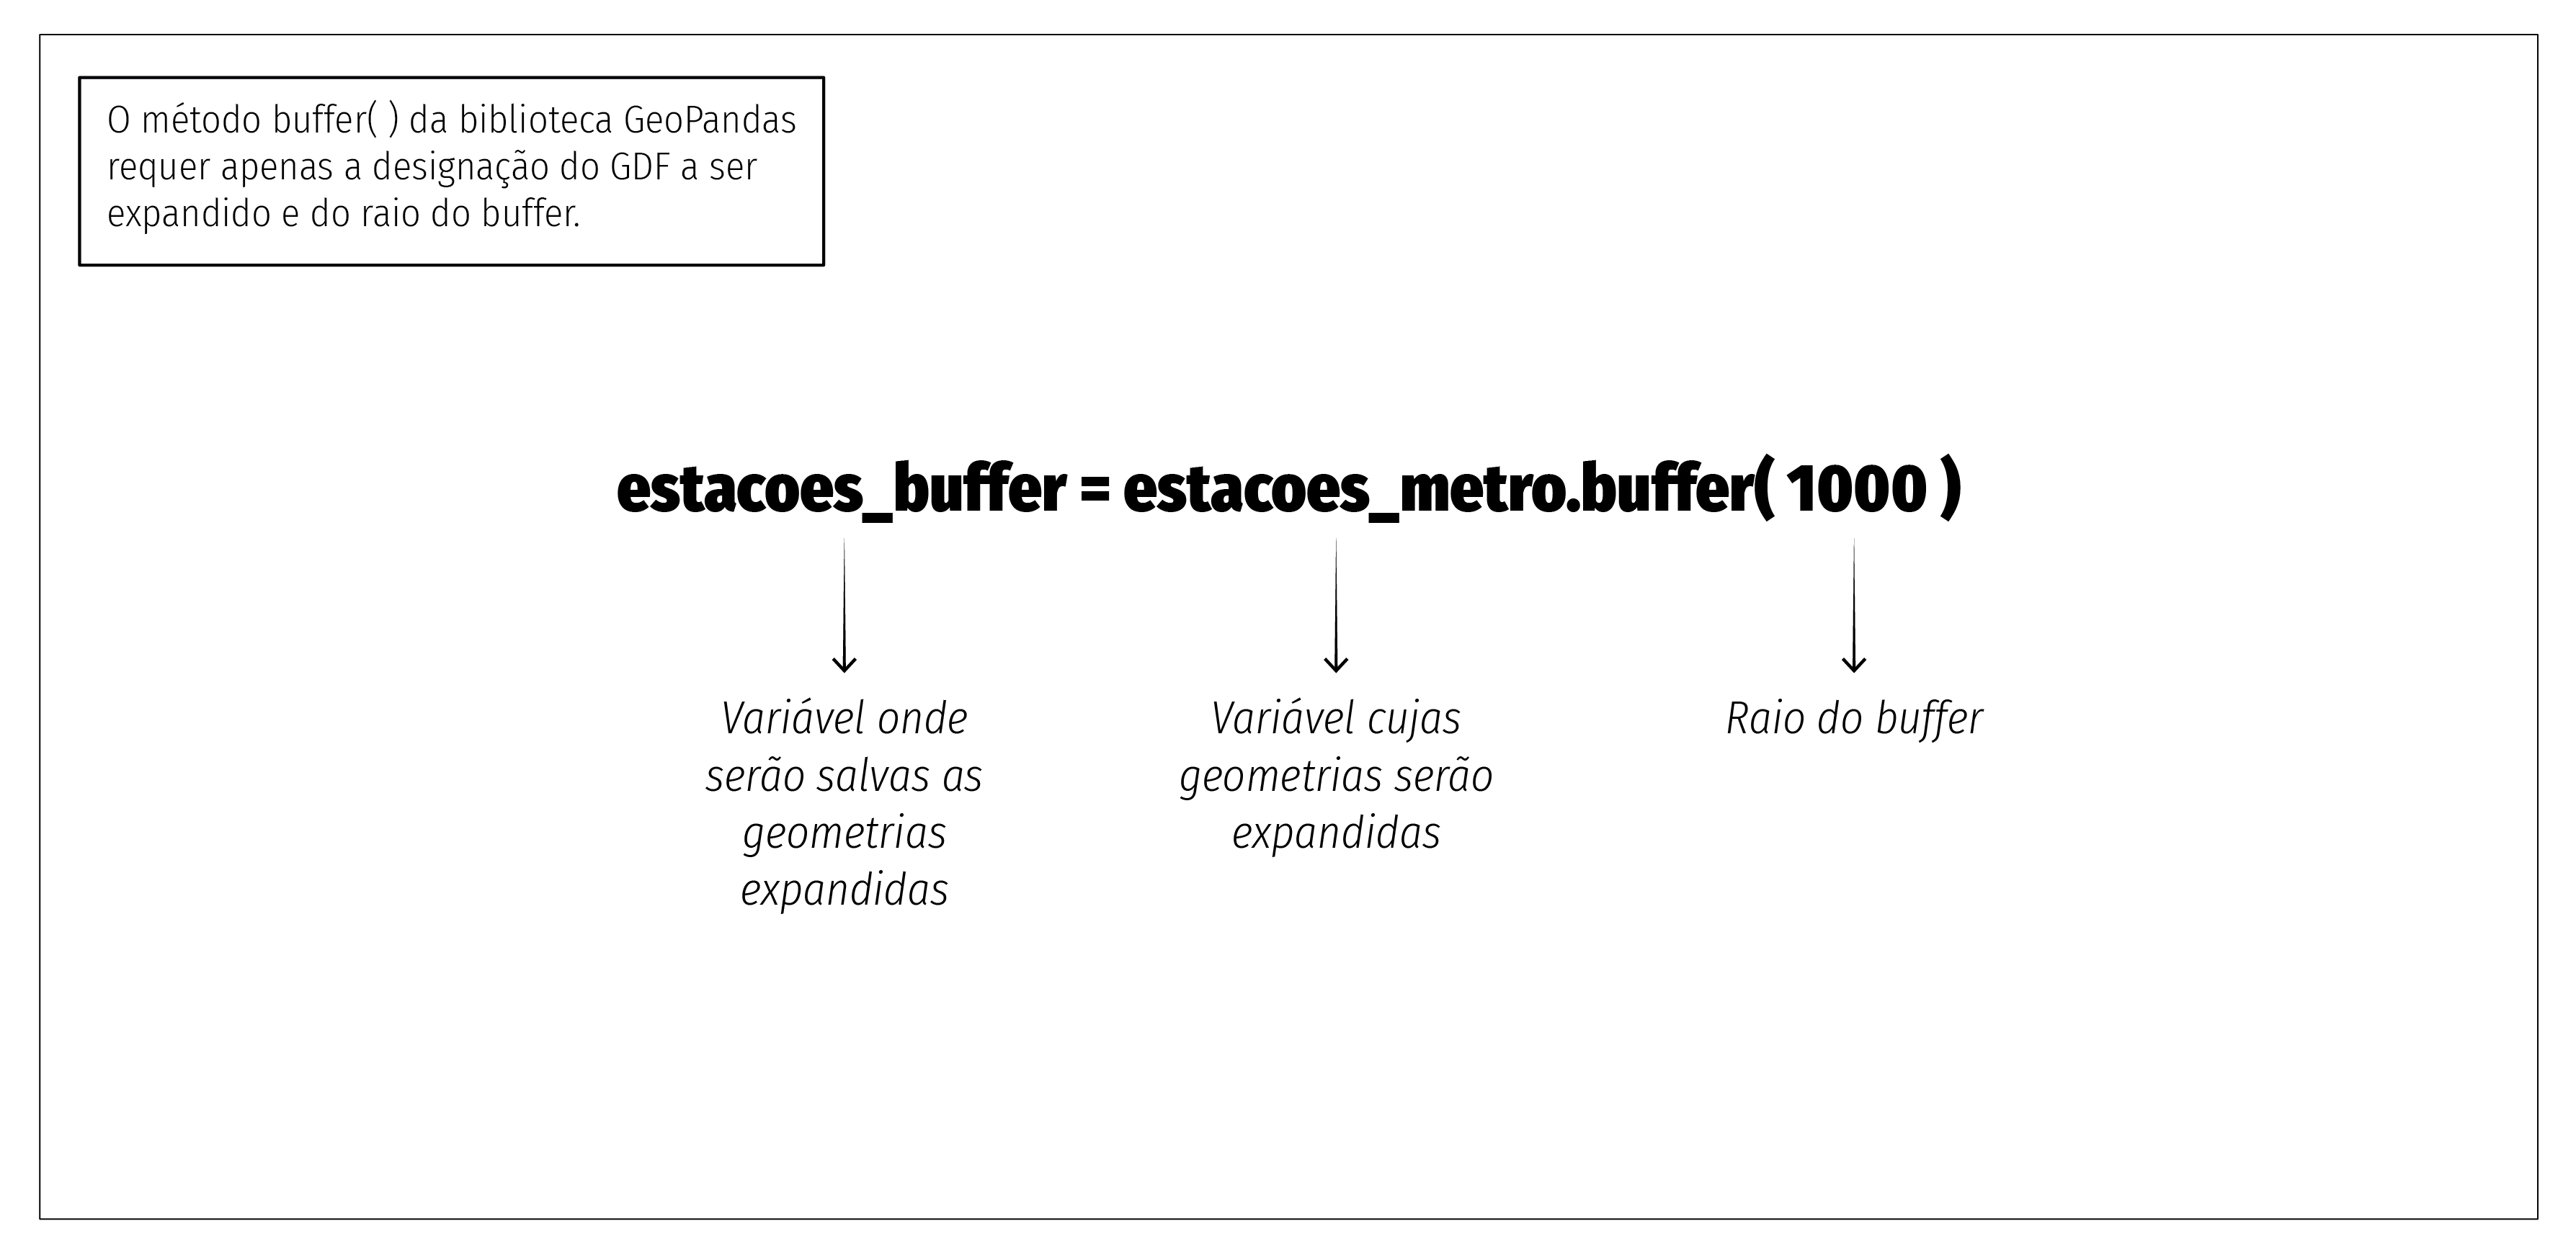

In [ ]:
#operação de buffer de 1km com a geometria das estações de metrÔ
estacoes_buffer = estacoes_metro.buffer(1000)

#visualização da geometria resultante
estacoes_buffer.plot()

O problema da operação de buffer é que ela não gera como resultado um GeoDataFrame, mas sim uma GeoSeries, tipo de variável que possui apenas uma coluna, que nesse caso contém a geometria do buffer.

In [ ]:
#visualização dos atributos do resultado do buffer
estacoes_buffer

Uma forma de realizar a operação de buffer sem perder as informações contidas no GeoDataFrame original é salvar as geometrias expandidas na coluna "geometry" do GeoDataFrame.

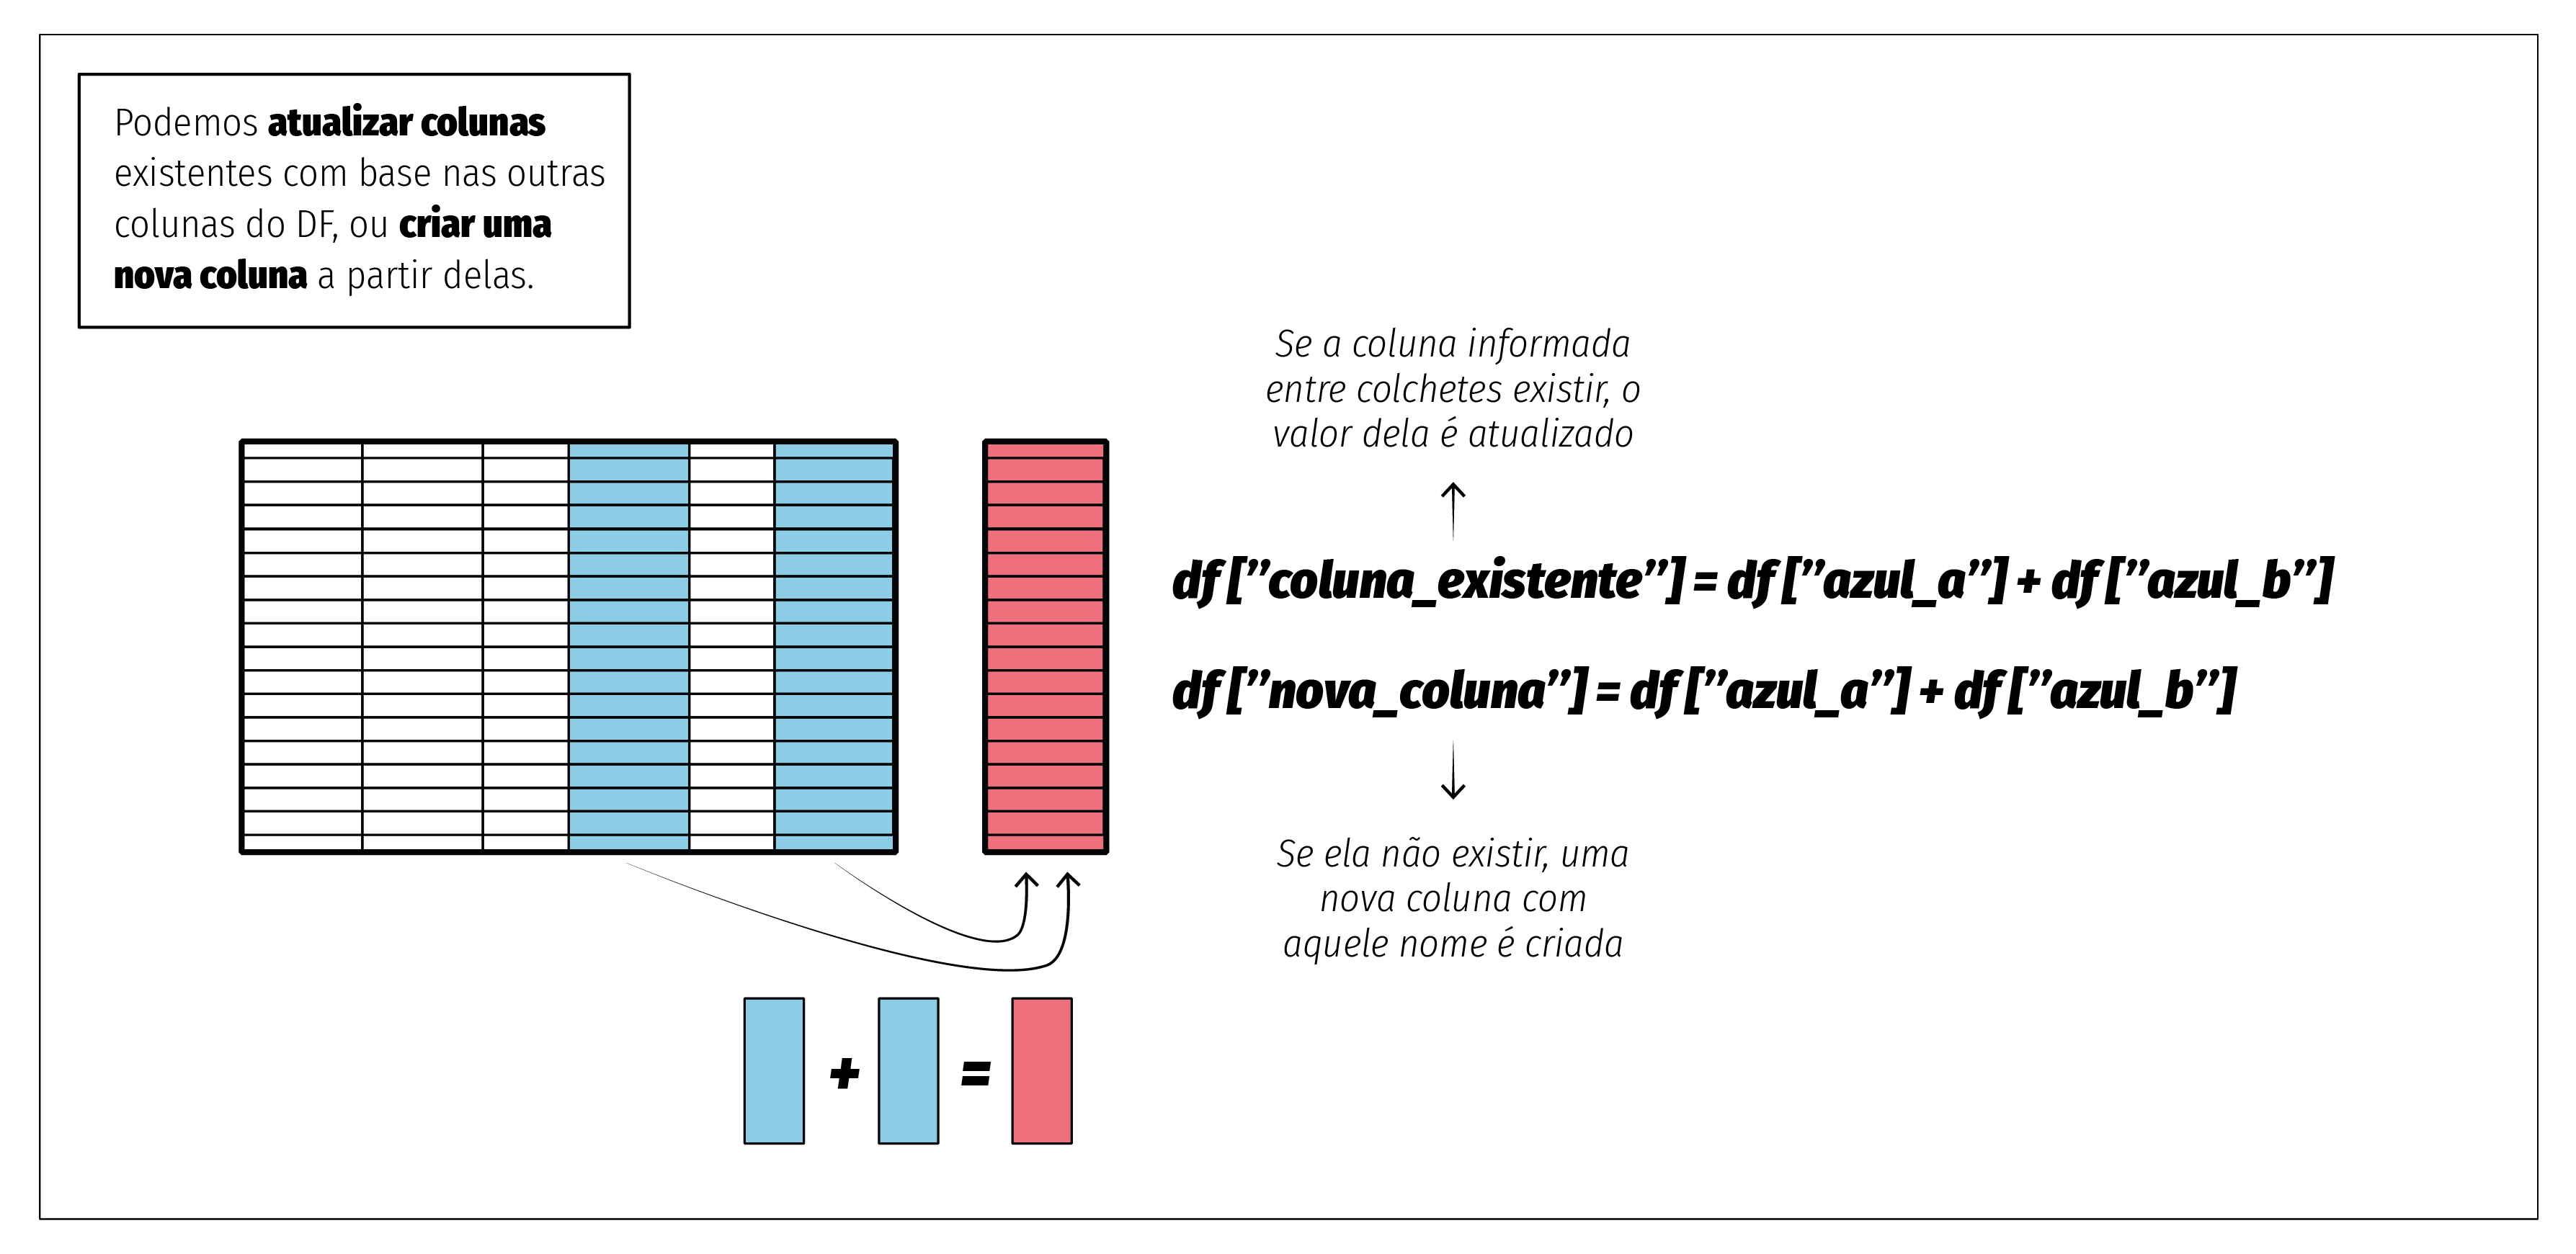

Para não perder a geometria da variável original, pode-se criar uma cópia dela para a realização do buffer. Porém, deve-se cuidar que, para variáveis complexas no Python, a criação de cópias nem sempre é um processo tão simples.

Note que, no código abaixo, a modificação da cópia gera automaticamente uma modificação na variável original:

In [ ]:
#definição de uma lista
lista_de_listas = [1,2,3,4,5,6,7]

#criação de uma cópia da lista acima
segunda_lista = lista_de_listas

#modificação da cópia
segunda_lista[0] = 99

#visualização da variável original
print(lista_de_listas)

Isso ocorre porque o Python não salva o valor que a variável contém, mas sim o endereço dela na memória do computador.

Para evitar esse problema, o melhor método é utilizar o comando *deepcopy( )* do módulo *copy* do Python:

In [ ]:
#importação do módulo copy
import copy

#criação de cópia do gdf de estações de metrô
estacoes_buffer = copy.deepcopy(estacoes_metro)

#operação de buffer com resultado salvo na coluna geometry do GDF
estacoes_buffer['geometry'] = estacoes_metro.buffer(1000)

#visualização das geometrias resultantes
estacoes_buffer.plot(column='emt_nome')

Como mostrado pelo código abaixo, a operação acima cria a geometria do buffer e mantém os atributos originais da base de dados:

In [20]:
#visualização da tabela
estacoes_metro

,emt_situac,emt_linha,emt_empres,emt_nome,geometry
0,OPERANDO,AZUL,METRO,SÉ,POINT (333310.173 7394533.150)
1,OPERANDO,VERMELHA,METRO,CORINTHIANS-ITAQUERA,POINT (349839.380 7395675.047)
2,OPERANDO,VERMELHA,METRO,ARTUR ALVIM,POINT (348457.592 7395884.165)
3,OPERANDO,VERMELHA,METRO,PATRIARCA,POINT (346732.712 7396874.617)
4,OPERANDO,VERMELHA,METRO,GUILHERMINA-ESPERANÇA,POINT (345181.965 7397070.921)
...,...,...,...,...,...
88,OPERANDO,LILAS,METRO,CAMPO BELO,POINT (328372.660 7386947.605)
89,OPERANDO,PRATA,METRO,SÃO MATEUS,POINT (349346.887 7387941.960)
90,OPERANDO,PRATA,METRO,FAZENDA DA JUTA,POINT (348245.483 7387974.765)
91,OPERANDO,PRATA,METRO,SAPOPEMBA,POINT (346825.077 7387620.515)


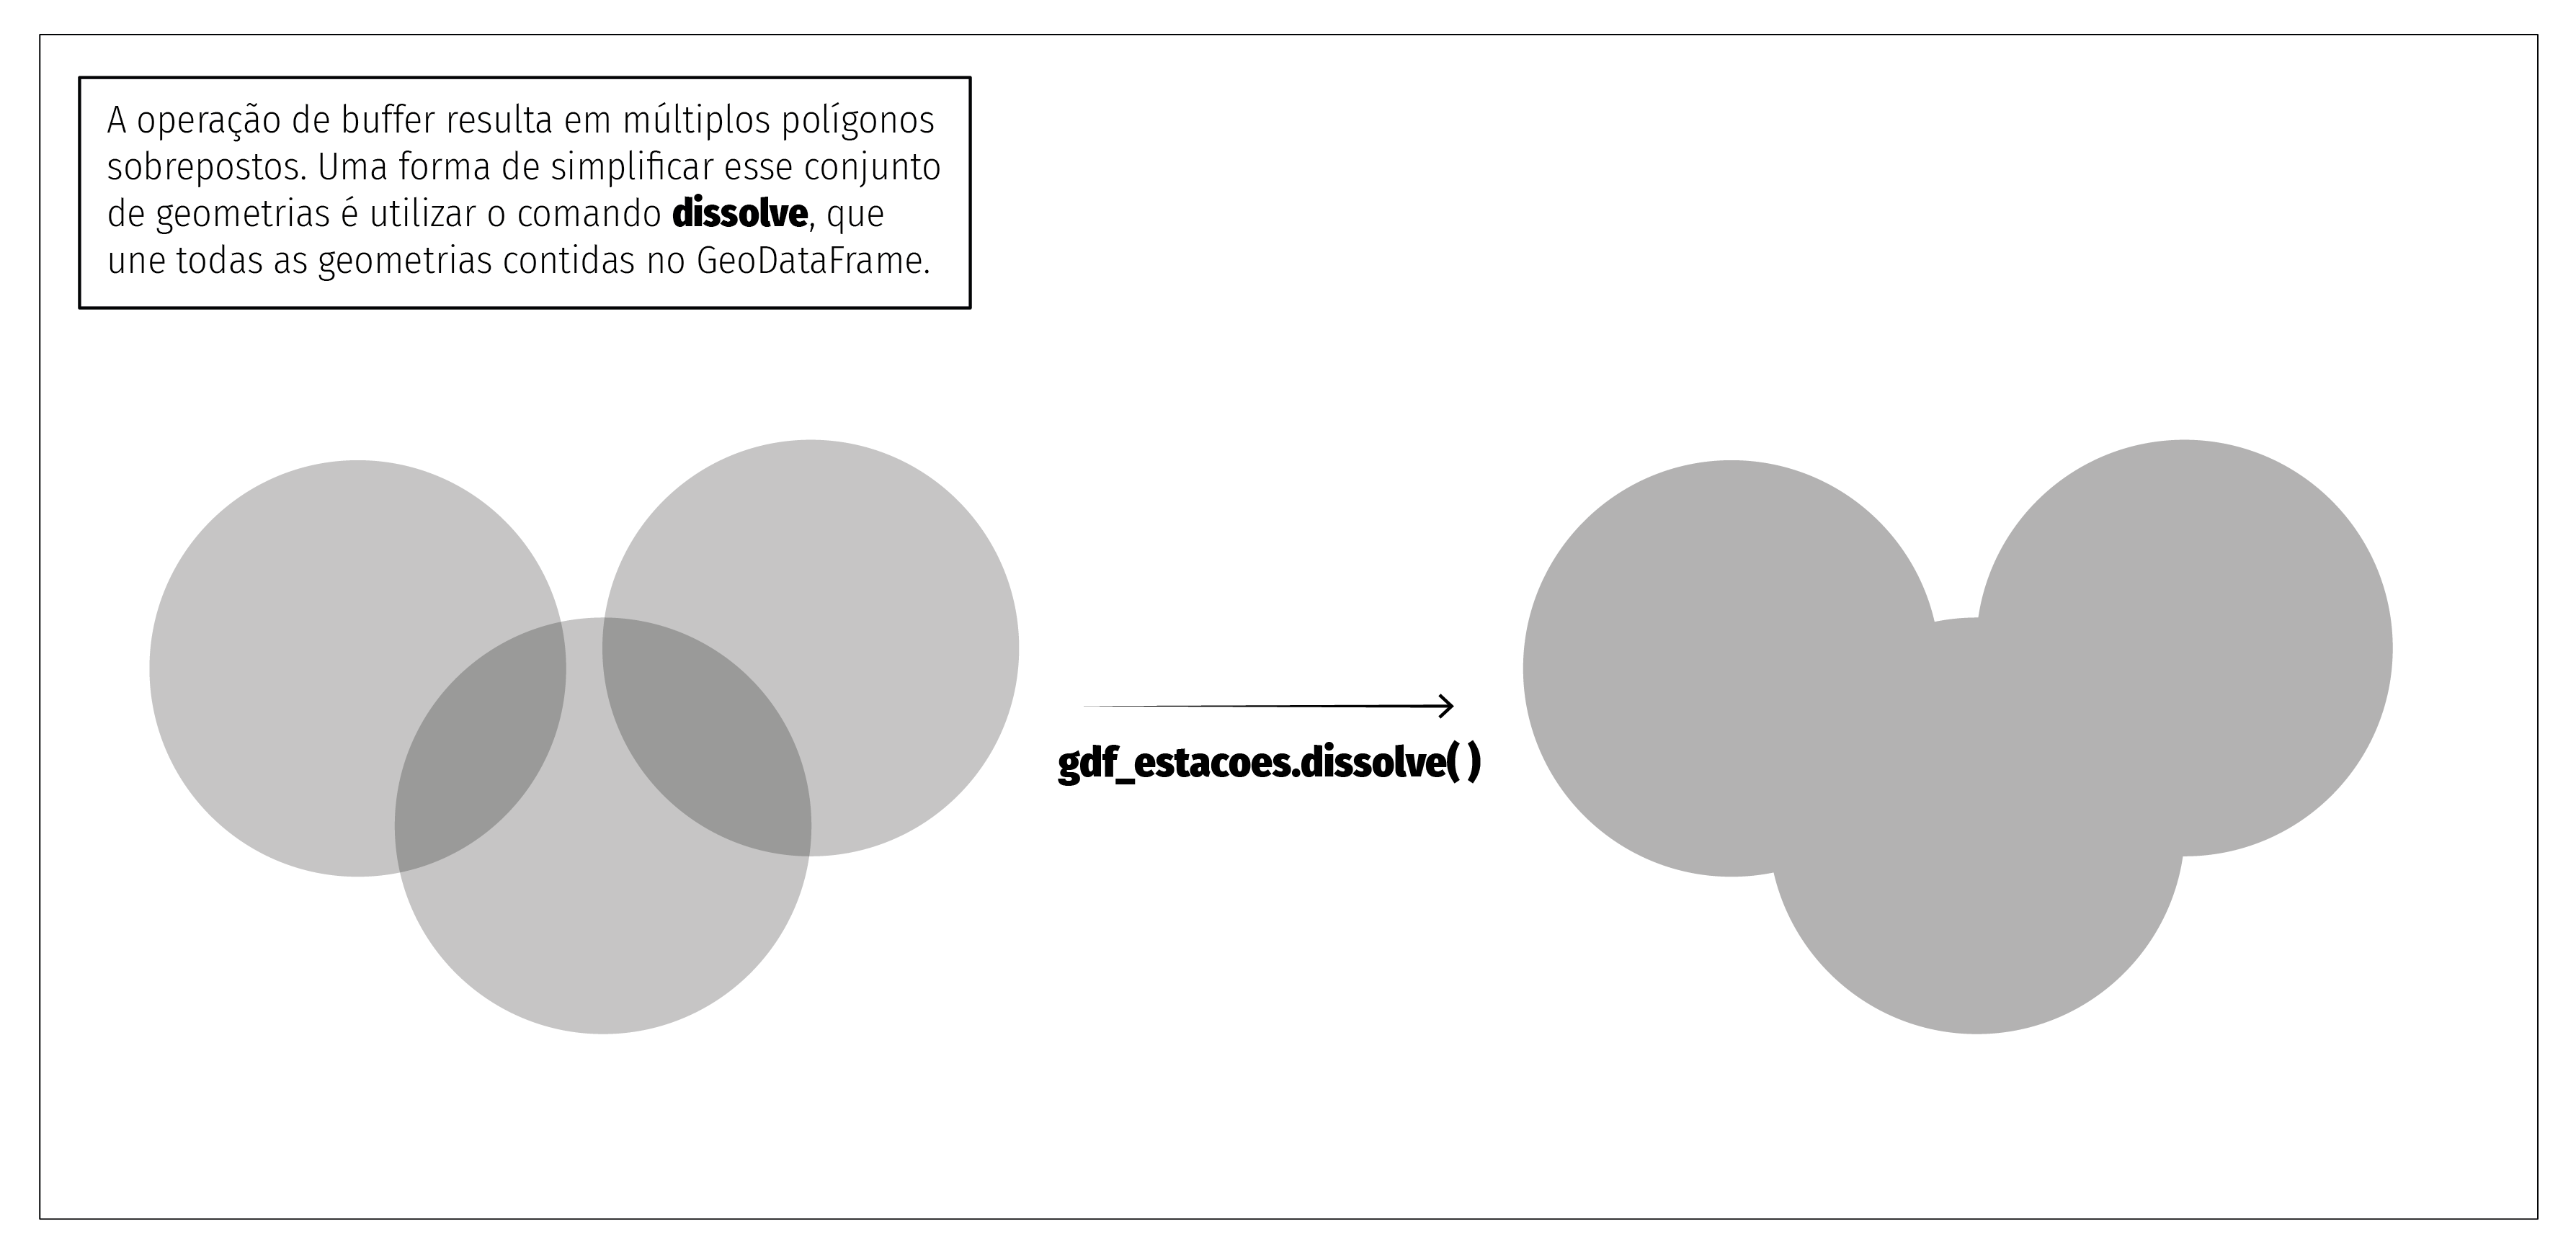

Aplicando o método dissolve( ), unimos as geometrias anteriores em uma única geometria.

In [ ]:
#método dissolve une as geometrias do GDF
estacoes_buffer_dissolve = estacoes_buffer.dissolve()

#visualização da geometria resultante
estacoes_buffer_dissolve.plot()

In [ ]:
#visualização da tabela do GDF resultante
estacoes_buffer_dissolve

Por fim, geramos uma visualização da geometria resultante no mapa de São Paulo:

In [ ]:
#conversão do GDF para o sistema de coordenadas padrão
estacoes_buffer_proj = estacoes_buffer_dissolve.to_crs('EPSG: 4326')

#definição da função que gera mapa com a biblioteca plotly express
def mostra_mapa_escala_cores(nome_gdf, coluna_referencia):
  #geração do mapa contextualizado
  fig = px.choropleth_mapbox(nome_gdf,
                           geojson=nome_gdf.geometry,
                           locations=nome_gdf.index,
                           color=coluna_referencia,
                           color_continuous_scale="Viridis",
                           mapbox_style="carto-positron",
                           zoom=11, center = {"lat": -23.5119, "lon": -46.6703},
                           opacity=0.5
                          )

  #ajuste das configurações da janela do mapa
  fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

  #apresentação do mapa na tela
  fig.show()

#executa função acima
mostra_mapa_escala_cores(estacoes_buffer_proj, 'emt_nome')

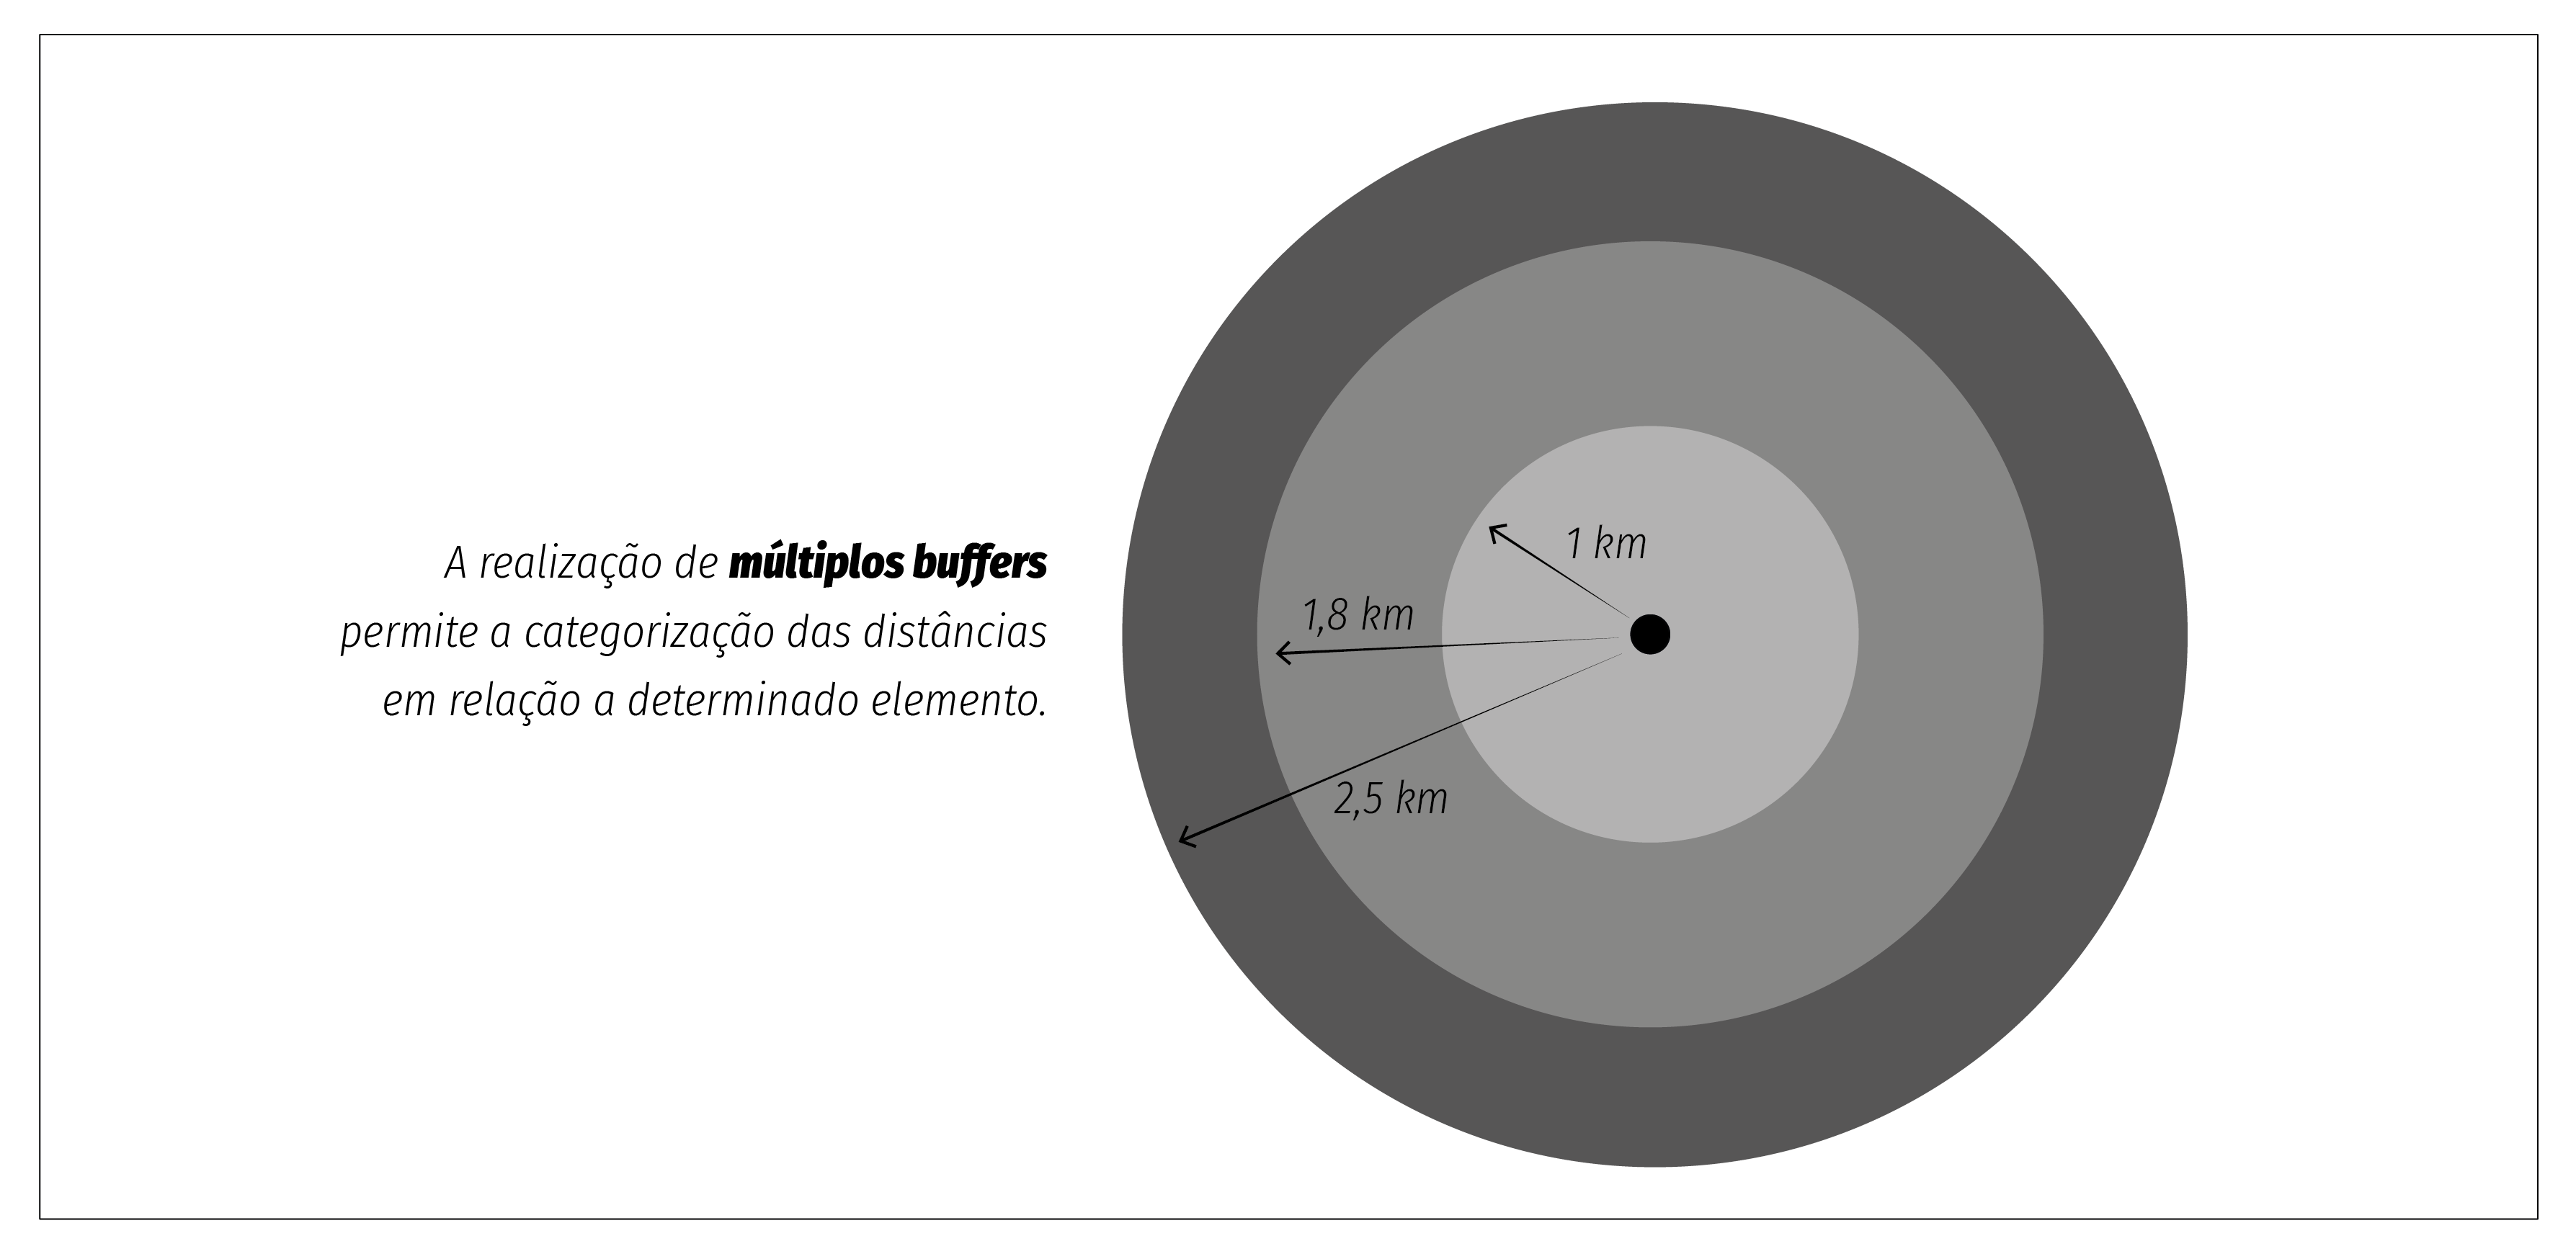

No exemplo anterior, utilizamos uma base de pontos. Agora vemos como gerar os buffer a partir de uma base de linhas, contendo a rede cicloviária da cidade de São Paulo:

In [ ]:
#indicação da pasta do google drive a ser utilizada
pasta_transporte = '/content/drive/MyDrive/Arquivos_UDS_4/transporte/'

#conversão do arquivo em GDF
rede_cicloviaria = gpd.read_file(pasta_transporte + 'SIRGAS_GPKG_redecicloviaria.zip')

#visualização da geometria do GDF resultante
rede_cicloviaria.plot()

Para ficar mais fácil de visualizar as geometrias, utilizamos o método clip( ) para delimitar a base apenas à área de análise:

In [ ]:
#definição das coordenadas da área de análise
vertices = [[325805, 7396276], [330219, 7396276], [330219,7402006], [325805,7402006]]

#criamos um polígono a partir dos vertices
poligono = shapely.Polygon( vertices )

#criação de um GDF contendo apenas o polígono a ser utilizado como referência
gdf_polygon = gpd.GeoDataFrame(crs='EPSG:31983', geometry=[poligono])

#operação de clip da rede cicloviaria usando polígono recém criado como referência
rede_cicloviaria_clip = rede_cicloviaria.clip(gdf_polygon)

#visualização da geometria resultante
rede_cicloviaria_clip.plot()

Para gerar múltiplos buffers a partir de uma camada, podemos utilizar um laço de repetição:

In [ ]:
#definição dos raios para os quais serão criados buffers
buffer_raios = [200, 400, 600, 800, 1000]

for distancia in buffer_raios:
  #criação de cópia do GDF original
  rede_cicloviaria_copia = copy.deepcopy(rede_cicloviaria_clip)

  #alteração da geometria do GDF, substituída pelo buffer
  rede_cicloviaria_copia['geometry'] = rede_cicloviaria_copia.buffer(distancia)

  #união de todas as geometrias no GDF
  rede_cicloviaria_copia = rede_cicloviaria_copia.dissolve()

  #apresentação do resultado
  rede_cicloviaria_copia.plot()

Mas, como unir todos os resultados gerados em um único GDF?

Poderíamos salvar os resultados em uma lista e, ao fim do processo, utilizar o comando concat( ) para juntar todas as geometrias:

In [ ]:
#definição dos raios para os quais serão criados buffers
buffer_raios = [200, 400, 600, 800, 1000]

#lista onde serão armazenados os resultados
resultados_buffer = []

for distancia in buffer_raios:
  #criação de cópia do GDF original
  rede_cicloviaria_copia = copy.deepcopy(rede_cicloviaria_clip)

  #alteração da geometria do GDF, substituída pelo buffer
  rede_cicloviaria_copia['geometry'] = rede_cicloviaria_copia.buffer(distancia)

  #união de todas as geometrias no GDF
  rede_cicloviaria_copia = rede_cicloviaria_copia.dissolve()

  #adicionamos resultado produzido à lista de resultados
  resultados_buffer.append(copy.deepcopy(rede_cicloviaria_copia))

#concatenação das geometrias de todos os resultados
gdf_unido = pd.concat(resultados_buffer)

#visualização da geometria resultante
gdf_unido.plot()

O problema é que a geometria resultante da concatenação possui todos os buffers sobrepostos uns aos outros.

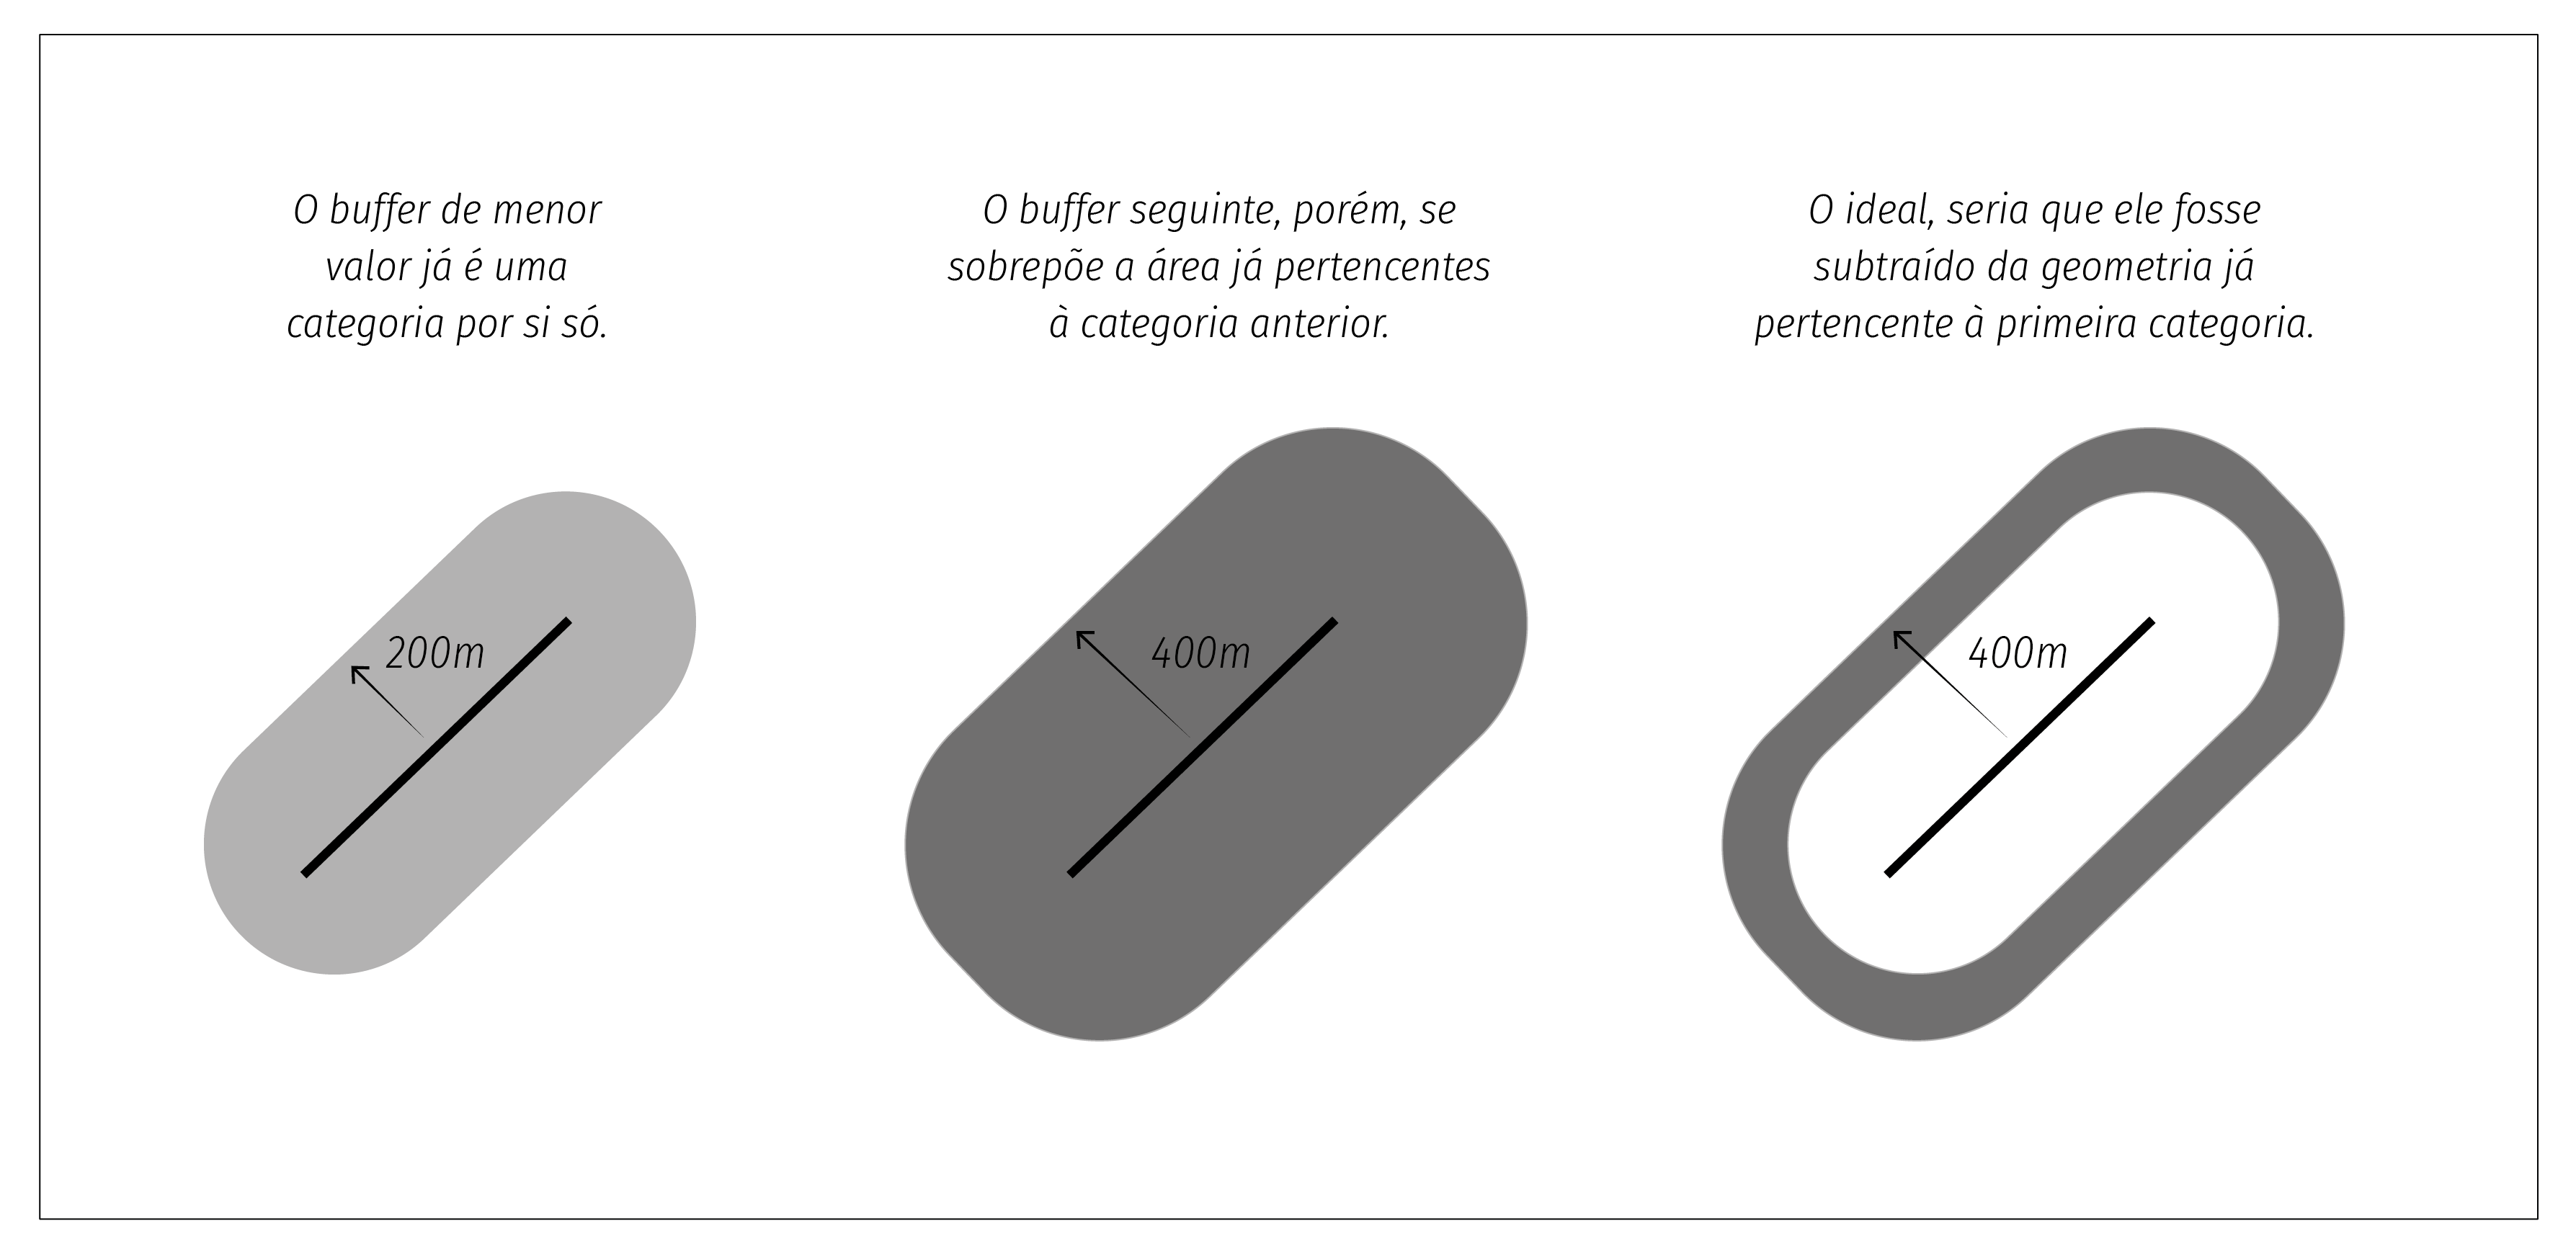

In [ ]:
#criação de cópia do GDF original
rede_cicloviaria_200 = copy.deepcopy(rede_cicloviaria_clip)

#alteração da geometria do GDF, substituída pelo buffer
rede_cicloviaria_200['geometry'] = rede_cicloviaria_200.buffer(200)

#união de todas as geometrias no GDF
rede_cicloviaria_200 = rede_cicloviaria_200.dissolve()

#apresentação do resultado
rede_cicloviaria_200.plot()

In [ ]:
#criação de cópia do GDF original
rede_cicloviaria_400 = copy.deepcopy(rede_cicloviaria_clip)

#alteração da geometria do GDF, substituída pelo buffer
rede_cicloviaria_400['geometry'] = rede_cicloviaria_400.buffer(400)

#união de todas as geometrias no GDF
rede_cicloviaria_400 = rede_cicloviaria_400.dissolve()

#mantemos na geometria apenas aquilo que difere em relação ao buffer anterior
rede_cicloviaria_400['geometry'] = rede_cicloviaria_400.difference(rede_cicloviaria_200)

#apresentação do resultado
rede_cicloviaria_400.plot()

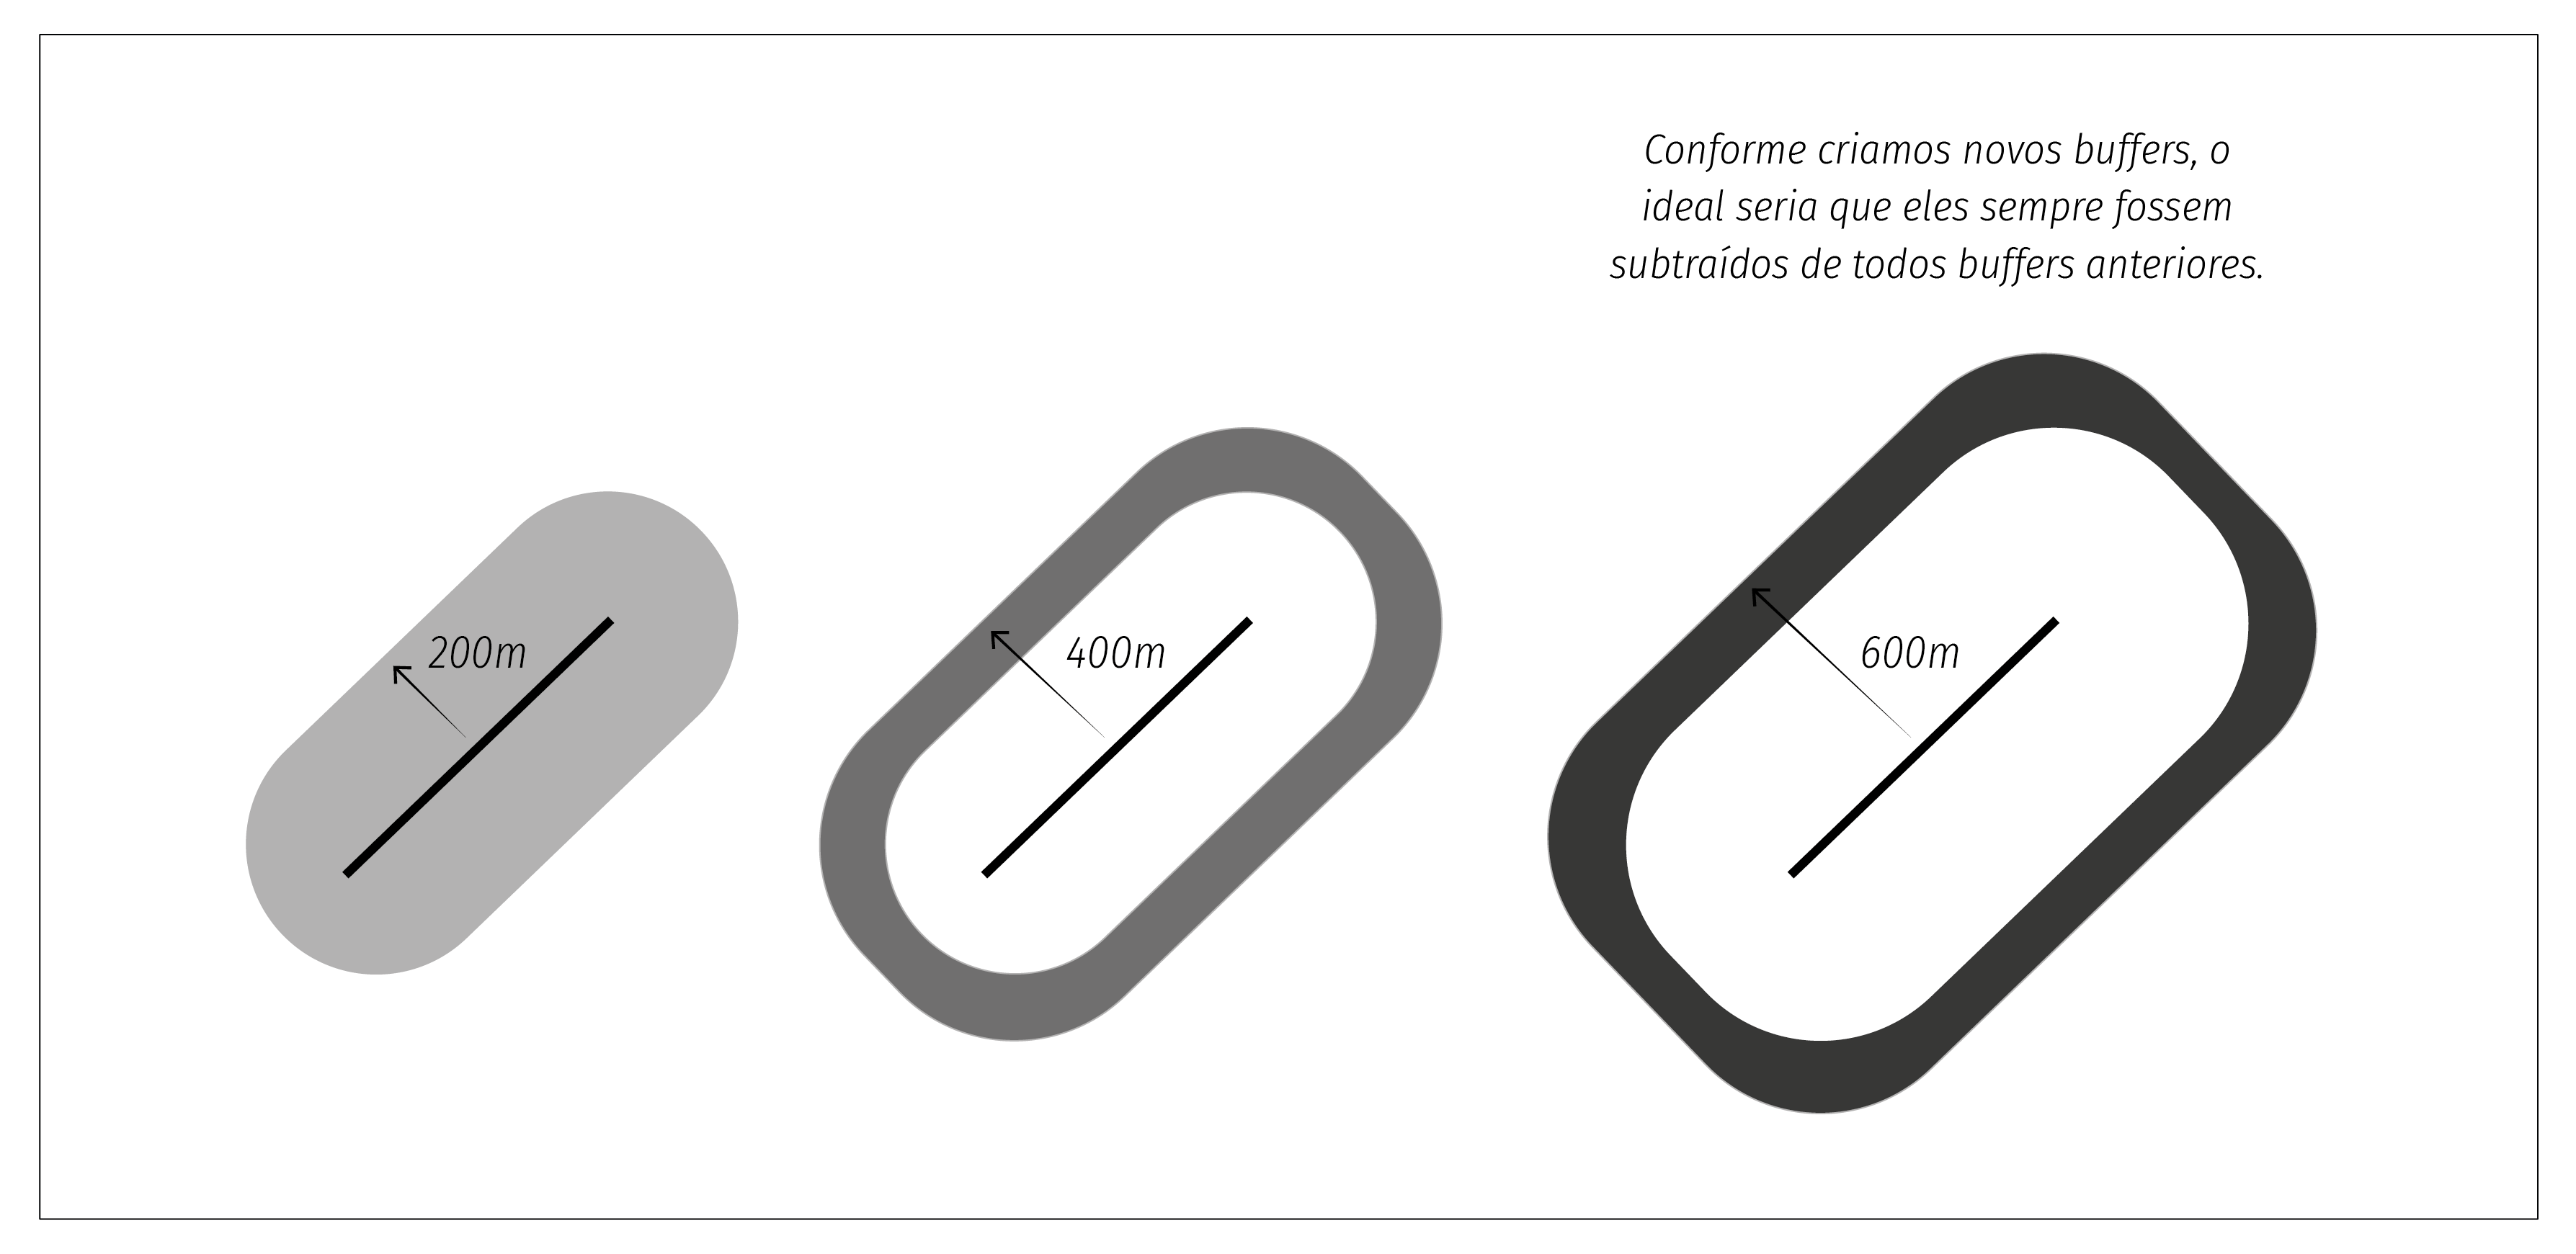

Dentro do laço de repetição, precisamos inserir um novo laço de repetição que subtrai do buffer recém-gerado todos os outros buffers que já foram gerados para distâncias menores:

In [ ]:
#definição dos raios para os quais serão criados buffers
buffer_raios = [200, 400, 600, 800, 1000]

#lista onde serão armazenados os resultados
resultados_buffer = []

for distancia in buffer_raios:
  #criação de cópia do GDF original
  rede_cicloviaria_copia = copy.deepcopy(rede_cicloviaria_clip)

  #alteração da geometria do GDF, substituída pelo buffer
  rede_cicloviaria_copia['geometry'] = rede_cicloviaria_copia.buffer(distancia)

  #registro da distância do buffer na base de dados
  rede_cicloviaria_copia['distancia'] = distancia

  #união de todas as geometrias no GDF
  rede_cicloviaria_copia = rede_cicloviaria_copia.dissolve()

  #subtraímos do buffer atual todos os buffers já inseridos na lista de resultados
  for item in resultados_buffer:
     rede_cicloviaria_copia['geometry'] =  rede_cicloviaria_copia.difference(item)

  #apresentamos a geometria na tela
  rede_cicloviaria_copia.plot()

  #adicionamos resultado produzido à lista de resultados
  resultados_buffer.append(copy.deepcopy(rede_cicloviaria_copia))

Por fim, concatenamos os resultados salvos na lista de buffers:

In [ ]:
#concatenação das geometrias de todos os resultados
gdf_unido = pd.concat(resultados_buffer)

#visualização da geometria resultante
gdf_unido.plot()

In [ ]:
#visualização da geometria resultante
gdf_unido.plot(column='distancia', cmap="inferno_r")

Note que, apesar de termos feitos a operação de clip antes, os buffers fizeram com que o resultado final excedesse a área de análise:

In [ ]:
#operação de clip para delimitar a área
rede_cicloviaria_mbuffer = gdf_unido.clip(gdf_polygon)

#apresentação do resultado
rede_cicloviaria_mbuffer.plot(column='distancia', cmap='inferno_r')

Por fim, podemos criar uma função para podermos repetir facilmente esse processo para qualquer conjunto de raios e qualquer GeoDataFrame:

In [152]:
def cria_multiplos_buffers(lista_raios, gdf_original):
  #lista onde serão armazenados os resultados
  resultados = []

  for distancia in sorted(lista_raios):
    #criação de cópia do GDF original
    gdf_copia = copy.deepcopy(gdf_original)

    #alteração da geometria do GDF, substituída pelo buffer
    gdf_copia['geometry'] = gdf_copia.buffer(distancia)

    #registro da distância do buffer na base de dados
    gdf_copia['distancia'] = distancia

    #união de todas as geometrias no GDF
    gdf_copia = gdf_copia.dissolve()

    #subtraímos do buffer atual todos os buffers já inseridos na lista de resultados
    for item in resultados:
      gdf_copia['geometry'] =  gdf_copia.difference(item)

    #adicionamos resultado produzido à lista de resultados
    resultados.append(copy.deepcopy(gdf_copia))

  #concatenação das geometrias de todos os resultados
  gdf_unido = pd.concat(resultados)

  return gdf_unido

In [ ]:
#indicação da pasta do google drive a ser utilizada
pasta_transporte = '/content/drive/MyDrive/Arquivos_UDS_4/transporte/'

#conversão do arquivo em GDF
rede_cicloviaria = gpd.read_file(pasta_transporte + 'SIRGAS_GPKG_redecicloviaria.zip')

#definição dos raios para os quais serão criados buffers
buffer_raios = [200, 400, 600, 800, 1000]

gdf_unido = cria_multiplos_buffers(buffer_raios, rede_cicloviaria)

gdf_unido.plot(column = 'distancia')

Por fim, apresentamos as geometrias resultantes no visualizador da biblioteca Folium:

In [ ]:
#importação da biblioteca folium
import folium

#criação de mapa centrado em são paulo
mapa = folium.Map(
    location=[-23.51187667627484, -46.670309053571174],
    zoom_start=10,
    tiles="CartoDB positron"
    )

gdf_unido_proj = gdf_unido.to_crs('EPSG:4326')

for _, item in gdf_unido_proj.iterrows():
    #simplificamos a geometria do gdf para tornar o mapa mais leve
    sim_geo = gpd.GeoSeries(item["geometry"]).simplify(tolerance=0.001)

    #convertemos geometria do gdf para geojson
    geo_j = sim_geo.to_json()

    #criamos uma geometria compatível com o folium a partir do geojson
    #a colorimos conforme a distância do buffer
    if item['distancia'] == 200:
      geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"color": '#fb8500'})
    elif item['distancia'] == 400:
      geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"color": '#80ed99'})
    elif item['distancia'] == 600:
      geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"color": '#023047'})
    elif item['distancia'] == 800:
      geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"color": '#e63946'})
    else:
      geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"color": '#8ecae6'})

    #indicamos coluna cujas infos apareceção em uma popup no mapa
    folium.Popup(str(item["distancia"])).add_to(geo_j)

    #adicionamos a geometria no mapa
    geo_j.add_to(mapa)

#visualizamos o mapa
mapa

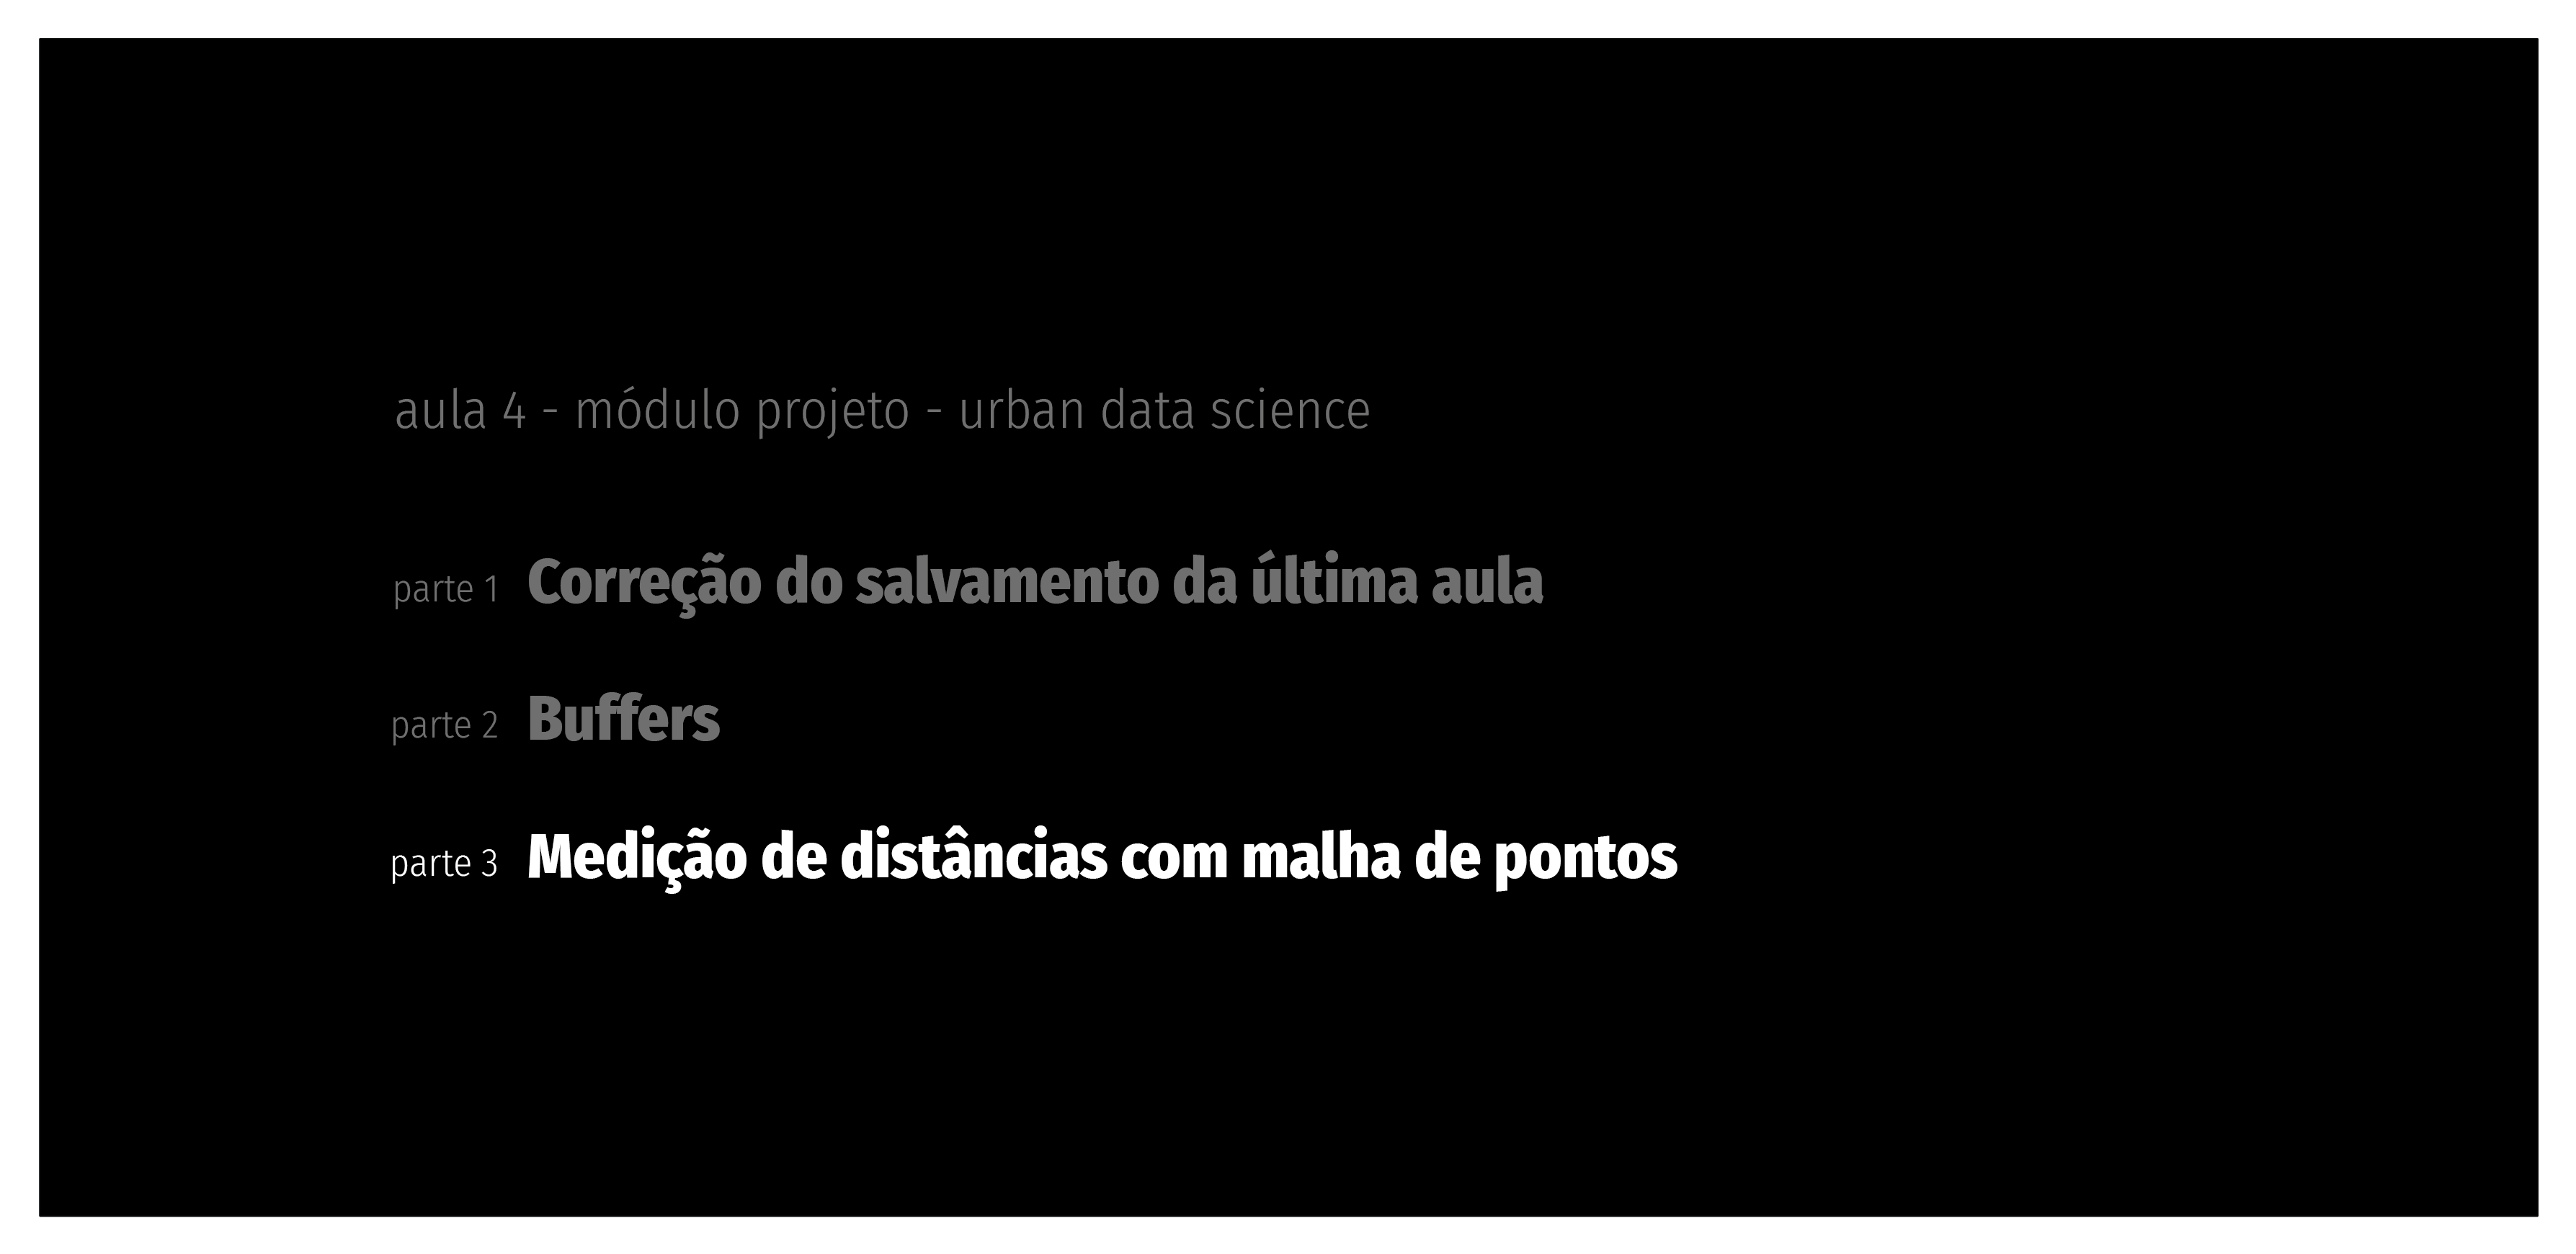

Nos exemplos dos buffers, criamos categorias para representar determinados intervalos de distâncias. Mas, o que fazer se desejássemos trabalhar com a distância absoluta de cada ponto da cidade?

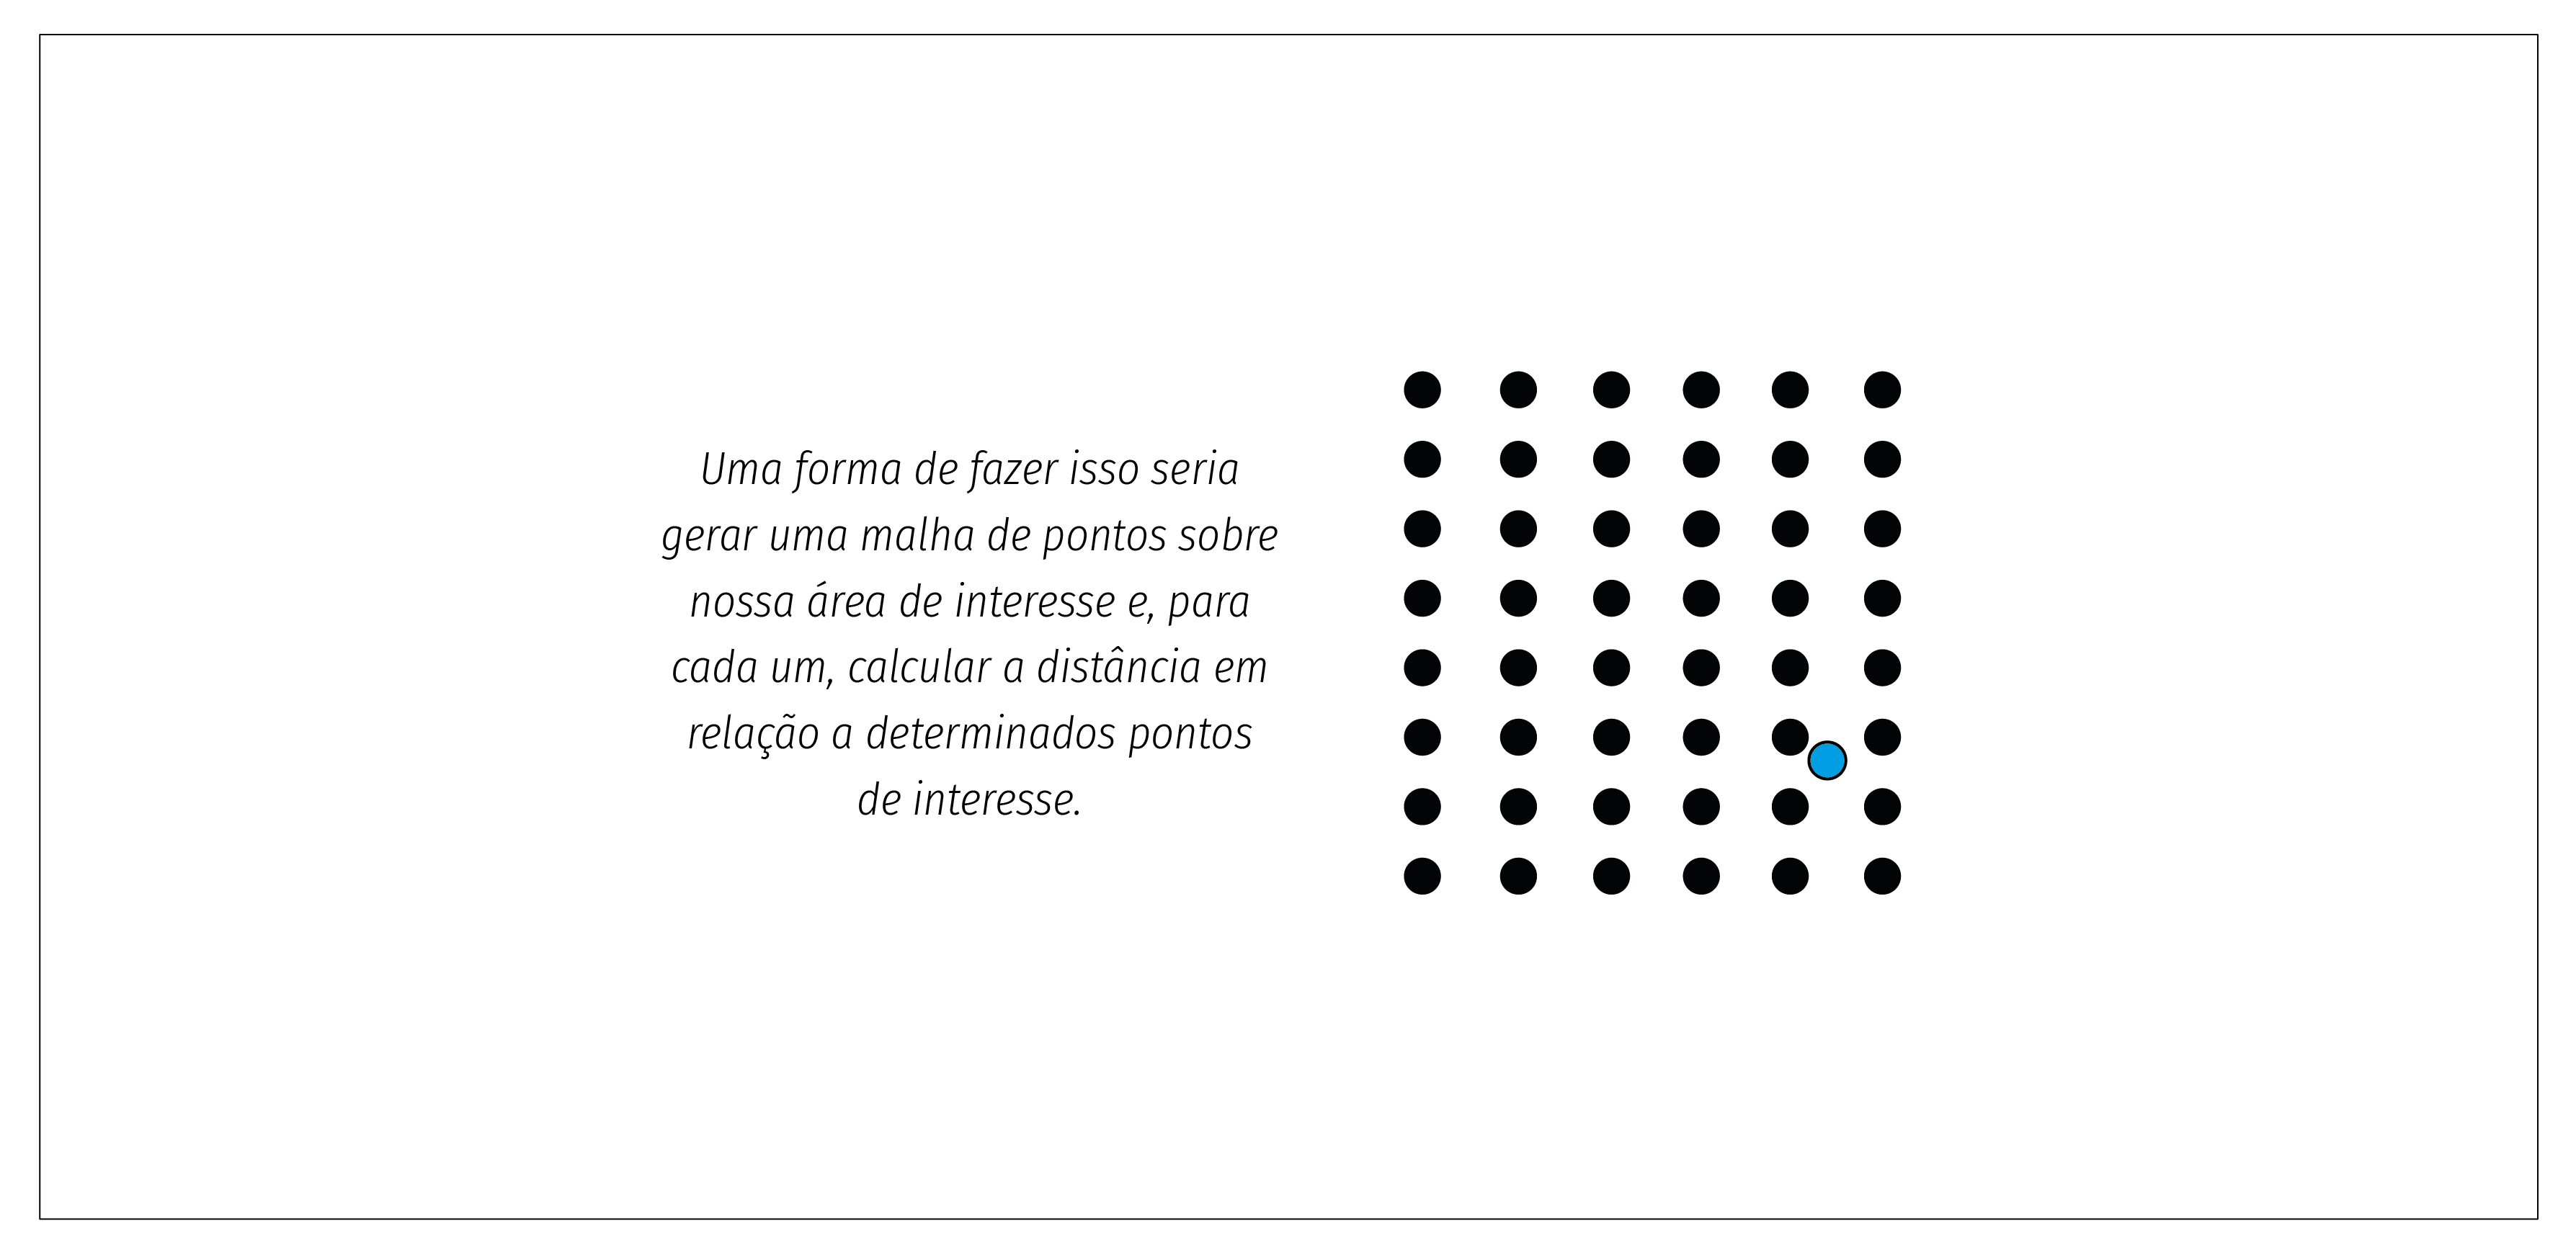

Neste exemplo, utilizamos os dados de parques importados do GeoSampa, cujos arquivos também estão na pasta do Google Drive:

In [ ]:
#indicação da pasta do google drive a ser utilizada
pasta_parques = '/content/drive/MyDrive/Arquivos_UDS_4/parques/'

for arquivo in os.listdir(pasta_parques):
  print(arquivo)

Como um dos arquivos é um Shapefile, enquanto os outros são GeoPackages, precisamos realizar uma leve modificação no nosso processo de importação para levar em conta essa diferença:

In [95]:
#criação de dicionário para armazenar variáveis geradas a partir dos arquivos
arquivos_parques = {}

#indicação da pasta do google drive a ser utilizada
pasta_parques = '/content/drive/MyDrive/Arquivos_UDS_4/parques/'


for arquivo in os.listdir(pasta_parques):
  #caso arquivo não seja shapefile, importamos ele normalmente
  if arquivo[7:10] != 'SHP':
    id_variavel = arquivo[12:-4]
    arquivos_parques[id_variavel] = gpd.read_file(pasta_parques + arquivo)
  #caso seja shapefile, realizamos o procedimento adicional que fizemos na primeira aula
  else:
    id_variavel = arquivo[11:-4]
    arquivos_parques[id_variavel] = gpd.read_file(pasta_parques + arquivo + '!' + arquivo[0:-4])

In [ ]:
#verificação do conteúdo do dicionário contendo os resultados
for item in arquivos_parques:
  print(item)

Em seguida, realizamos a concatenação das geometrias de todos os arquivos, para conter todos os tipos de parque em um único arquivo:

In [ ]:
#operação de concatenação da geometria de todos os GDFs
gdf_parques = pd.concat(arquivos_parques.values())

#apresentação do resultado
gdf_parques.plot()

E realizamos a operação de clip() para obter apenas aqueles situados na área de análise:

In [98]:
#delimitação da geometria para apenas a área de análise
gdf_parques_clip = gdf_parques.clip(gdf_polygon)

#apresentação do resultado
gdf_parques_clip.plot()

Como gerar a malha de pontos utilizada como referência para a medição das distâncias?

O método GeoDataFrame( ) da biblioteca GeoPandas permite a criação de um GDF de pontos a partir de listas contendo a latitude e a longitude de cada ponto:

In [ ]:
#criação de GDF a partir de listas contendo a latitude e a longitude
gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy([1,2,3],[4,5,6]))

#apresentação do GDF recém-criado
gdf.plot()

Para a criação automática dos conjuntos de coordenadas, podemos utilizar dois laços de repetição para combinar todas as latitudes e longitudes dentro de um intervalo:

In [ ]:
#laço de repetição para o intervalo que inicia em 100, termina em 9000 e cujo passo é 500
for lat in range(100, 9000, 500):
  print(lat)

In [ ]:
#laço de repetição para o intervalo que inicia em 100, termina em 9000 e cujo passo é 500
for lat in range(100, 9000, 500):
  #laço de repetição para o intervalo que inicia em 200, termina em 8000 e cujo passo é 400
  for lng in range(200, 8000, 400):
    print([lat, lng])

In [117]:
#lista de listas que utilizamos para gerar as coordenadas de nossa área de análise
vertices = [[325805, 7396276], [330219, 7396276], [330219,7402006], [325805,7402006]]

#listas que armazenarão os pontos do GDF a ser criado:
lat_list, lng_list = [], []

#laço de repetição que gera os pares de coordenadas e os salva em lista
for lat in range(325805 - 200, 330219 + 200, 200):
  for lng in range(7396276 - 200, 7402006 + 200, 200):
    lat_list.append(lat)
    lng_list.append(lng)

Utilizamos as listas recém criadas para gerar um novo GeoDataFrame:

<Axes: >

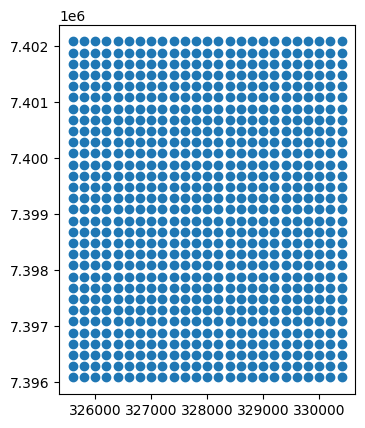

In [120]:
#novo GDF é criado a partir das listas recém geradas
gdf_pontos = gpd.GeoDataFrame(geometry=gpd.points_from_xy(lat_list, lng_list), crs="EPSG:31983")

#apresentação do resultado na tela
gdf_pontos.plot()

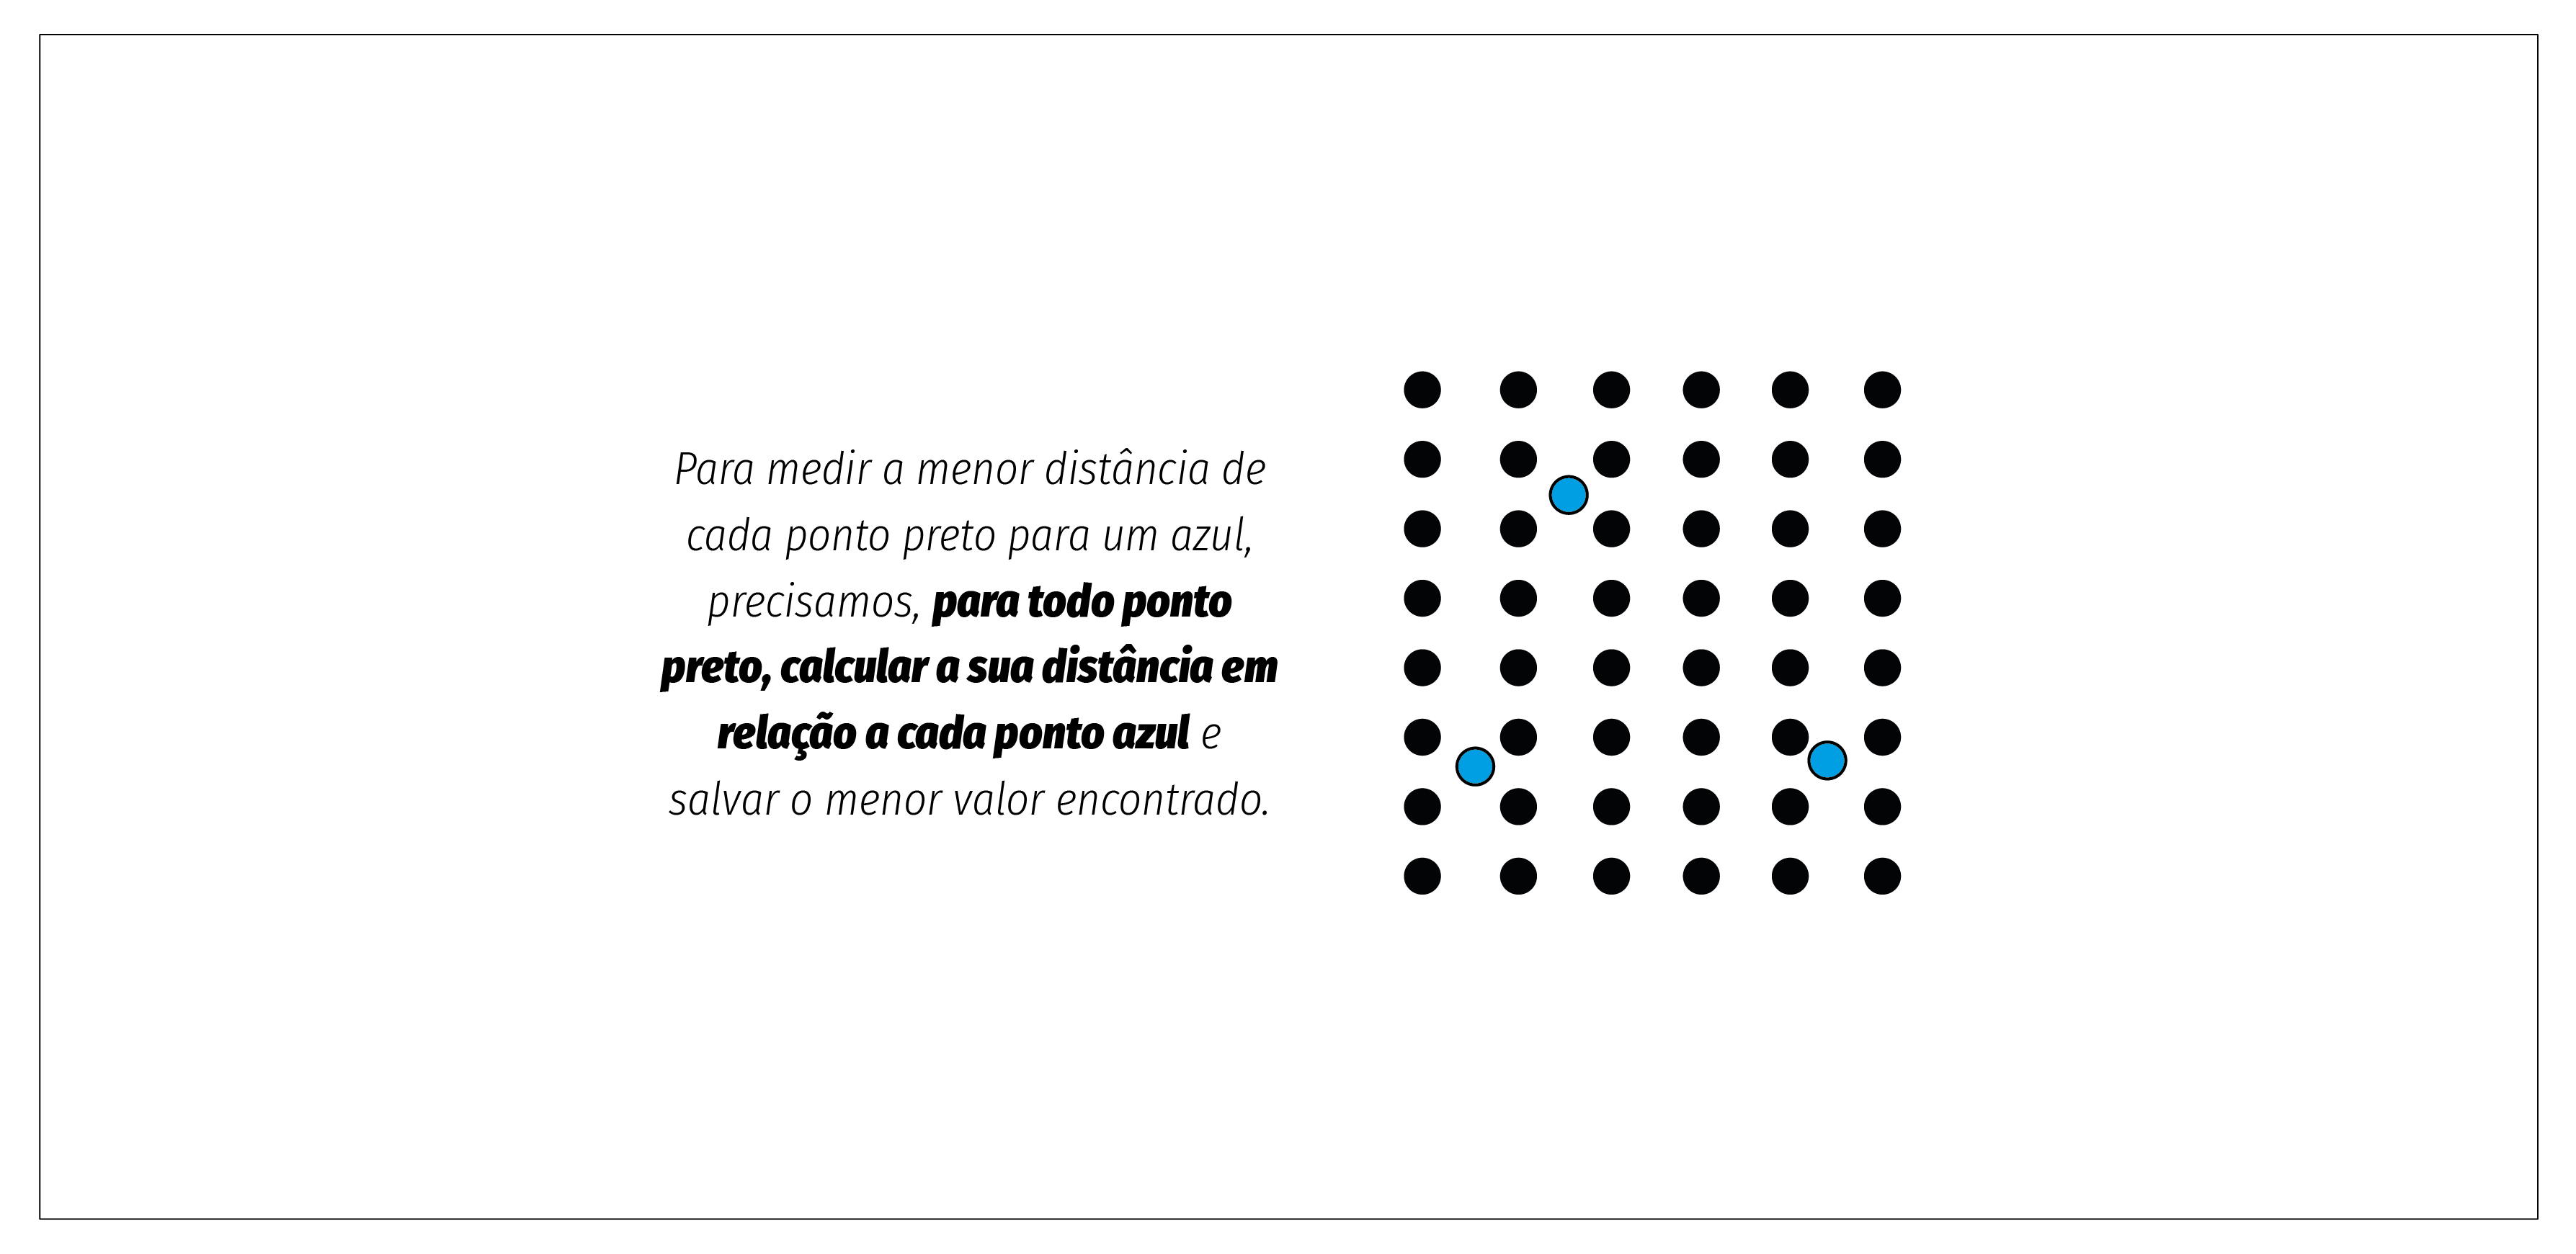

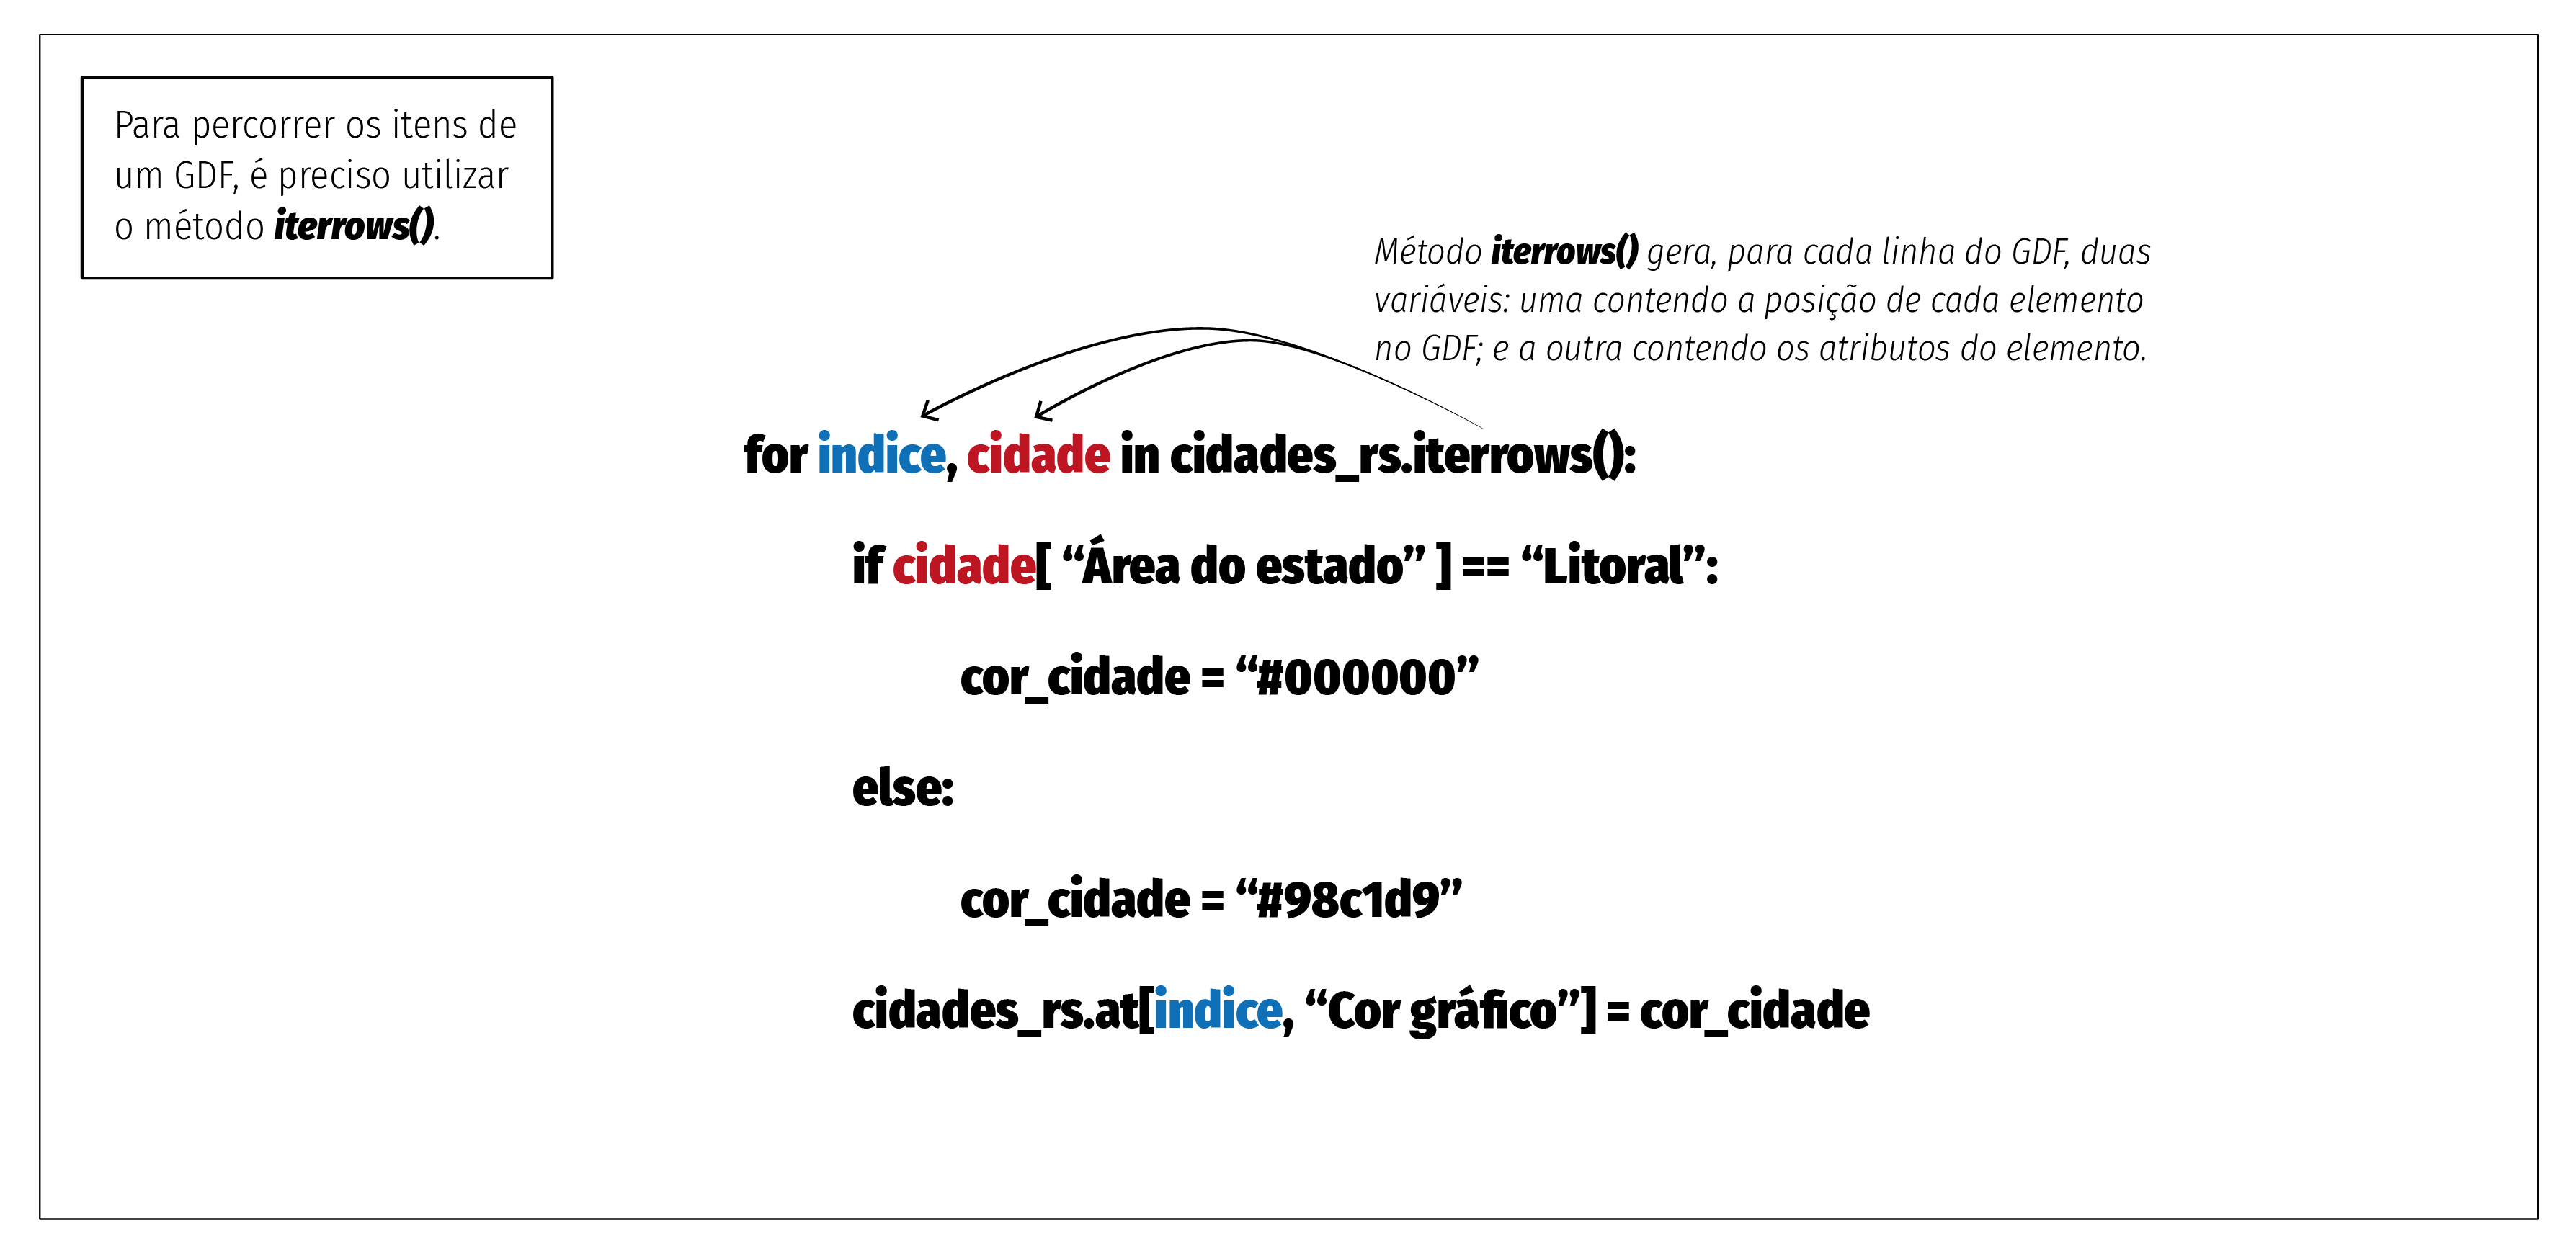

In [ ]:
#laço de repetição do "para todo ponto preto..."
for index, item in gdf_pontos.iterrows():
  #inicializamos a variavel min_value com valor alto para ela ser substituída na primeira comparação
  min_value = 999999

  #laço de repetição do "...calculamos a distância para cada ponto azul"
  for index_parque, item_parque in gdf_parques_clip.iterrows():
    #cálculo da distância entre dois pontos
    distancia = item['geometry'].distance(item_parque['geometry'])

    #verificação se a distância encontrada é menor que o mínimo registrado até o momento
    min_value = min([min_value, distancia])

  #salvamento do resultado na tabela do GDF
  gdf_pontos.at[index, 'distancia'] = min_value

#apresentação da tabela resultante
gdf_pontos

In [ ]:
#visualização da geometria resultante
gdf_pontos.plot(column = 'distancia', legend=True)

In [ ]:
#conversão do sistema de coordenadas
gdf_pontos_proj = gdf_pontos.to_crs('EPSG:4326')

#criação de colunas para os dados de latitude e longitude
gdf_pontos_proj['latitude'] = gdf_pontos_proj['geometry'].centroid.y
gdf_pontos_proj['longitude'] = gdf_pontos_proj['geometry'].centroid.x

#método da biblioteca plotly express que gera mapa de pontos
fig = px.scatter_mapbox(
    gdf_pontos_proj,
    lat="latitude",
    lon="longitude",
    color="distancia",
    size = "distancia",
    color_continuous_scale=px.colors.cyclical.IceFire,
    size_max=30,
    zoom=15,
    height=600,
    center={"lat": -23.5119, "lon": -46.6703}
)

#formatação do mapa e apresentação na tela
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

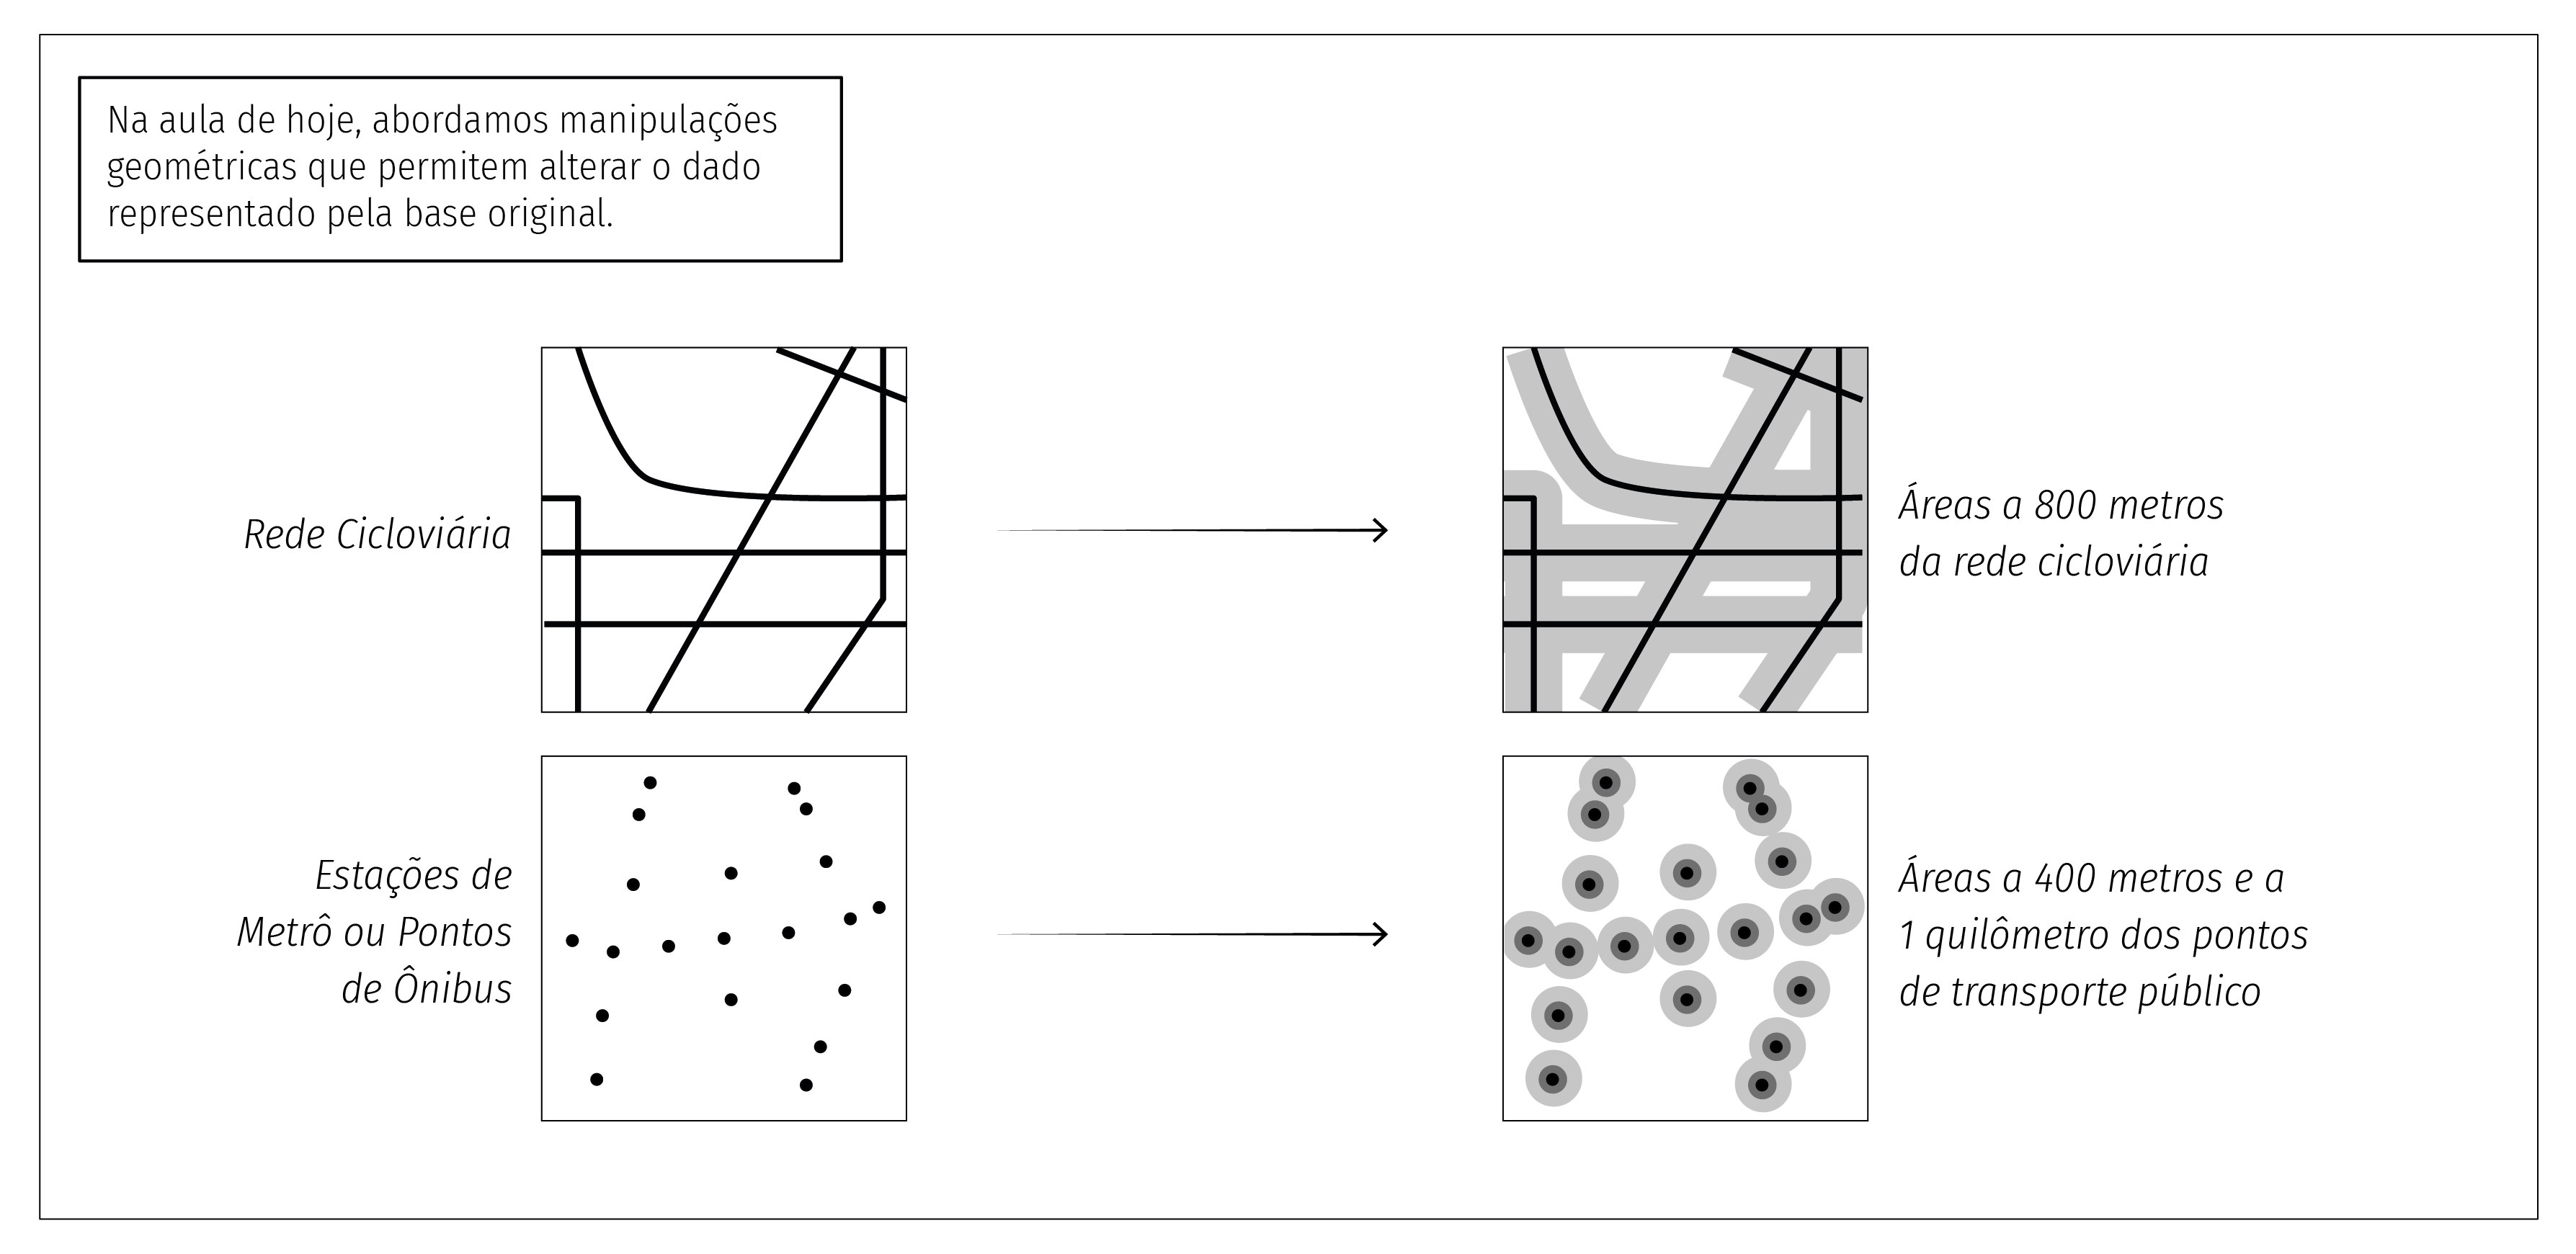

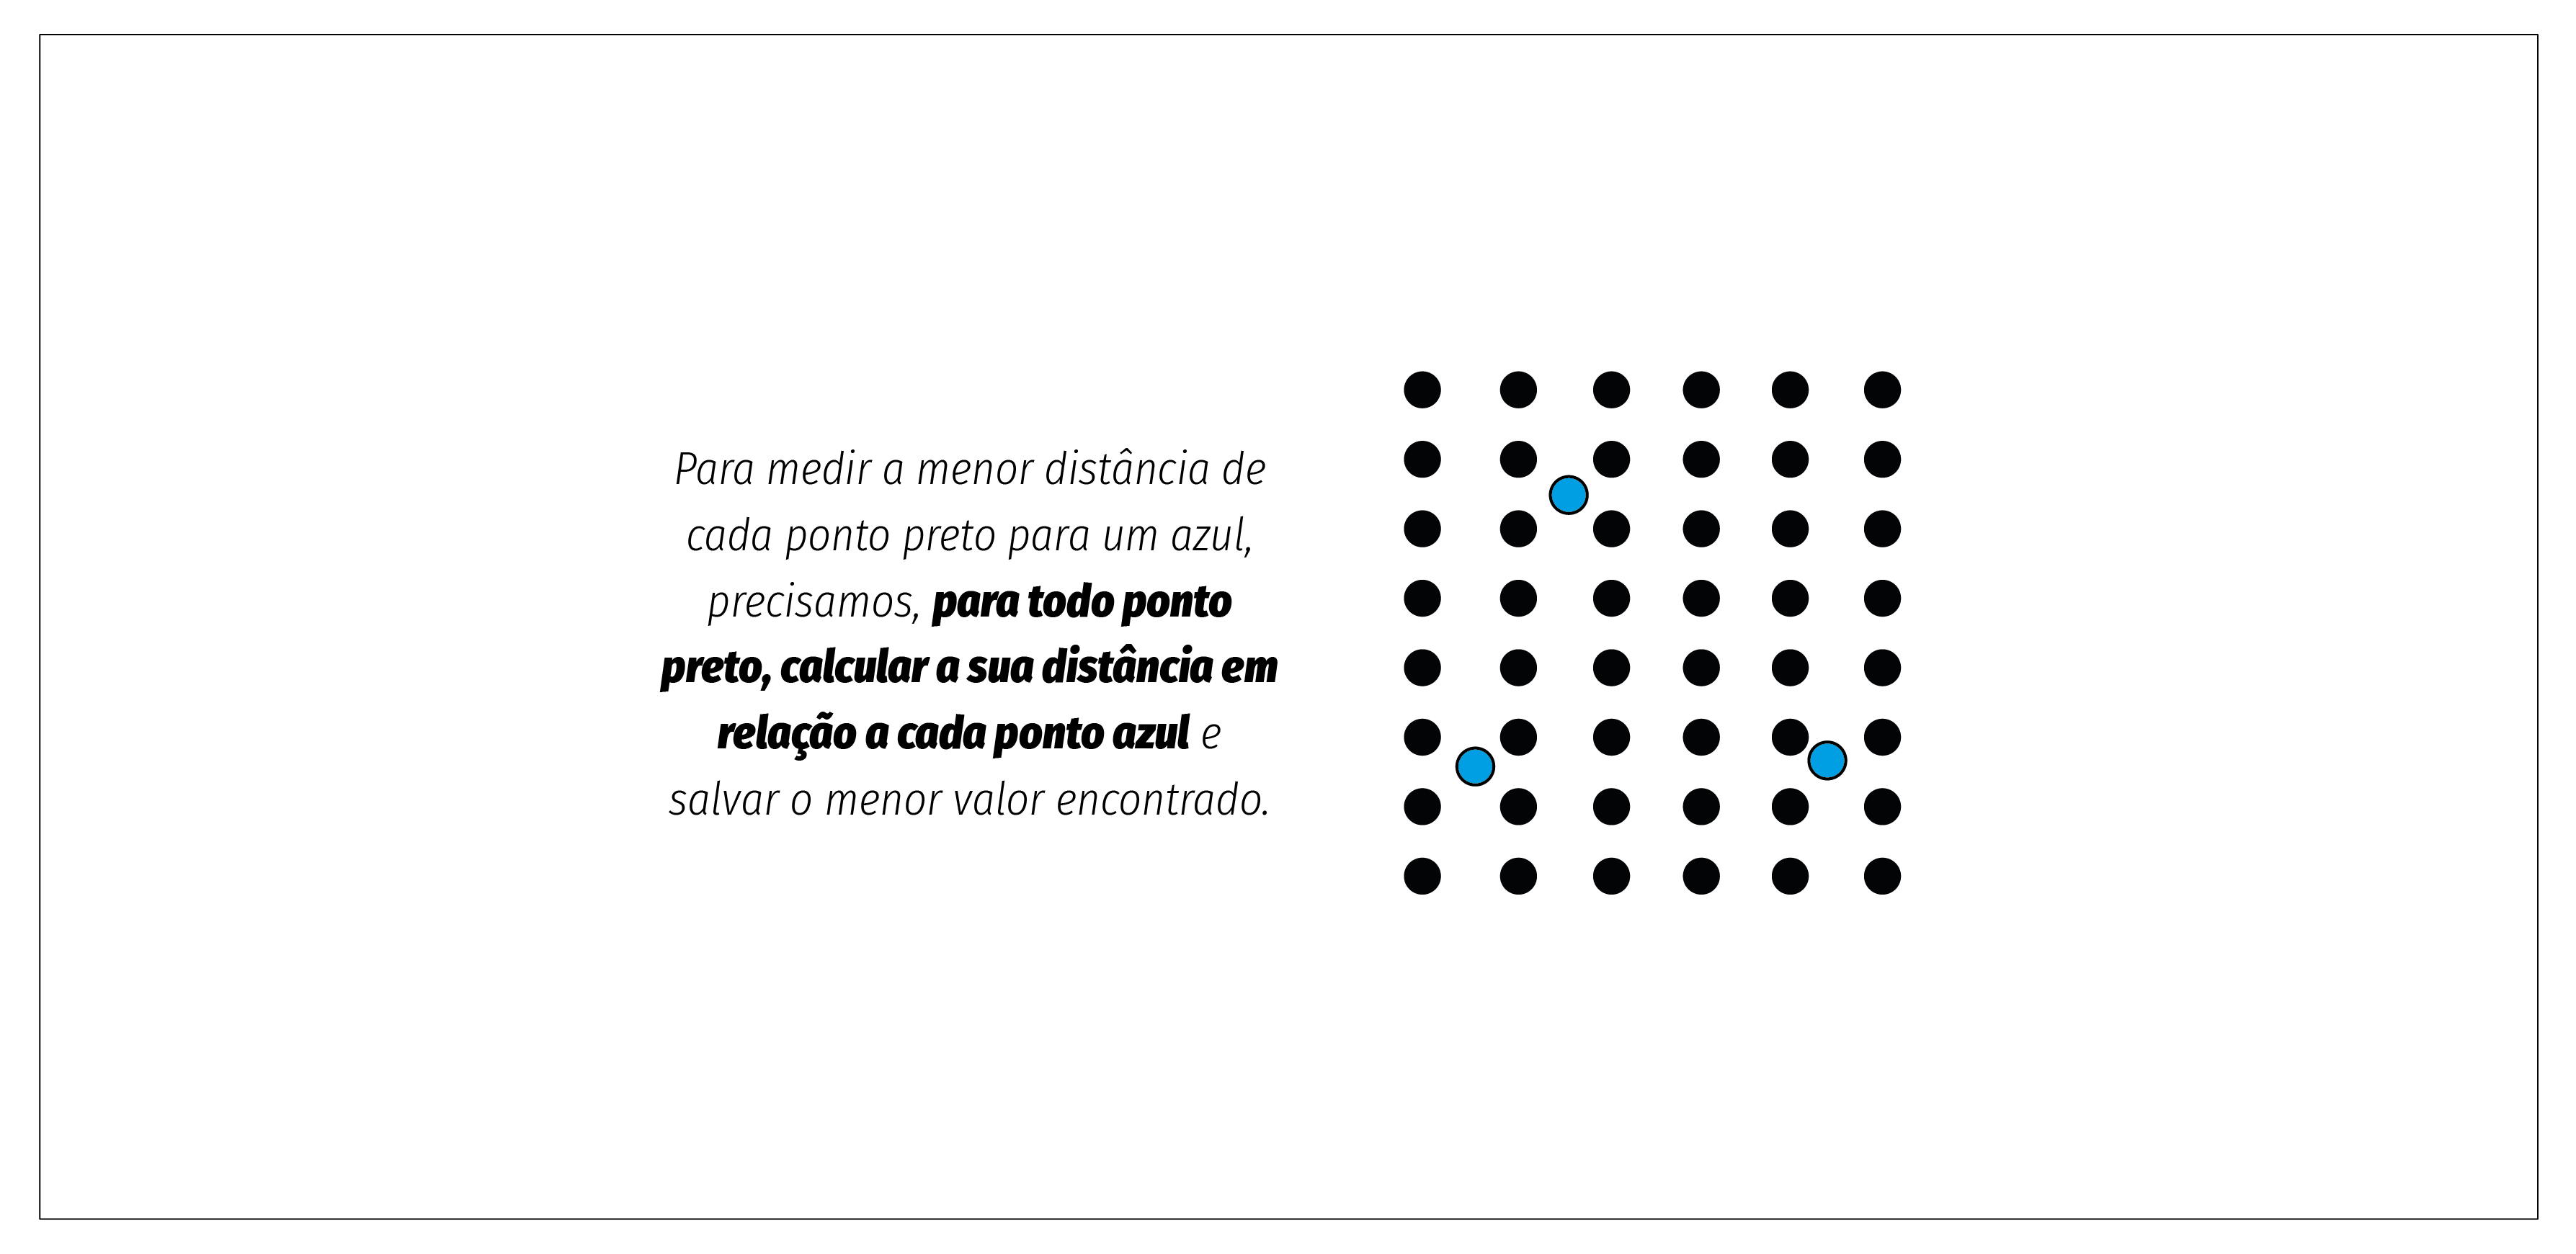

Um exercício para a aula de hoje seria, por exemplo, realizar o mesmo processo com os dados de pontos de ônibus, por exemplo.

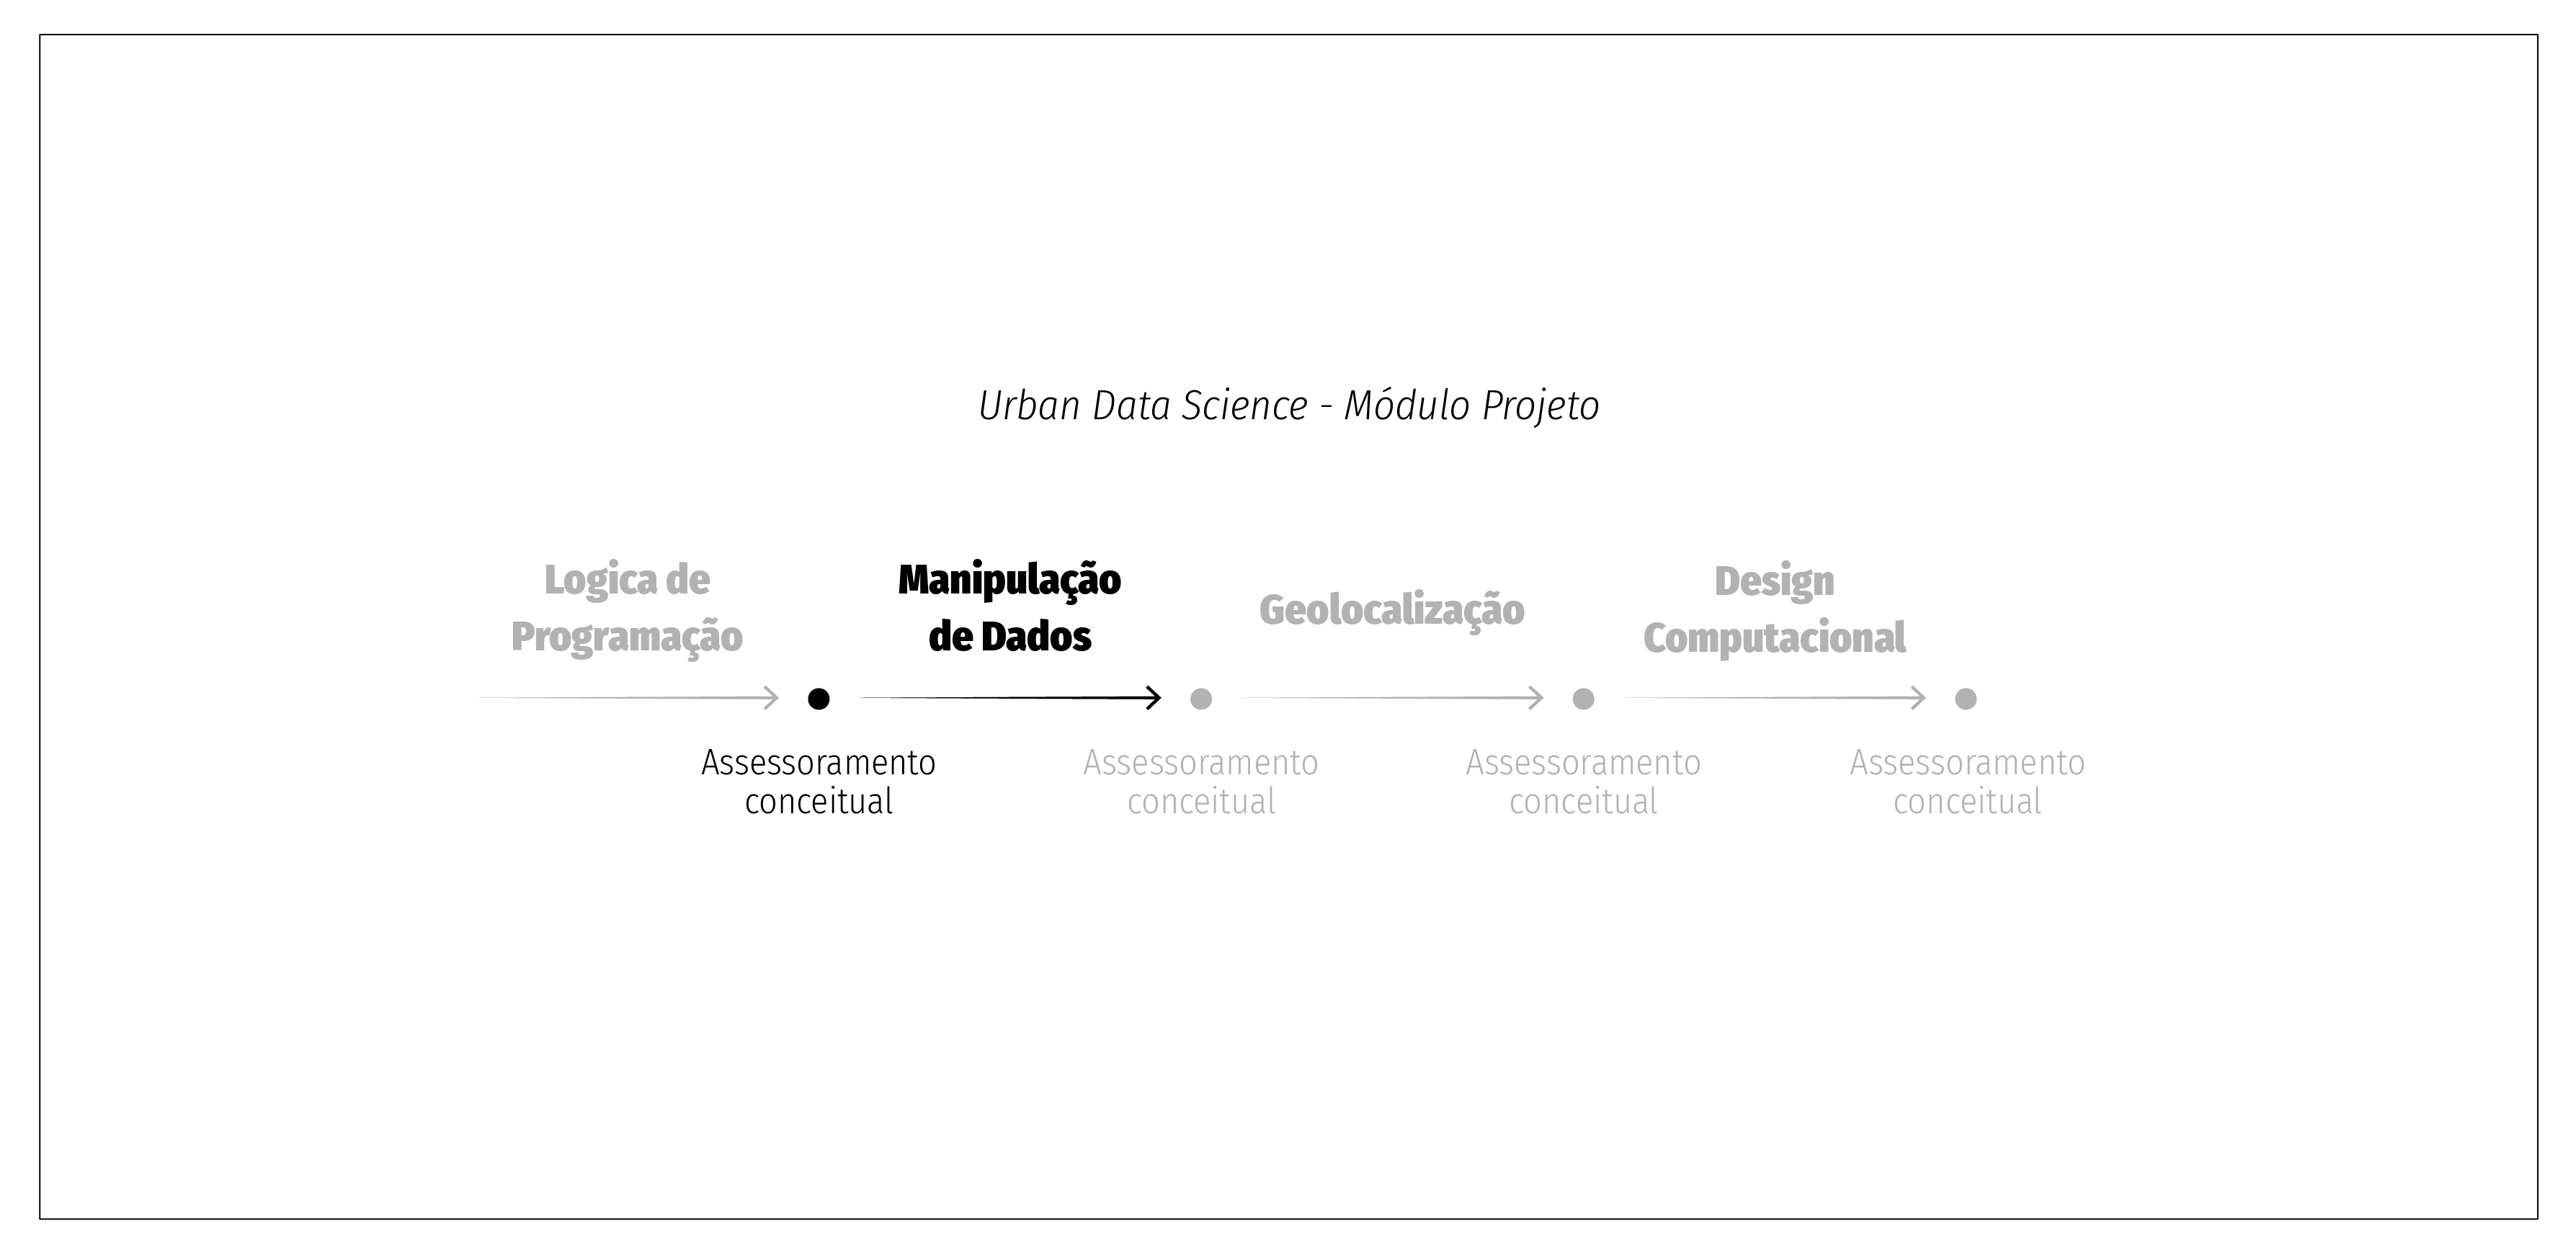

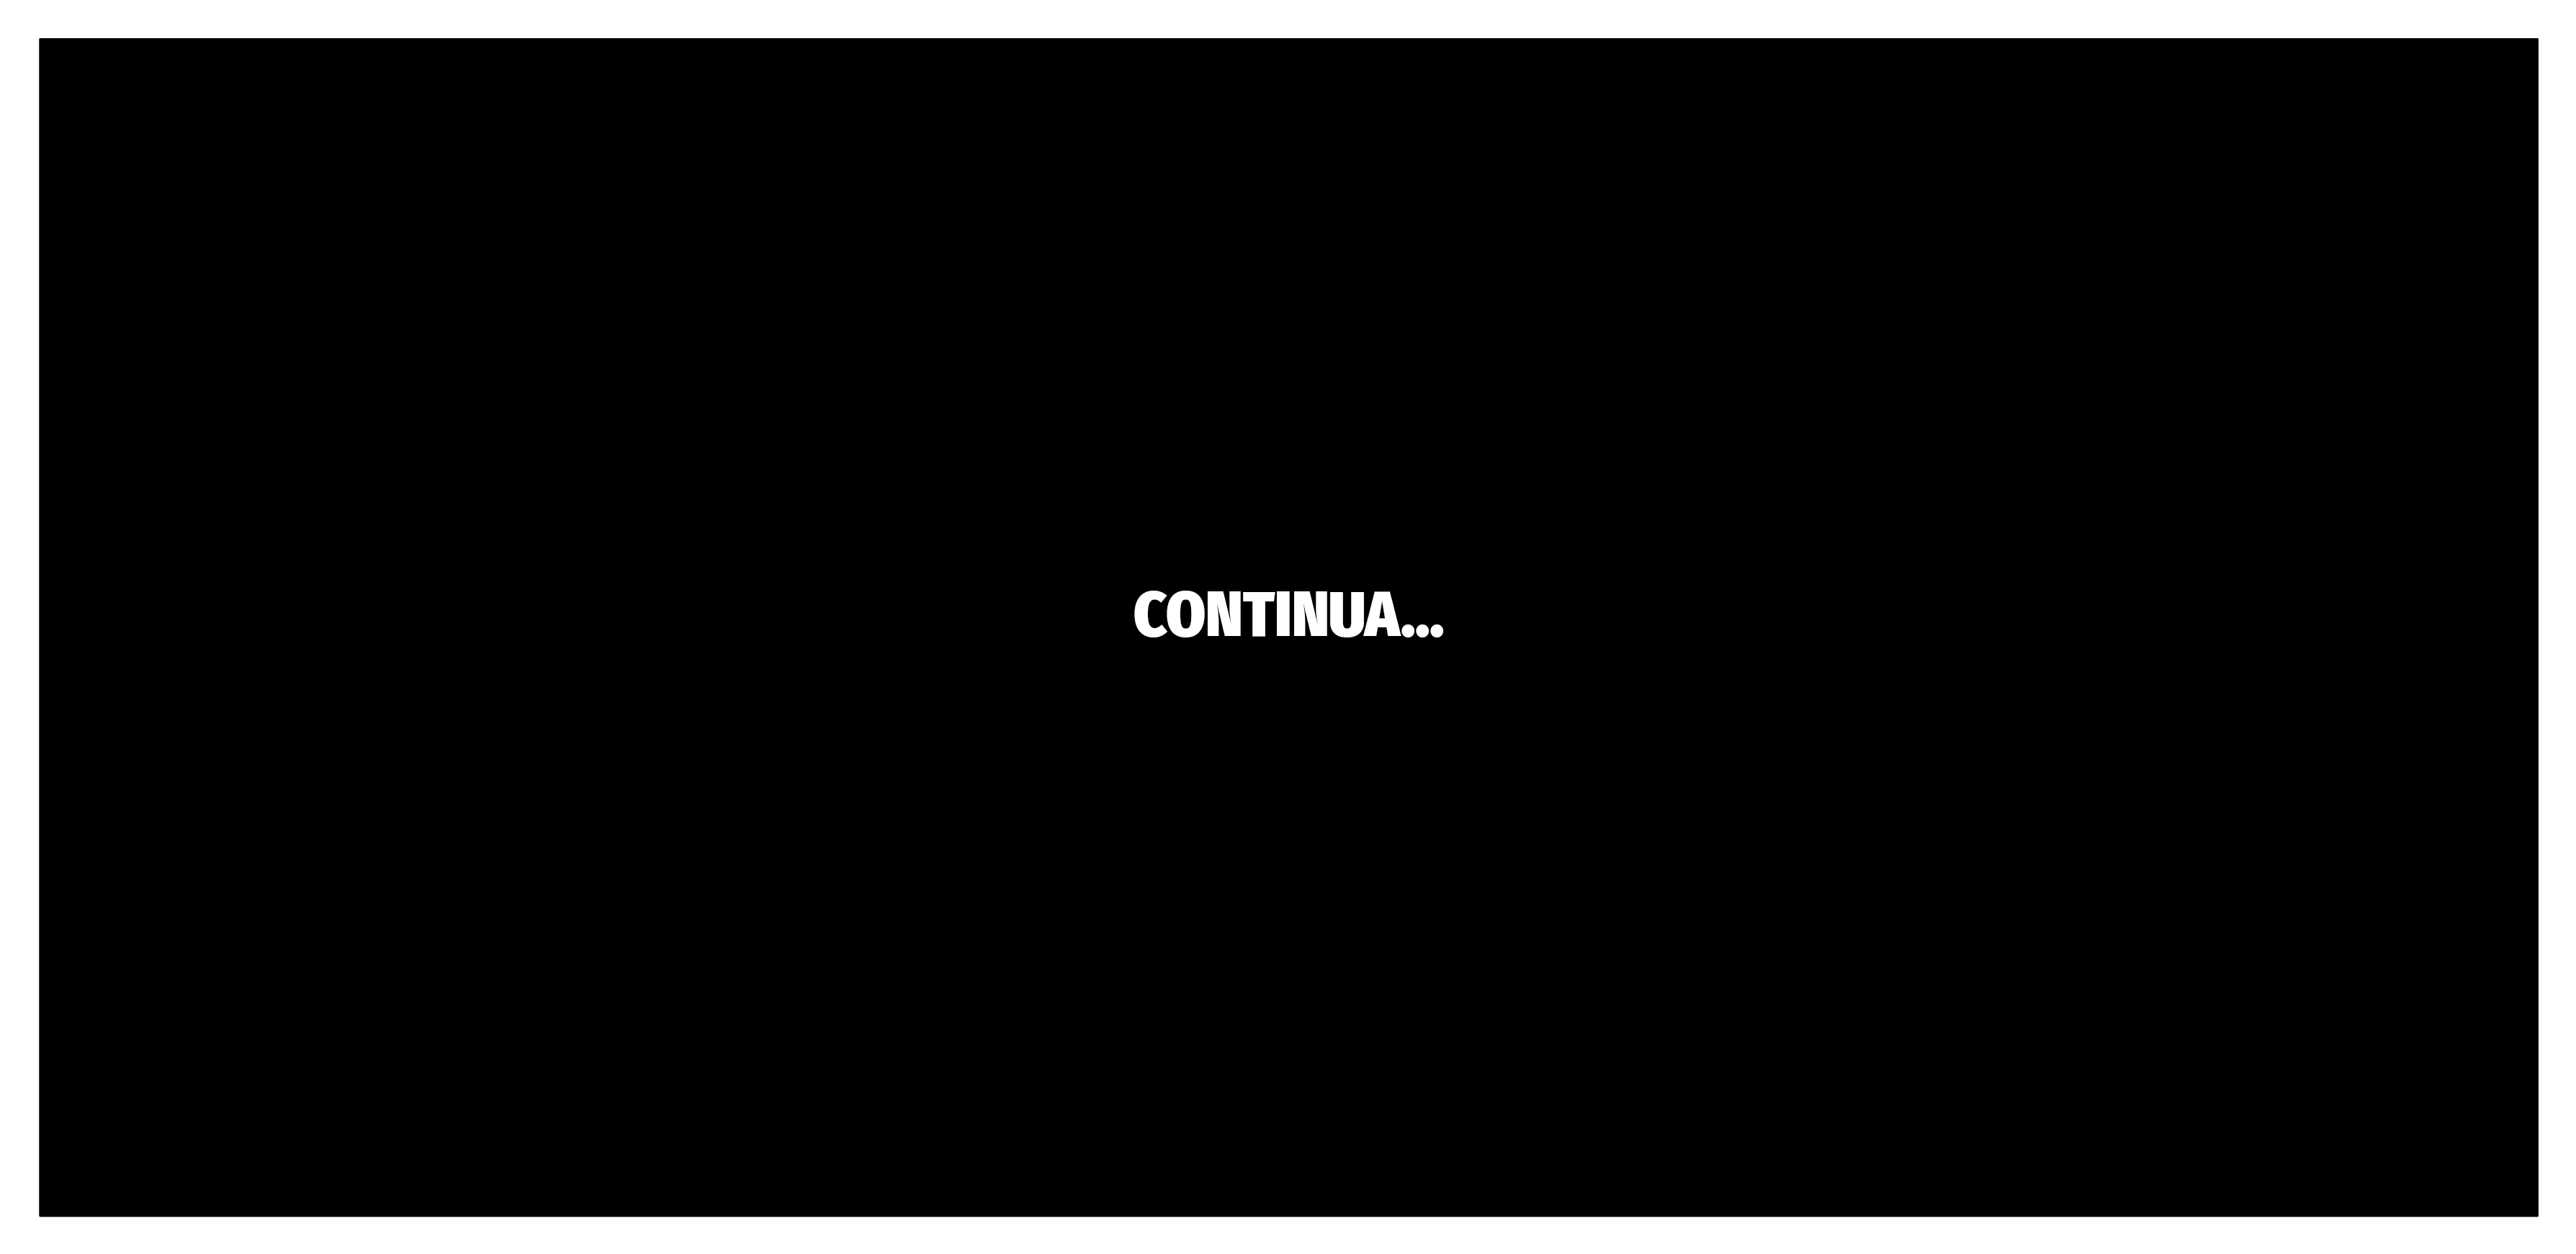

Qualquer coisa que precisar, podem me mandar email: guilherme.dalcin@ospa.com.br

Link para todos os Colabs: https://docs.google.com/document/d/1hQAvkAAZKG394cDBjpido4yhOlV0_8Xfyuseew0aaSo/edit?usp=sharing

REFERÊNCIA:

- Web Book ***PyGIS - Open Source Spatial Programming & Remote Sensing*** https://pygis.io/docs/a_intro.html

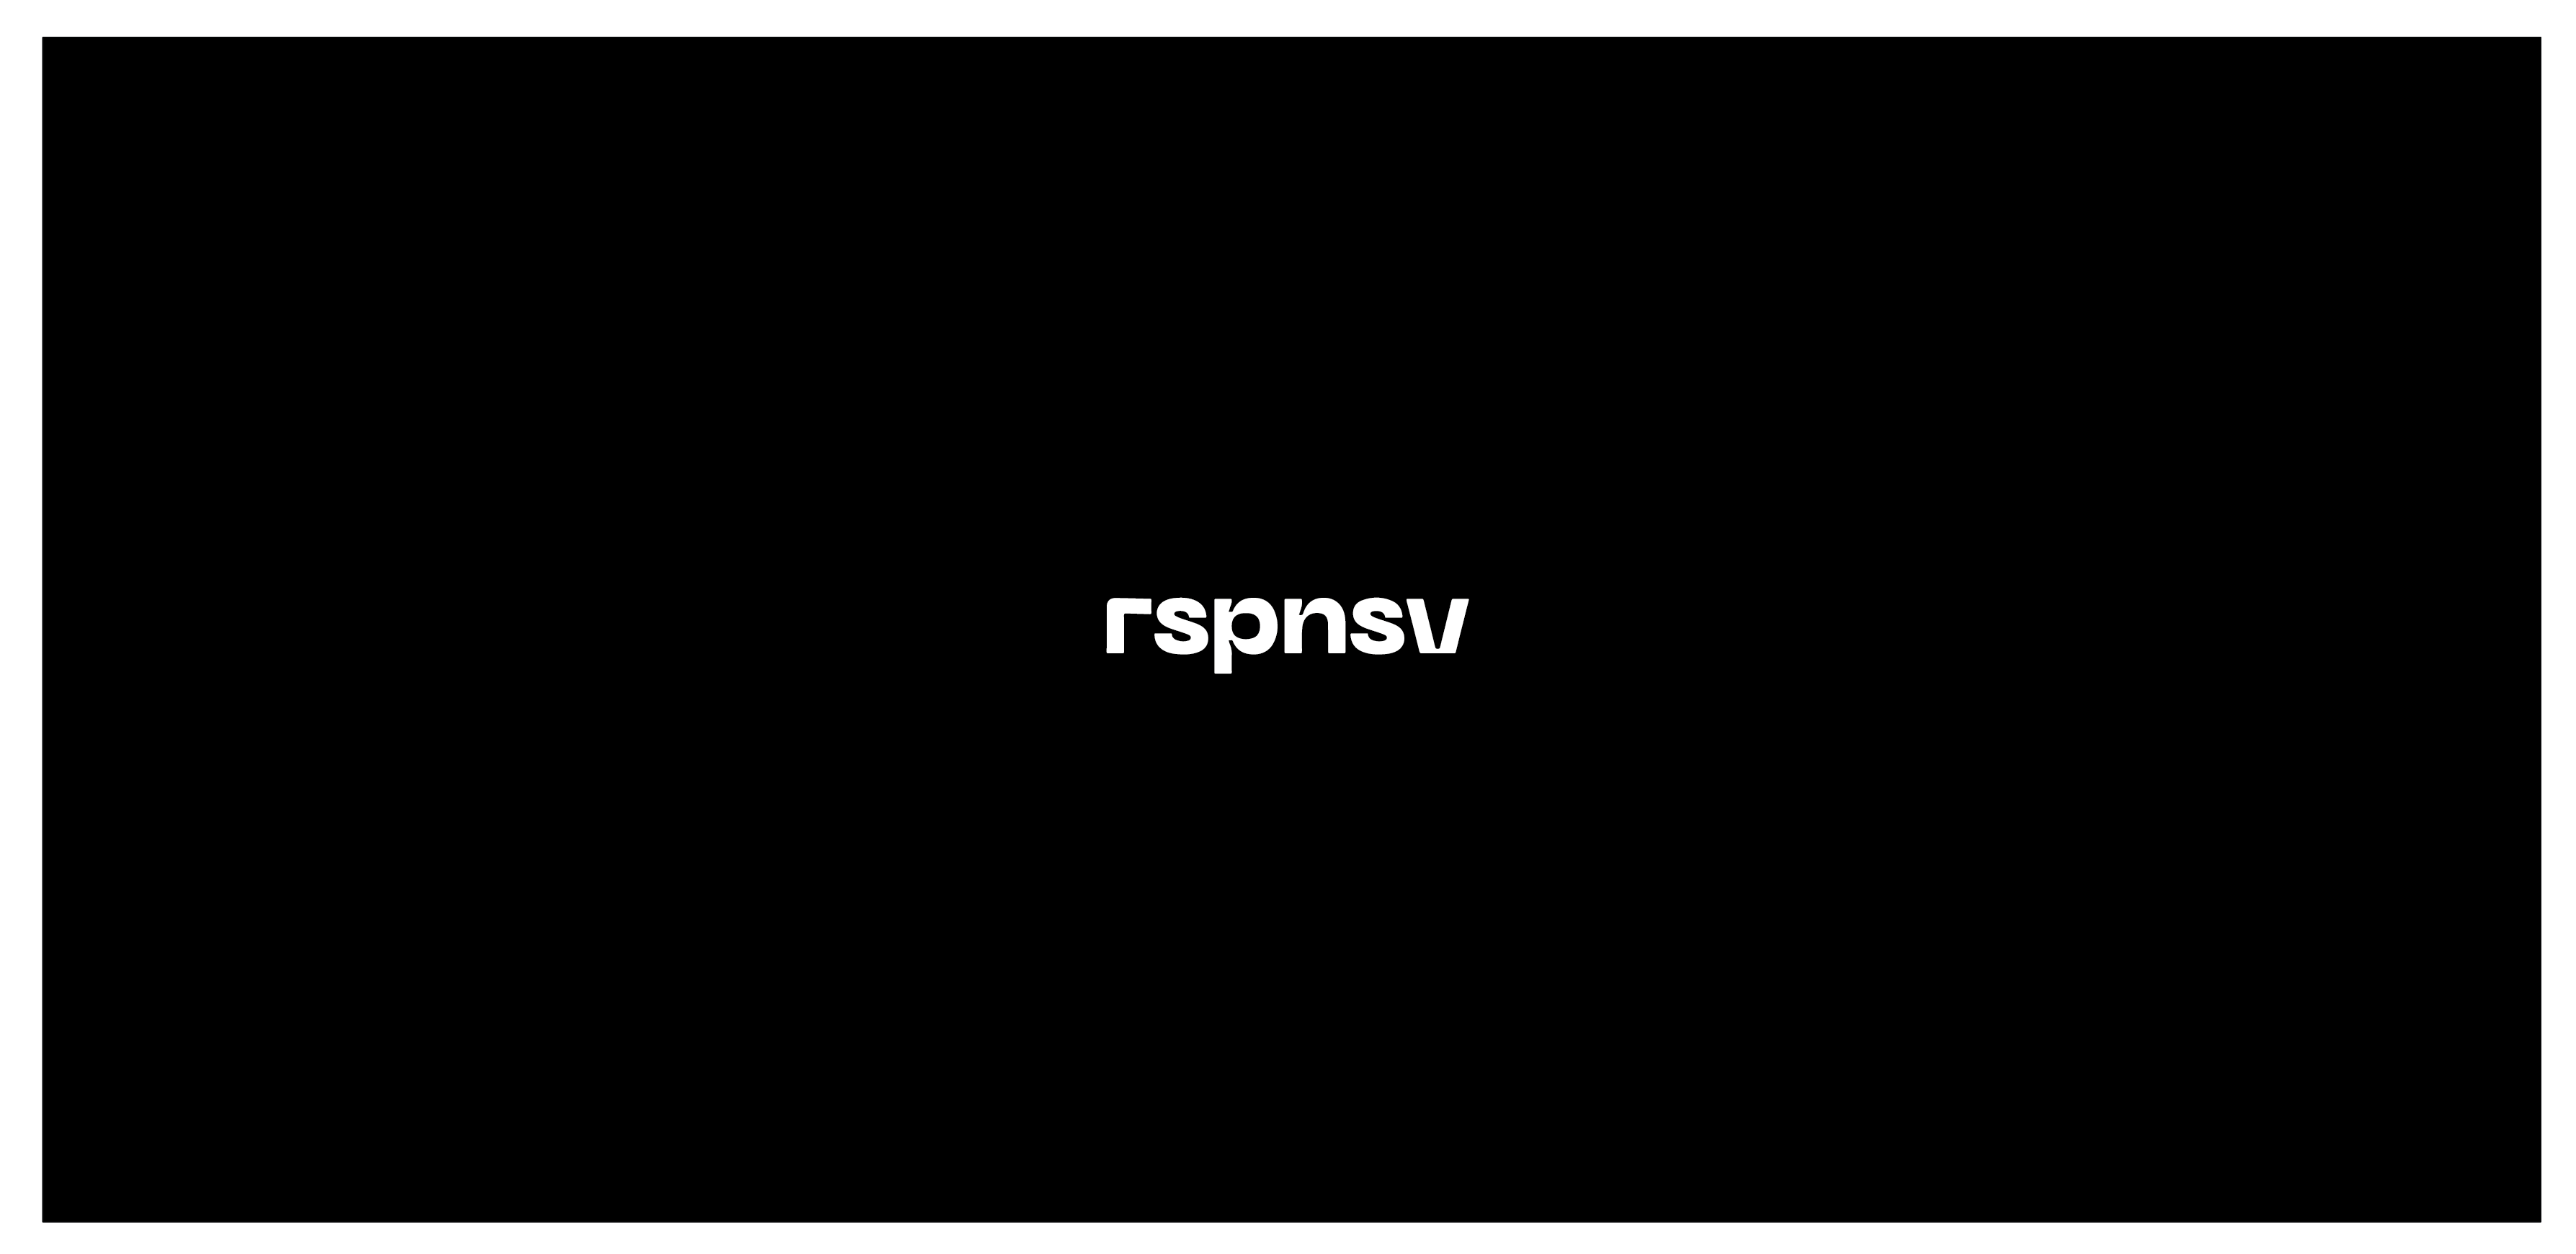